In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-7-Sample-382-_jpg.rf.5365c8009eb8b576c0f2f6a6b93f8a62.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-9-Sample-476-_jpg.rf.f1353463cc0100d644a7fe6fcd0a4267.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-8-Sample-409-_jpg.rf.c75bb8ab6b50cfe955ff6ac58b27e62c.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-6-Sample-335-_jpg.rf.27e9acc1828243a7c51a5e4edec5d3ad.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-1-Sample-76-_jpg.rf.9a3799ef770a5fa296cf167d6553209a.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-1-Sample-90-_jpg.rf.f86dea2c1f2dea6f16d16e283216e613.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-1-Sample-52-_jpg.rf.93747fc724a55de4f1f16ce17818064d.txt
/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels/Sign-5-Sam

In [2]:
!pip install -q ultralytics
!pip install matplotlib seaborn pyyaml numpy ultralytics
!apt-get install -y fonts-noto
!pip install opencv-python
!pip install matplotlib
!pip install tqdm
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00



The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra 

In [3]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from ultralytics import YOLO
import torch
import shutil
from sklearn.model_selection import train_test_split
import random
from IPython.display import display, Image

# Verify GPU availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA device count: {torch.cuda.device_count()}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA device: Tesla P100-PCIE-16GB
CUDA device count: 1


In [4]:
!ls -R /kaggle/input/numerical-one-hand-sign/

/kaggle/input/numerical-one-hand-sign/:
'Data Sign lanuage'

'/kaggle/input/numerical-one-hand-sign/Data Sign lanuage':
train  valid

'/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train':
images	labels

'/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/images':
'Sign 0 - Sample (100).jpg'  'Sign 5 - Sample (1001).jpg'
'Sign 0 - Sample (101).jpg'  'Sign 5 - Sample (1002).jpg'
'Sign 0 - Sample (102).jpg'  'Sign 5 - Sample (1003).jpg'
'Sign 0 - Sample (103).jpg'  'Sign 5 - Sample (1004).jpg'
'Sign 0 - Sample (104).jpg'  'Sign 5 - Sample (1005).jpg'
'Sign 0 - Sample (105).jpg'  'Sign 5 - Sample (1006).jpg'
'Sign 0 - Sample (106).jpg'  'Sign 5 - Sample (1007).jpg'
'Sign 0 - Sample (107).jpg'  'Sign 5 - Sample (1008).jpg'
'Sign 0 - Sample (108).jpg'  'Sign 5 - Sample (1009).jpg'
'Sign 0 - Sample (109).jpg'  'Sign 5 - Sample (1010).jpg'
'Sign 0 - Sample (10).jpg'   'Sign 5 - Sample (1011).jpg'
'Sign 0 - Sample (110).jpg'  'Sign 5 - Sample (1012).jpg'
'Sign 0 - Sample (

Train images: 1500 files
Validation images: 468 files
Train labels: 1501 files
Validation labels: 469 files
Sample label file (/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/labels/Sign 7 - Sample (1425).txt): 7 0.505469 0.425000 0.351562 0.737500
✅ dataset.yaml created and verified successfully!
Dataset YAML format verified!

Current directory: /kaggle/working
Files in /kaggle/working: ['runs', '__notebook__.ipynb', 'dataset.yaml']
Model file yolo11m.pt not found. Attempting to download...


100%|██████████| 38.8M/38.8M [00:00<00:00, 103MB/s] 


Model loaded successfully!
Using device: cuda
_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16269MB, multi_processor_count=56, uuid=1bdc126f-f6a6-db52-708a-4879d044fbf5, L2_cache_size=4MB)
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/dataset.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=[0], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0,

100%|██████████| 22.2M/22.2M [00:00<00:00, 254MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 162MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.4±3.9 MB/s, size: 28.4 KB)


train: Scanning /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:03<00:00, 406.60it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.3GB RAM): 100%|██████████| 1500/1500 [00:01<00:00, 778.36it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 7.1±1.8 MB/s, size: 22.8 KB)


val: Scanning /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels... 468 images, 0 backgrounds, 0 corrupt: 100%|██████████| 468/468 [00:01<00:00, 410.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.5GB RAM): 100%|██████████| 468/468 [00:00<00:00, 681.17it/s]


Plotting labels to /kaggle/working/runs/detect/bengali_digit_training/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Glyph 2534 (\N{BENGALI DIGIT ZERO}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:585: UserWarning: Glyph 2538 (\N{

optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/detect/bengali_digit_training
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.84G      2.145      4.994      2.851         18        640:   1%|          | 2/188 [00:01<02:06,  1.47it/s]

      1/100      3.84G      2.185      5.257      2.755         17        640:   2%|▏         | 4/188 [00:02<01:32,  2.00it/s]
100%|██████████| 755k/755k [00:00<00:00, 38.9MB/s]
      1/100      3.94G      1.428      2.335      1.762         10        640: 100%|██████████| 188/188 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.62it/s]

                   all        468        469      0.475      0.463      0.458      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.18G      1.275       1.62      1.534         17        640: 100%|██████████| 188/188 [01:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.10it/s]

                   all        468        469      0.617      0.849      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.24G      1.239      1.494      1.494         13        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.11it/s]

                   all        468        469      0.669      0.675      0.732      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.3G      1.202      1.363      1.457         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.11it/s]

                   all        468        469      0.538      0.718      0.674      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.38G       1.19      1.321      1.439         12        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.717      0.794      0.861       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.44G      1.163      1.319      1.422         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.11it/s]

                   all        468        469      0.783       0.84      0.901      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.51G      1.152      1.229      1.413          9        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469      0.655      0.782      0.838      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.57G      1.103      1.148       1.37         13        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469      0.866      0.793      0.916      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.64G      1.093      1.102       1.36          8        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469      0.796      0.826      0.892      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.71G       1.08      1.105       1.35         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.11it/s]

                   all        468        469      0.812      0.781      0.885      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.77G      1.084      1.071      1.355         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.844      0.862      0.919      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.84G      1.053      1.021      1.332         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.823      0.771      0.888      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.91G       1.04     0.9949      1.321         16        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469       0.77      0.745      0.871      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.97G      1.031     0.9724      1.312         15        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.877       0.87      0.922      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.04G      1.026     0.9504      1.311         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.847        0.9      0.932      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.1G      1.042     0.9452      1.315          9        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.899      0.862      0.906      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.17G     0.9945      0.916      1.285          8        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]

                   all        468        469      0.837      0.858      0.931      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.24G     0.9789     0.9027      1.269         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.794      0.852      0.875      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       6.3G     0.9886     0.8882       1.29          6        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.829      0.816      0.894      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.37G     0.9682     0.8619      1.263          8        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.837      0.774      0.901      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.44G     0.9452     0.8143      1.256         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.801      0.891      0.922      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       6.5G     0.9549     0.8134      1.257          9        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]

                   all        468        469      0.801      0.842      0.892      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.57G     0.9646     0.8497      1.266         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]

                   all        468        469      0.867      0.851      0.939       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.63G      0.947     0.8141       1.25         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.887      0.837      0.933      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.7G      0.928     0.7886      1.238         16        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]

                   all        468        469      0.893      0.897      0.931      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.77G     0.9176     0.7925      1.238         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.864      0.923      0.934      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.83G     0.9328     0.7758      1.244         17        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.876      0.855      0.918        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.94G     0.9111     0.7796      1.228         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.821      0.855      0.902      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.31G     0.9335     0.7647      1.242         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.859      0.837      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.38G     0.9133     0.7425      1.236         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469      0.841      0.797      0.897      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.44G     0.8959     0.7476      1.221         16        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.16it/s]

                   all        468        469       0.89      0.904      0.942      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.51G     0.8932     0.7105       1.22         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.11it/s]

                   all        468        469       0.88      0.889      0.932      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.58G     0.8963     0.7326      1.217         16        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.856      0.766      0.868      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.64G     0.8934     0.7123      1.215          8        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]

                   all        468        469       0.79      0.887      0.911      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.72G     0.8715     0.6903        1.2          6        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469       0.81      0.878      0.915      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.84G     0.8657     0.6963        1.2         12        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.818      0.858      0.893      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.96G      0.881     0.6975      1.205         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.789      0.821      0.887      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.72G     0.8852      0.689      1.213         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.769      0.837      0.883       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.93G     0.8783     0.6793      1.201         11        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.849      0.915       0.92      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.93G     0.8494     0.6674      1.191         12        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]

                   all        468        469      0.881      0.895      0.936      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.93G     0.8423     0.6671      1.183         12        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

                   all        468        469      0.845      0.842      0.887      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.93G     0.8436      0.648      1.187          9        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.813      0.831      0.886      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.93G     0.8392     0.6442      1.175         12        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.829      0.871      0.889      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.93G      0.835     0.6284      1.185         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.17it/s]

                   all        468        469      0.865      0.842       0.92      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.15G      0.836     0.6229      1.175          8        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]

                   all        468        469      0.874      0.761      0.897      0.567
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



45 epochs completed in 0.993 hours.
Optimizer stripped from /kaggle/working/runs/detect/bengali_digit_training/weights/last.pt, 40.5MB
Optimizer stripped from /kaggle/working/runs/detect/bengali_digit_training/weights/best.pt, 40.5MB

Validating /kaggle/working/runs/detect/bengali_digit_training/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.94it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2534 (\N{BENGALI DIGIT ZERO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from cu

                   all        468        469      0.847        0.9      0.933      0.656
                     ০         50         50          1      0.924      0.995      0.717
                     ১         50         50      0.861          1      0.994      0.653
                     ২         50         50      0.688          1      0.995      0.676
                     ৩         43         43          1      0.966      0.976      0.698
                     ৪         37         37       0.95      0.919      0.972      0.664
                     ৫         50         50      0.558       0.88      0.798      0.479
                     ৬         40         41      0.533      0.445      0.693      0.396
                     ৭         49         49          1      0.966      0.984      0.793
                     ৮         49         49      0.981          1      0.995      0.826
                     ৯         50         50      0.903        0.9      0.932      0.656


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2534 (\N{BENGALI DIGIT ZERO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarni

Speed: 0.2ms preprocess, 12.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/detect/bengali_digit_training
Best model loaded successfully!
Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 1.3±0.5 ms, read: 69.4±19.2 MB/s, size: 27.5 KB)


val: Scanning /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels... 468 images, 0 backgrounds, 0 corrupt: 100%|██████████| 468/468 [00:00<00:00, 791.93it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2534 (\N{BENGALI DIGIT ZERO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:500: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from c

                   all        468        469      0.862       0.88      0.905       0.67
                     ০         50         50          1       0.88       0.94      0.702
                     ১         50         50      0.943          1      0.994      0.681
                     ২         50         50      0.725          1      0.995      0.701
                     ৩         43         43          1      0.953      0.977      0.724
                     ৪         37         37      0.971      0.919      0.948      0.685
                     ৫         50         50      0.575       0.92      0.834      0.539
                     ৬         40         41        0.5       0.39      0.538      0.363
                     ৭         49         49          1      0.959       0.98       0.81
                     ৮         49         49          1          1      0.995      0.846
                     ৯         50         50      0.907       0.78      0.848      0.644


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2534 (\N{BENGALI DIGIT ZERO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarni

Speed: 0.8ms preprocess, 13.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4da06f4650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036, 

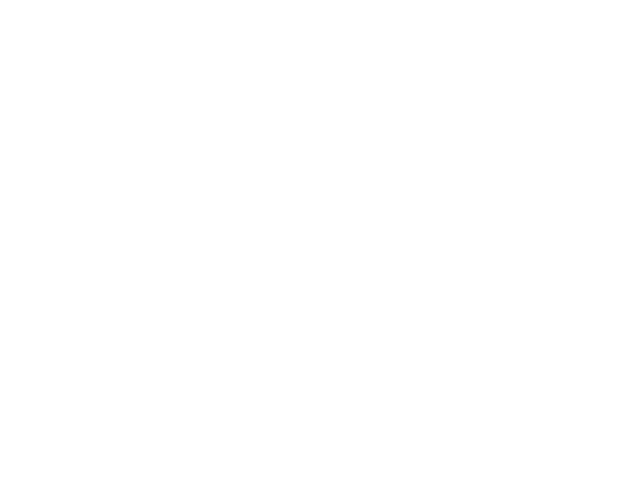

Training results plotted and saved as /kaggle/working/training_results.png


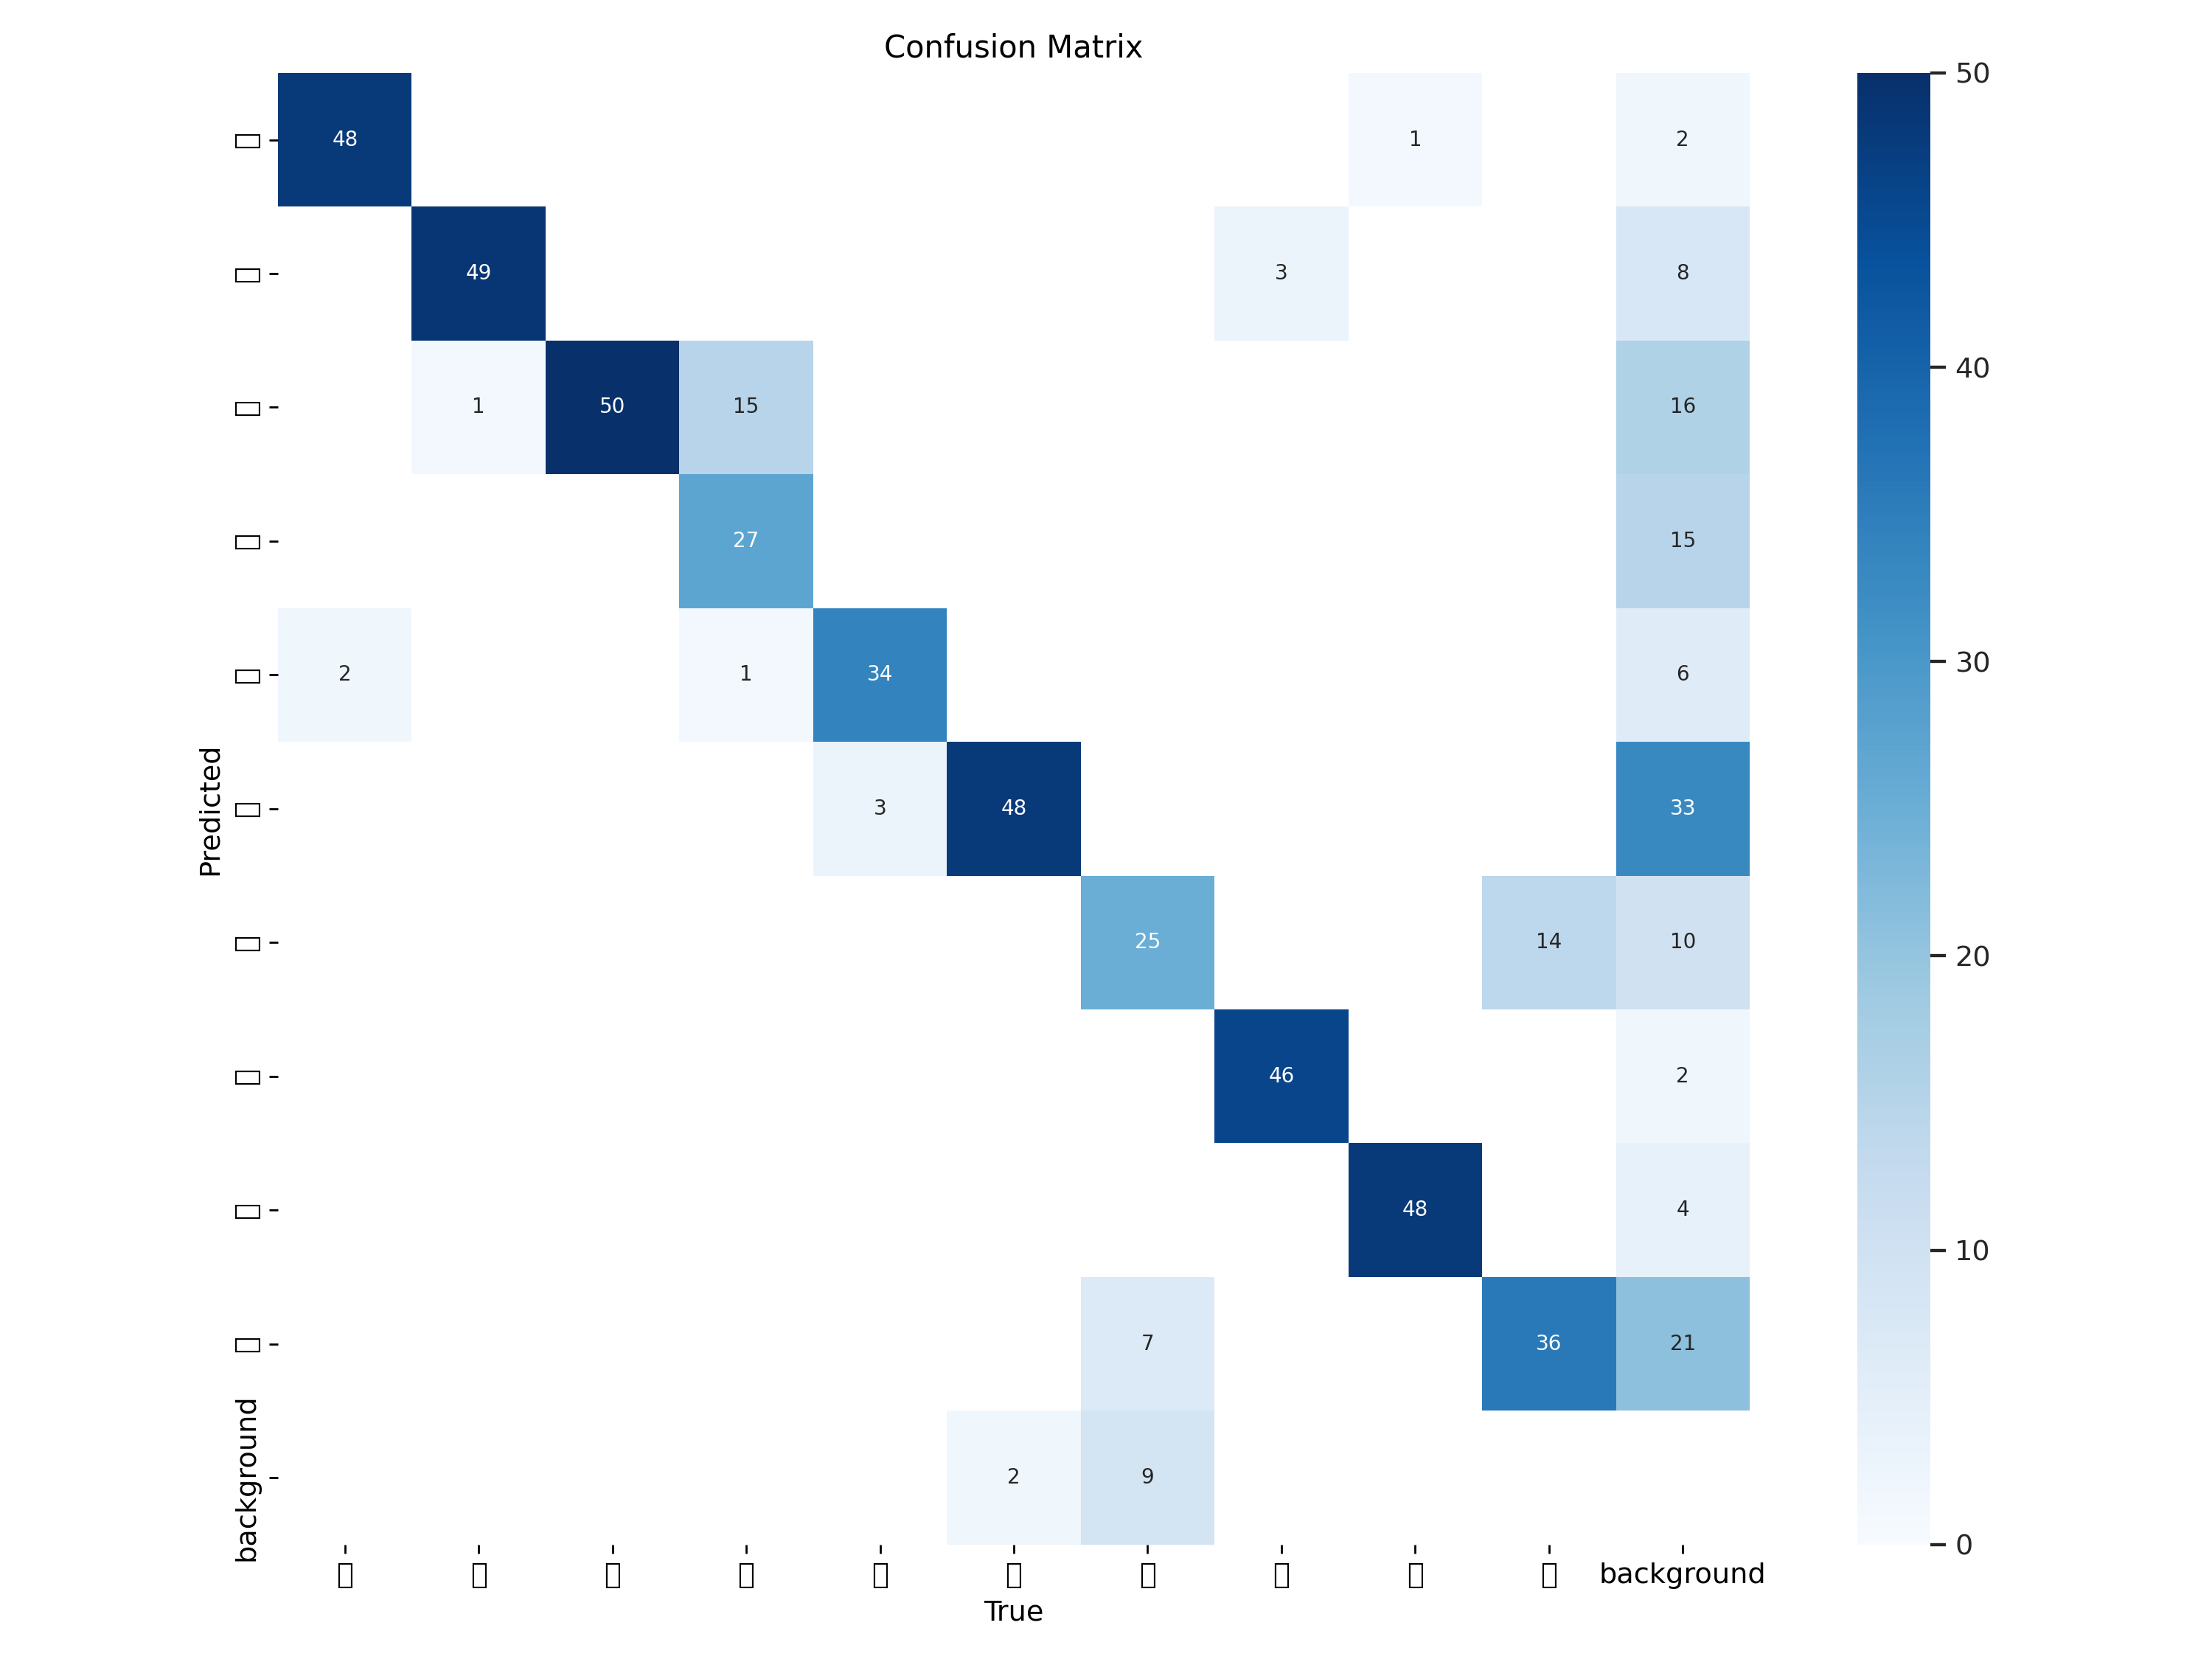

Confusion matrix saved as /kaggle/working/runs/detect/bengali_digit_training/confusion_matrix.png

Model Summary:
YOLO11m summary (fused): 125 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs
(125, 20037742, 0, 67.688704)
Training completed! Download /kaggle/working/runs/detect/bengali_digit_training/ for models and logs.


In [5]:
# Import required libraries
from ultralytics import YOLO
import torch
import os
import shutil
import yaml
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display
from ultralytics.utils.plotting import plot_results

# ============================
# 1. Dataset Configuration
# ============================
# Define dataset.yaml for Bengali digit sign language dataset
dataset_yaml = {
    "train": "/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/images",  # Corrected path with space and typo
    "val": "/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/images",    # Corrected path
    "nc": 10,  # Number of classes (Bengali digits 0-9)
    "names": ["০", "১", "২", "৩", "৪", "৫", "৬", "৭", "৮", "৯"]  # List of class names
}

# Save dataset.yaml with UTF-8 encoding
os.makedirs('/kaggle/working/', exist_ok=True)
with open('/kaggle/working/dataset.yaml', 'w', encoding='utf-8') as file:
    yaml.dump(dataset_yaml, file, allow_unicode=True)

# Verify dataset paths and count images/labels
def count_images(directory):
    """Count files with image extensions in a directory."""
    image_extensions = ('.jpg', '.jpeg', '.png')
    return len([f for f in os.listdir(directory) if f.lower().endswith(image_extensions)])

train_dir = dataset_yaml["train"]
val_dir = dataset_yaml["val"]
train_labels_dir = train_dir.replace("images", "labels")
val_labels_dir = val_dir.replace("images", "labels")

# Check if paths exist and count files
for path, name in [(train_dir, "Train images"), (val_dir, "Validation images"),
                   (train_labels_dir, "Train labels"), (val_labels_dir, "Validation labels")]:
    if not os.path.exists(path):
        print(f"Error: {name} directory not found at {path}")
        print("Please verify the dataset structure using: !ls -R /kaggle/input/numerical-one-hand-sign/")
        raise FileNotFoundError(f"{name} directory not found at {path}")
    count = count_images(path) if "images" in path else len(os.listdir(path))
    print(f"{name}: {count} files")

# Verify label files match images
train_images = set(f for f in os.listdir(train_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png')))
train_labels = set(f.replace('.txt', '') for f in os.listdir(train_labels_dir) if f.endswith('.txt'))
if not train_images.issubset(train_labels):
    missing = train_images - train_labels
    print(f"Warning: {len(missing)} images missing labels: {list(missing)[:5]}")

# Print a sample label file
sample_label = os.path.join(train_labels_dir, os.listdir(train_labels_dir)[0])
with open(sample_label, 'r') as f:
    print(f"Sample label file ({sample_label}): {f.read().strip()}")

print("✅ dataset.yaml created and verified successfully!")

# Verify dataset.yaml with Ultralytics
from ultralytics.utils.checks import check_yaml
check_yaml('/kaggle/working/dataset.yaml')
print("Dataset YAML format verified!")

# ============================
# 2. Model Setup
# ============================
# Set working directory and verify environment
os.makedirs('/kaggle/working/runs/detect', exist_ok=True)
print("\nCurrent directory:", os.getcwd())
print("Files in /kaggle/working:", os.listdir('/kaggle/working/'))

# Load or download YOLOv11 model
model_path = "yolo11m.pt"  # Ultralytics naming convention
if not os.path.exists(model_path):
    print(f"Model file {model_path} not found. Attempting to download...")
    model = YOLO(model_path)  # Ultralytics will download if not present
else:
    model = YOLO(model_path)
print("Model loaded successfully!")

# Check GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
if device == 'cuda':
    print(torch.cuda.get_device_properties(0))

# ============================
# 3. Train the Model
# ============================
# Train with optimized hyperparameters for Bengali digit detection
results = model.train(
    data='/kaggle/working/dataset.yaml',  # Path to dataset configuration
    epochs=100,                          # Reduced epochs for potentially small dataset
    patience=30,                         # Increased patience to account for small dataset
    imgsz=640,                           # Image size
    batch=8,                             # Batch size for Kaggle GPU
    optimizer='AdamW',                   # Optimizer
    lr0=0.0005,                          # Initial learning rate
    lrf=0.005,                           # Final learning rate
    weight_decay=0.0005,                 # Weight decay
    hsv_h=0.015,                         # HSV augmentation: hue
    hsv_s=0.7,                           # HSV augmentation: saturation
    hsv_v=0.4,                           # HSV augmentation: value
    degrees=10,                          # Rotation augmentation
    scale=0.5,                           # Scaling augmentation
    flipud=0.1,                         # Vertical flip probability
    fliplr=0.5,                          # Horizontal flip probability
    mosaic=1.0,                          # Mosaic augmentation (strong for small dataset)
    mixup=0.2,                           # Mixup augmentation
    copy_paste=0.2,                      # Copy-paste augmentation
    auto_augment='randaugment',          # Auto-augmentation
    erasing=0.4,                         # Random erasing
    label_smoothing=0.1,                 # Label smoothing
    warmup_epochs=5,                     # Warmup period
    device=device,                       # Device (GPU or CPU)
    workers=2 if device == 'cuda' else 0,  # Data loader workers
    amp=True,                            # Automatic Mixed Precision
    close_mosaic=10,                     # Disable mosaic in last 10 epochs
    dropout=0.2,                         # Dropout
    cos_lr=True,                         # Cosine learning rate
    overlap_mask=True,                   # Overlap masks
    save_period=10,                      # Save every 10 epochs
    freeze=[0],                          # Freeze first layer
    val=True,                            # Validate during training
    cache=True,                          # Cache images
    project='/kaggle/working/runs/detect',  # Output directory
    name='bengali_digit_training'        # Experiment name
)

# ============================
# 4. Validate and Export
# ============================
# Load the best model
best_model_path = '/kaggle/working/runs/detect/bengali_digit_training/weights/best.pt'
if os.path.exists(best_model_path):
    best_model = YOLO(best_model_path)
    print("Best model loaded successfully!")
else:
    raise FileNotFoundError(f"Best model not found at {best_model_path}")

# Validate the model
confidence_threshold = 0.5
metrics = best_model.val(conf=confidence_threshold)
print(f"Validation metrics: {metrics}")

# Save metrics for thesis in structured format
metrics_dict = {
    'mAP50': metrics.box.map50,
    'mAP50-95': metrics.box.map,
    'Precision': metrics.box.p,
    'Recall': metrics.box.r
}
metrics_df = pd.DataFrame([metrics_dict])
metrics_df.to_csv('/kaggle/working/validation_metrics.csv', index=False)
print("Validation metrics saved to /kaggle/working/validation_metrics.csv")

# Export model to ONNX
best_model.export(format='onnx', dynamic=True, simplify=True)
print("✅ Model exported to ONNX in /kaggle/working/runs/detect/bengali_digit_training/weights/")

# ============================
# 5. Plot Results
# ============================
# Plot and save training results
results_csv = '/kaggle/working/runs/detect/bengali_digit_training/results.csv'
if os.path.exists(results_csv):
    plot_results(results_csv)
    plt.savefig('/kaggle/working/training_results.png')
    plt.close()
    display(Image(filename='/kaggle/working/training_results.png'))
    print("Training results plotted and saved as /kaggle/working/training_results.png")
else:
    print(f"Results CSV not found at {results_csv}")

# Generate confusion matrix (if available)
confusion_matrix_path = '/kaggle/working/runs/detect/bengali_digit_training/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    display(Image(filename=confusion_matrix_path))
    print("Confusion matrix saved as /kaggle/working/runs/detect/bengali_digit_training/confusion_matrix.png")
else:
    print("Confusion matrix not generated.")

# Print model summary for thesis
print("\nModel Summary:")
print(best_model.info())

# Save notebook output for reproducibility
print("Training completed! Download /kaggle/working/runs/detect/bengali_digit_training/ for models and logs.")

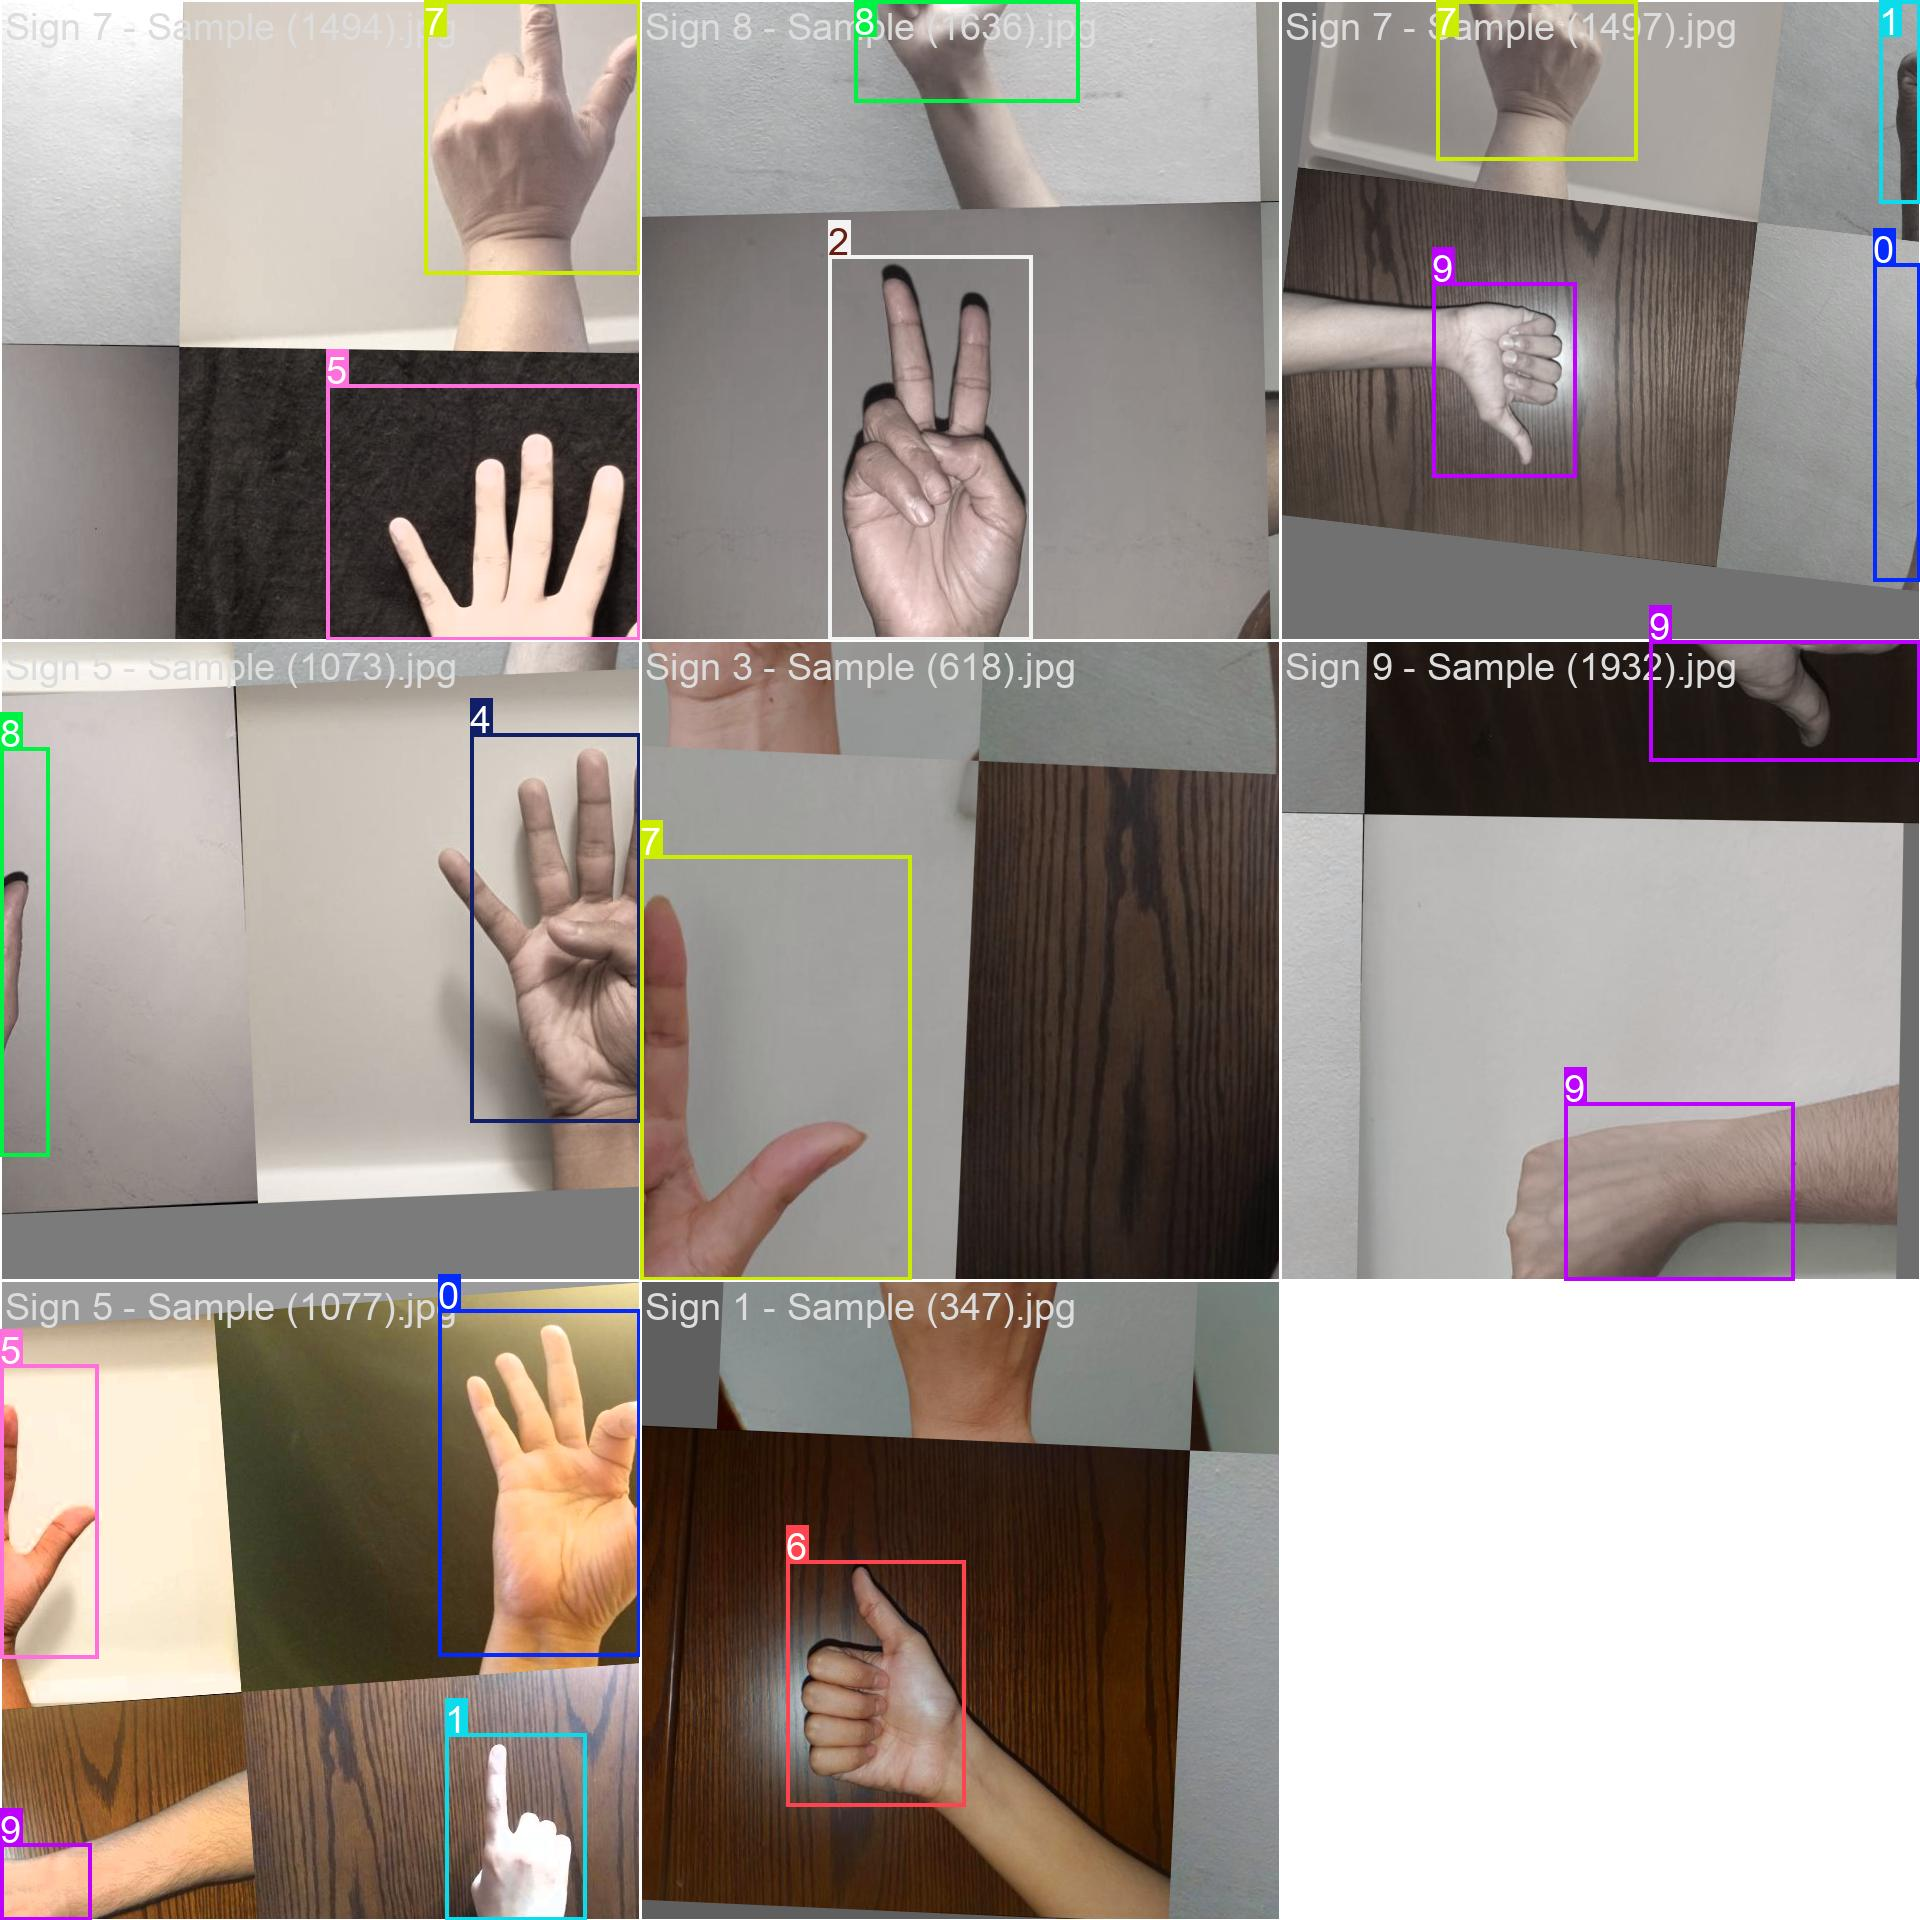

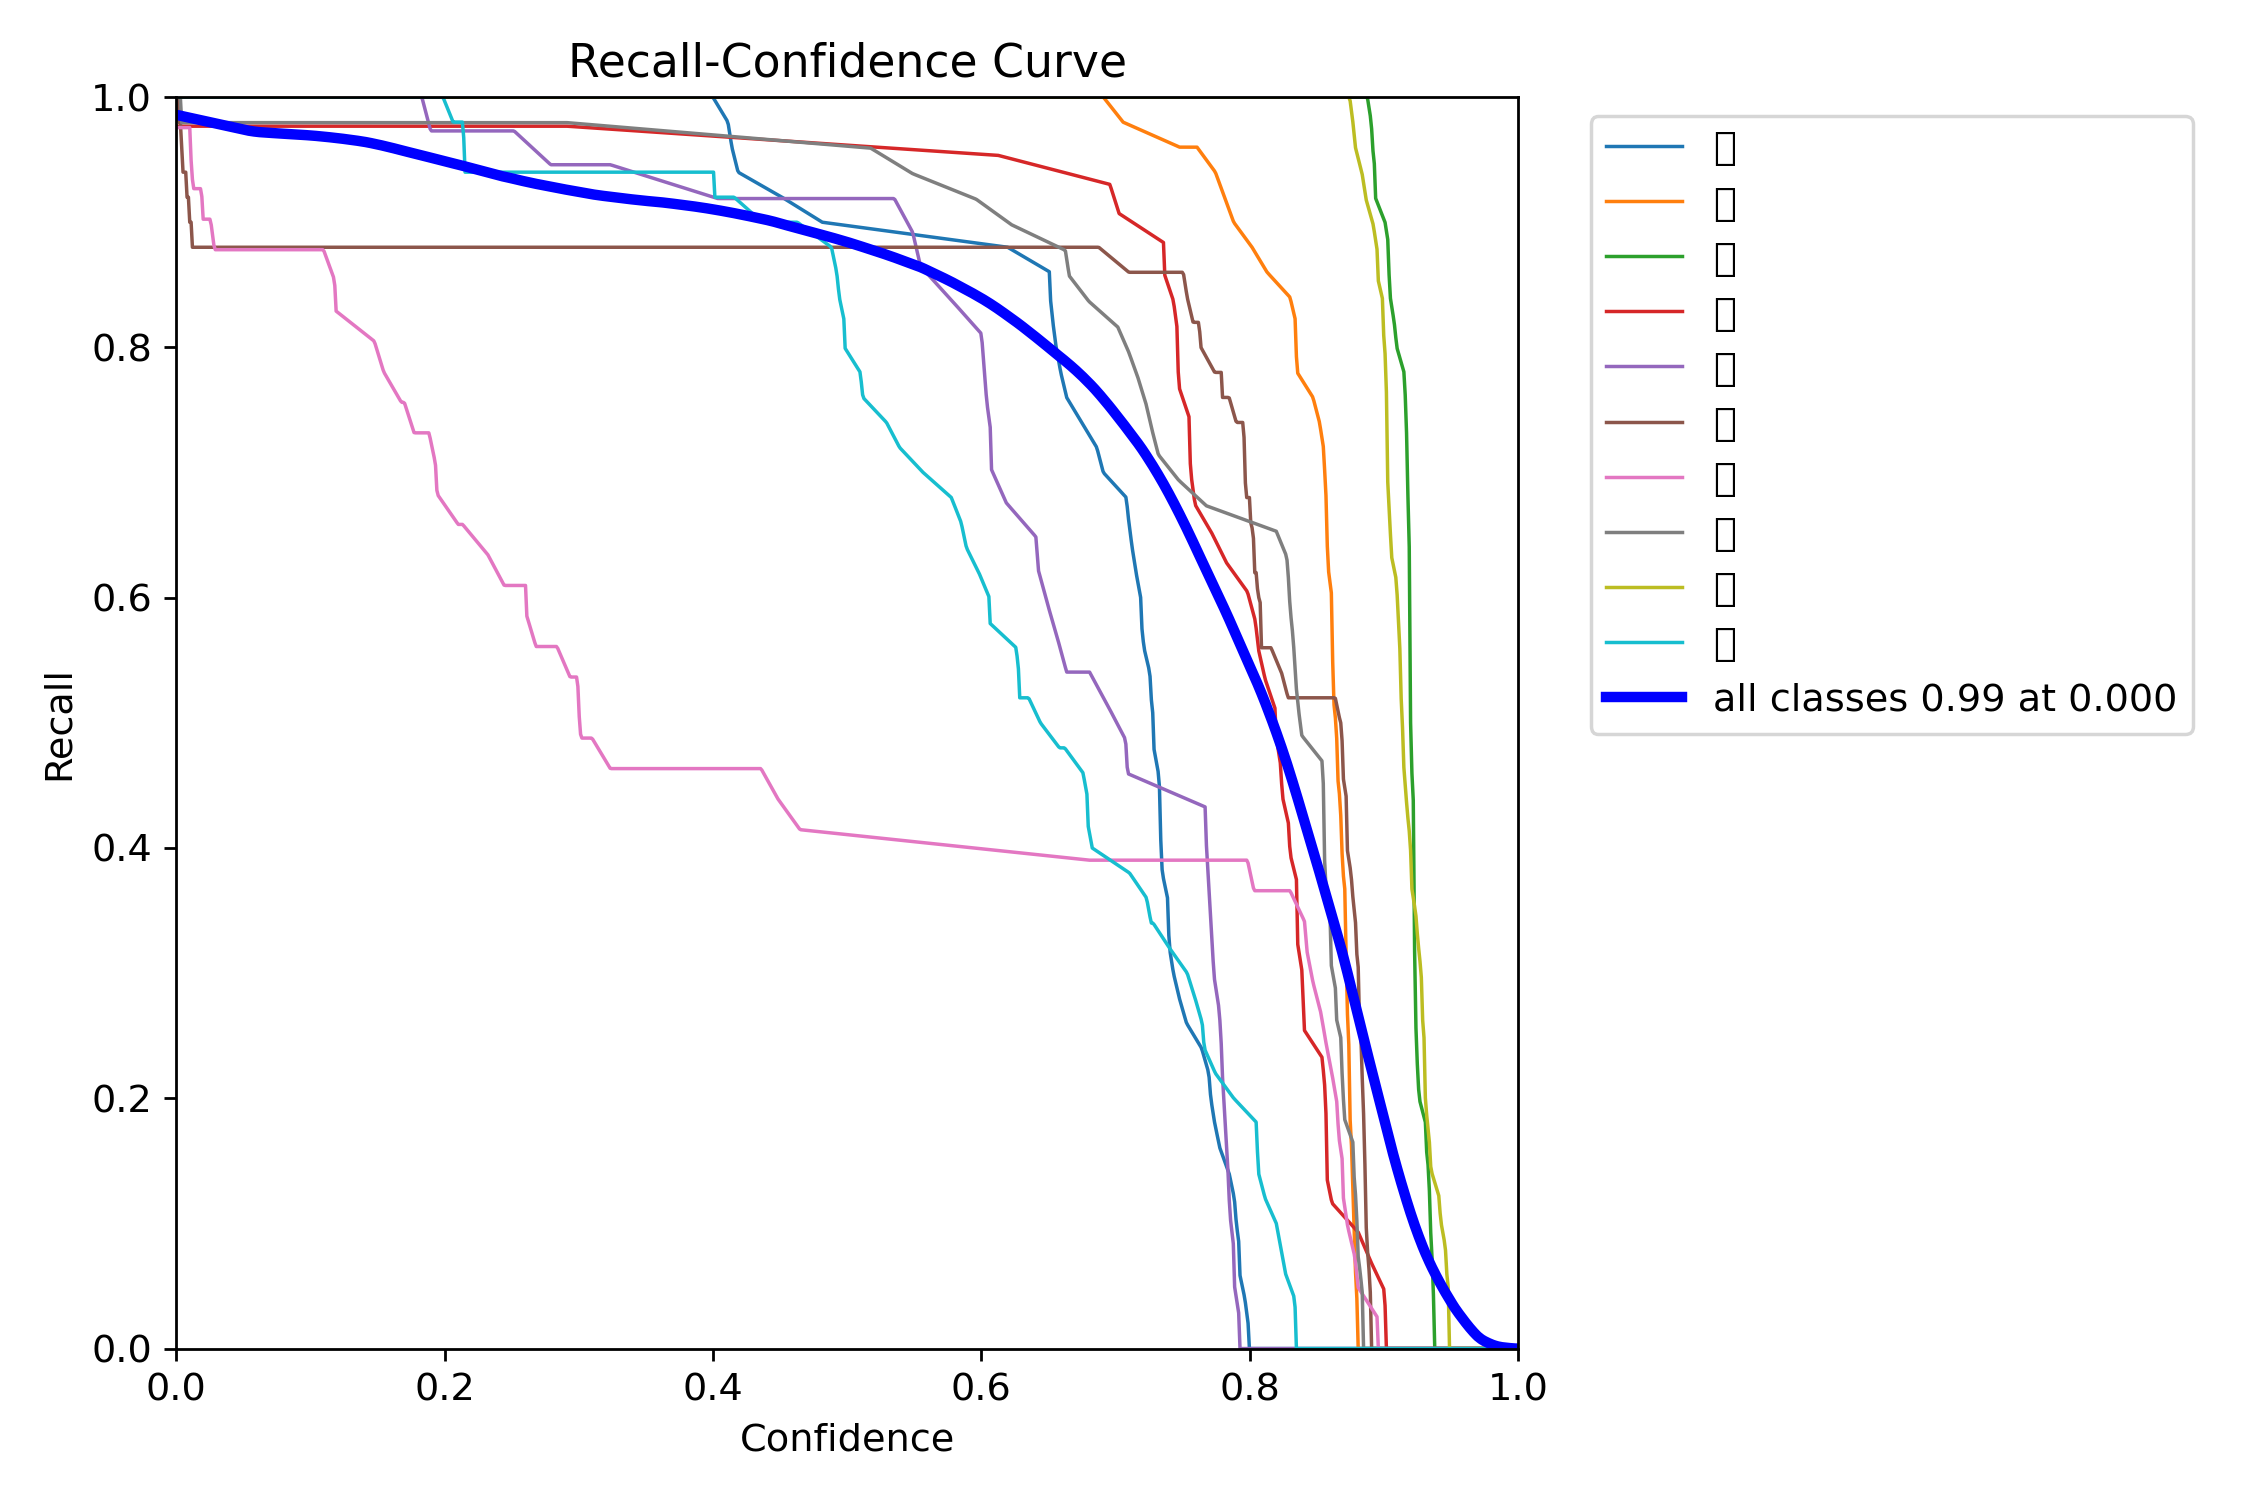

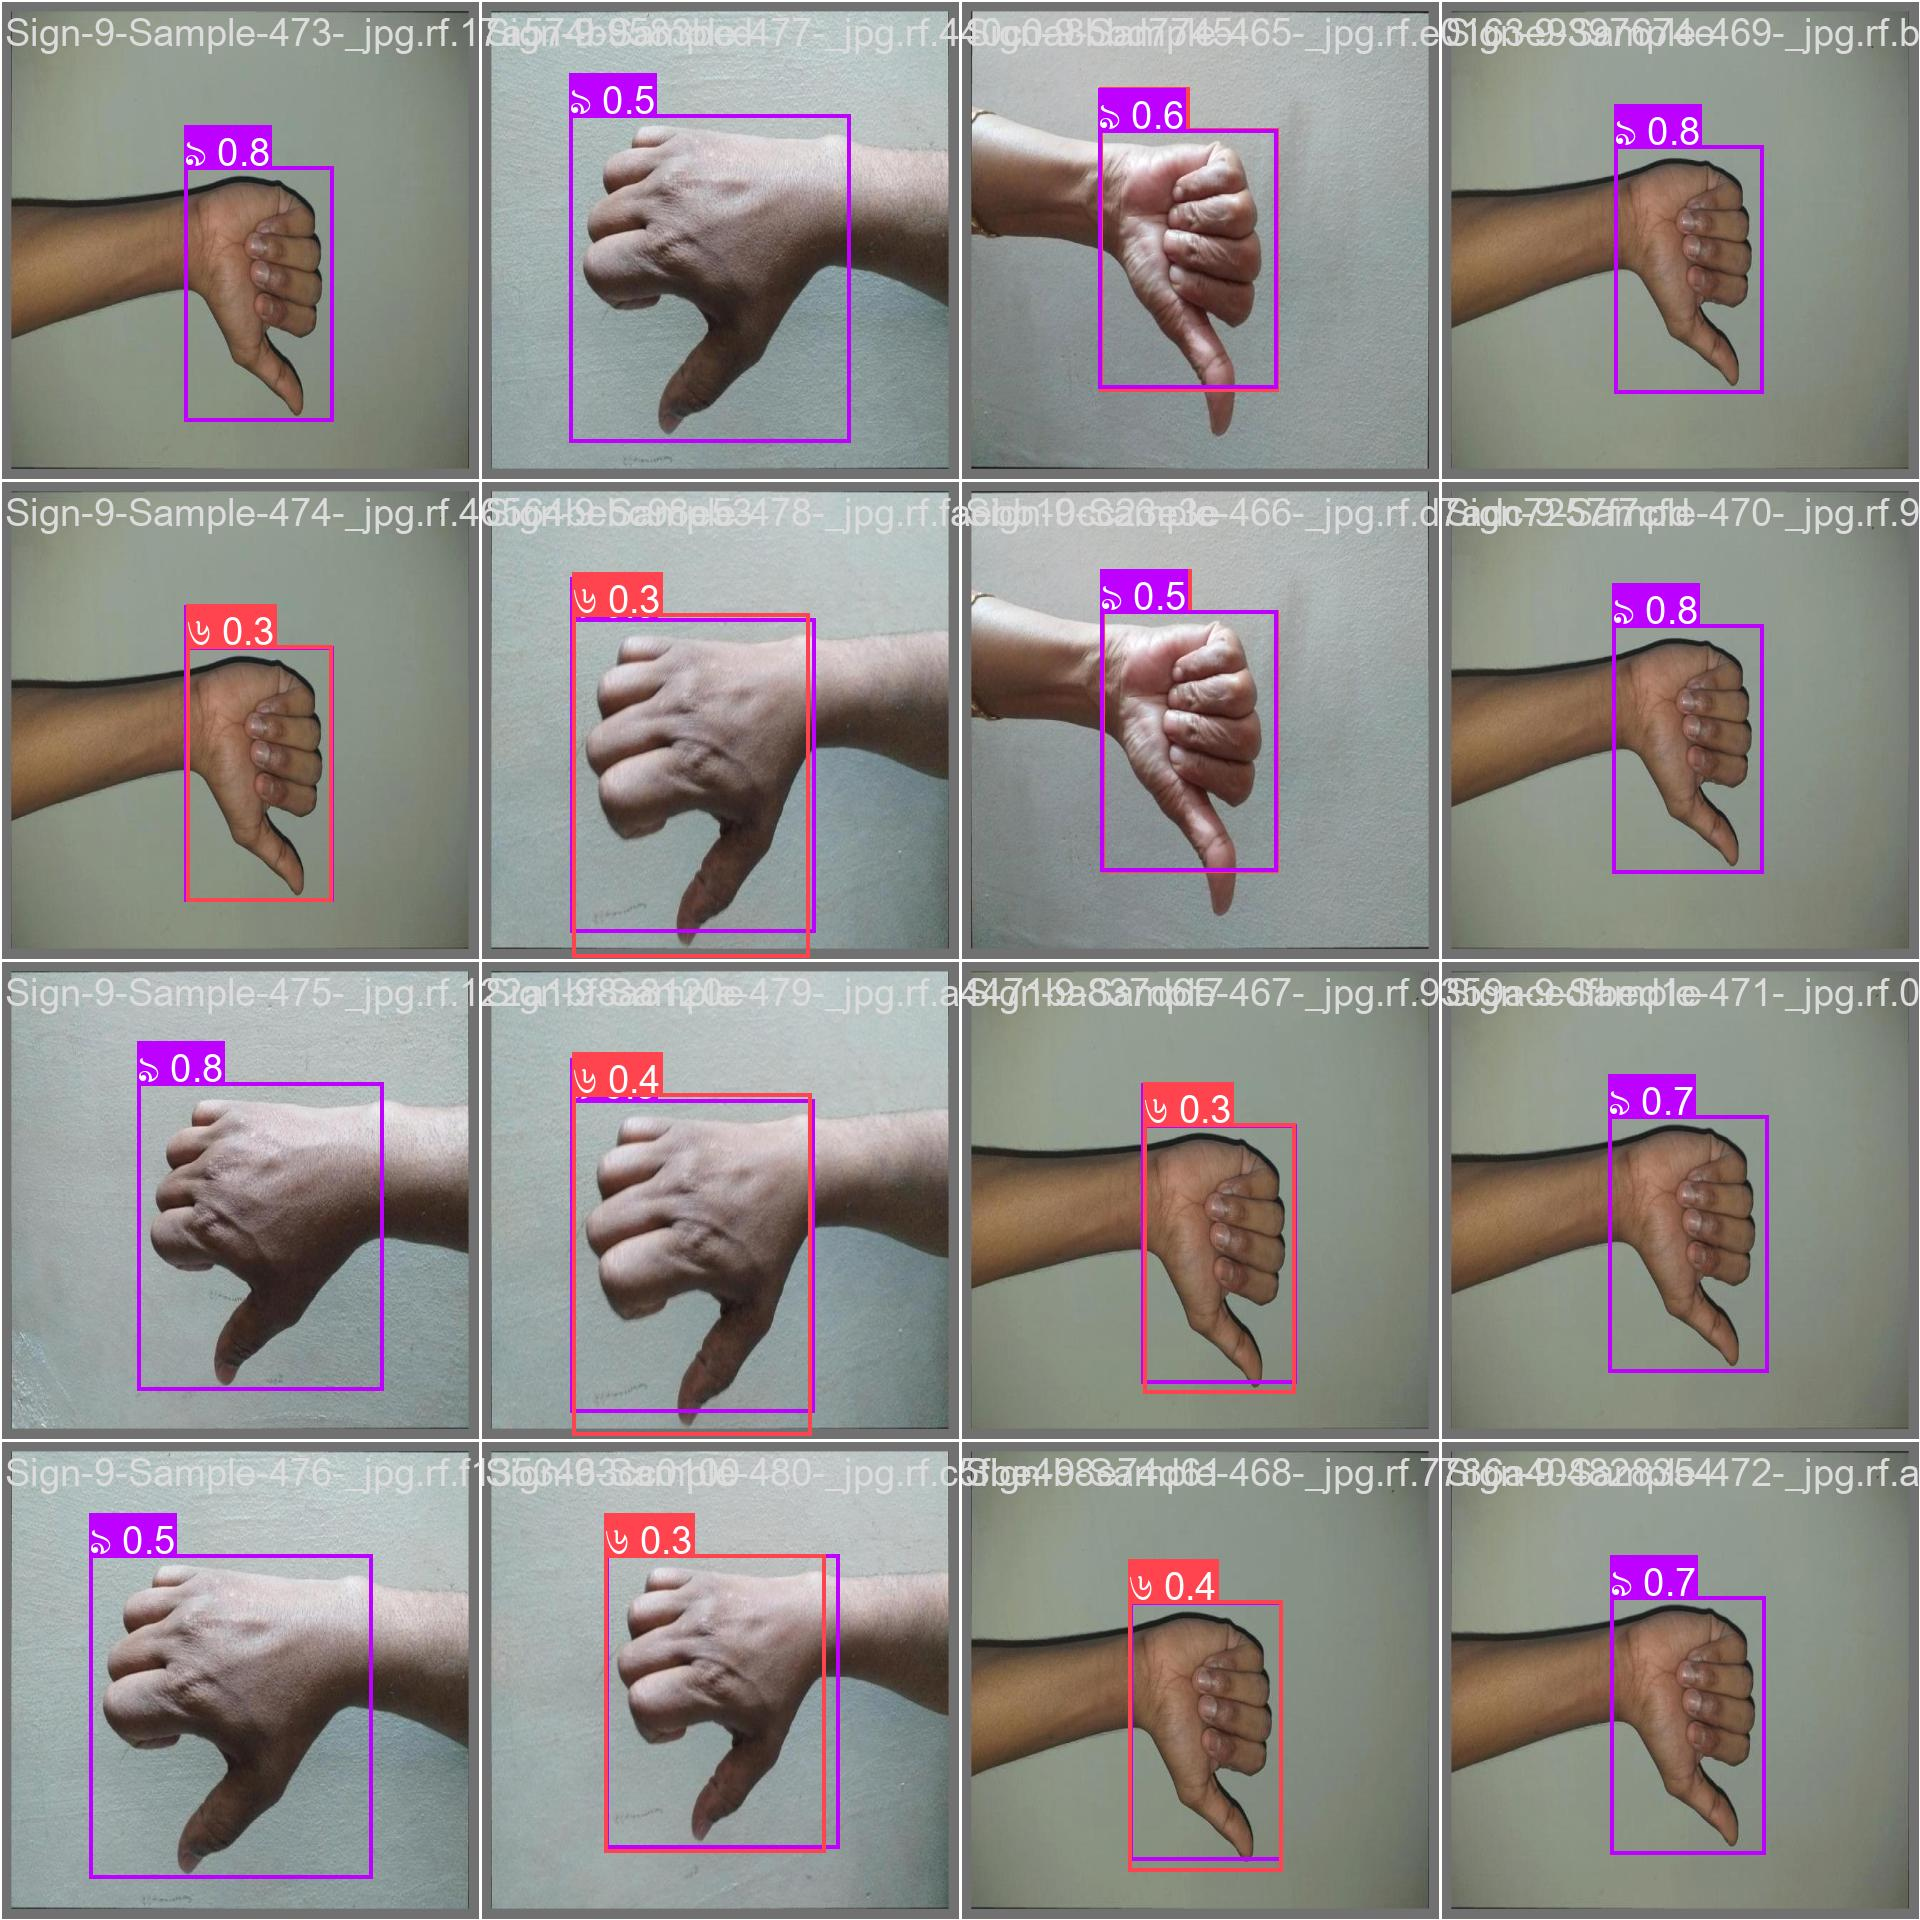

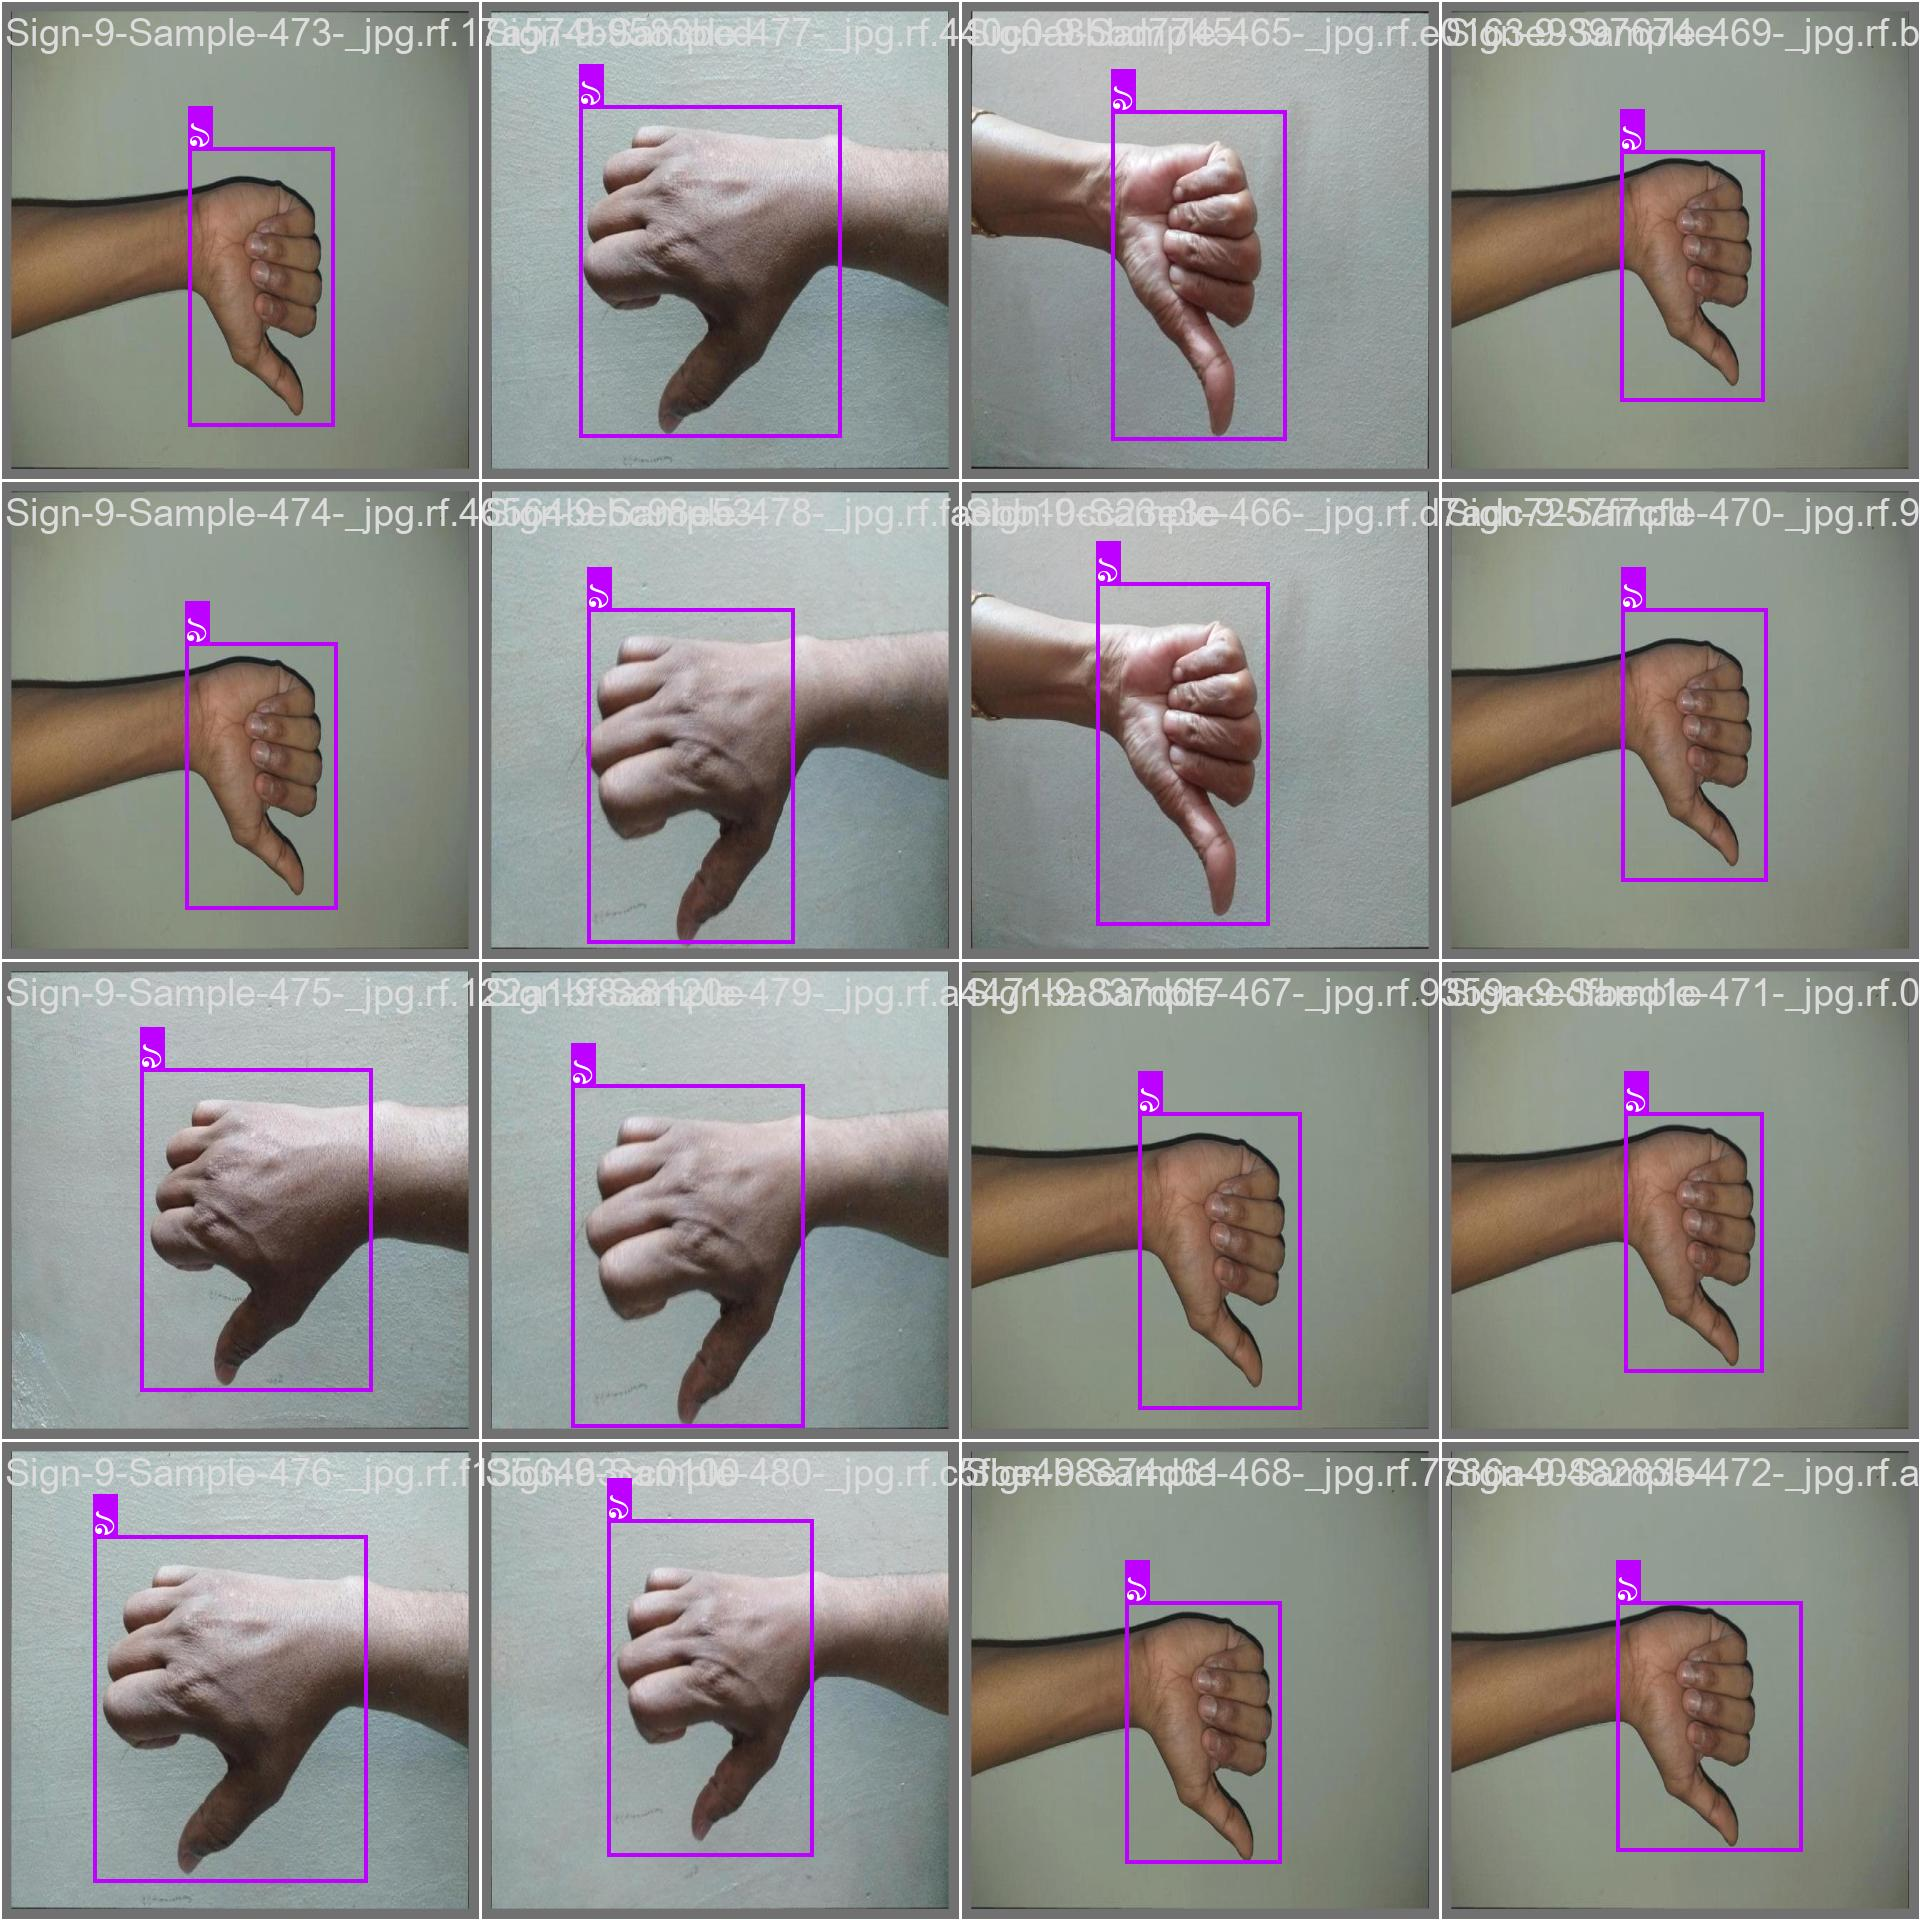

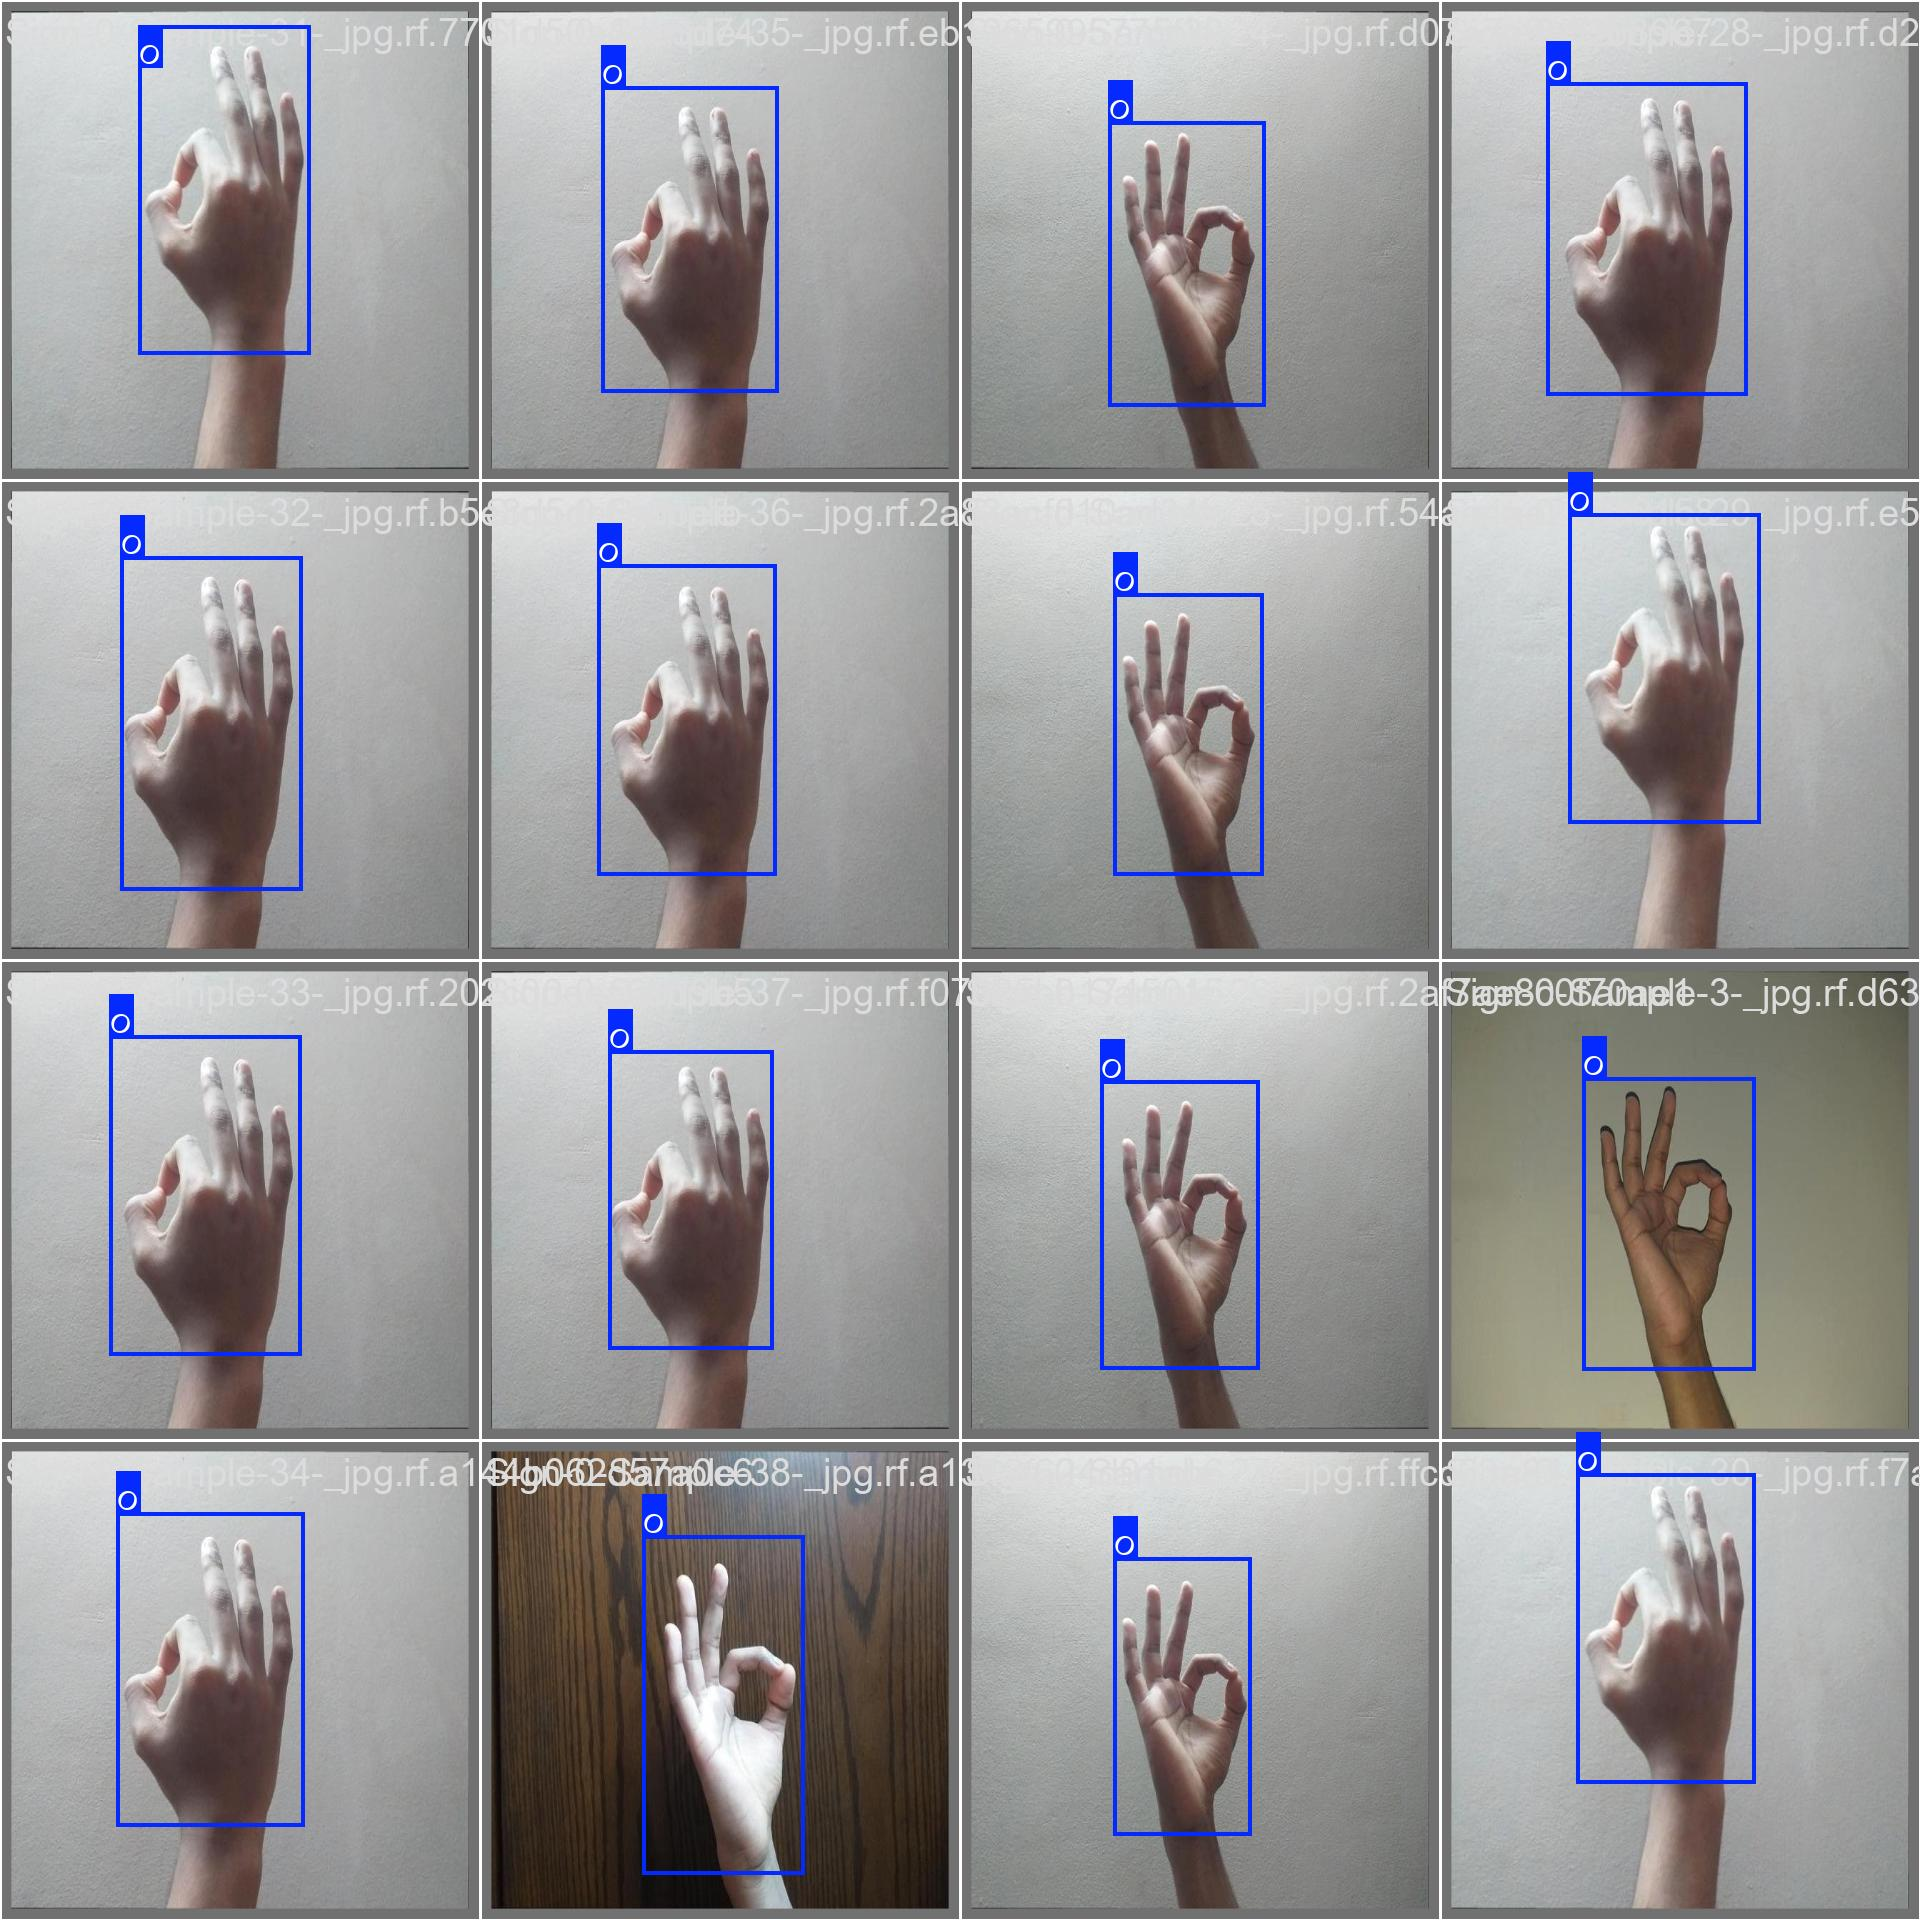

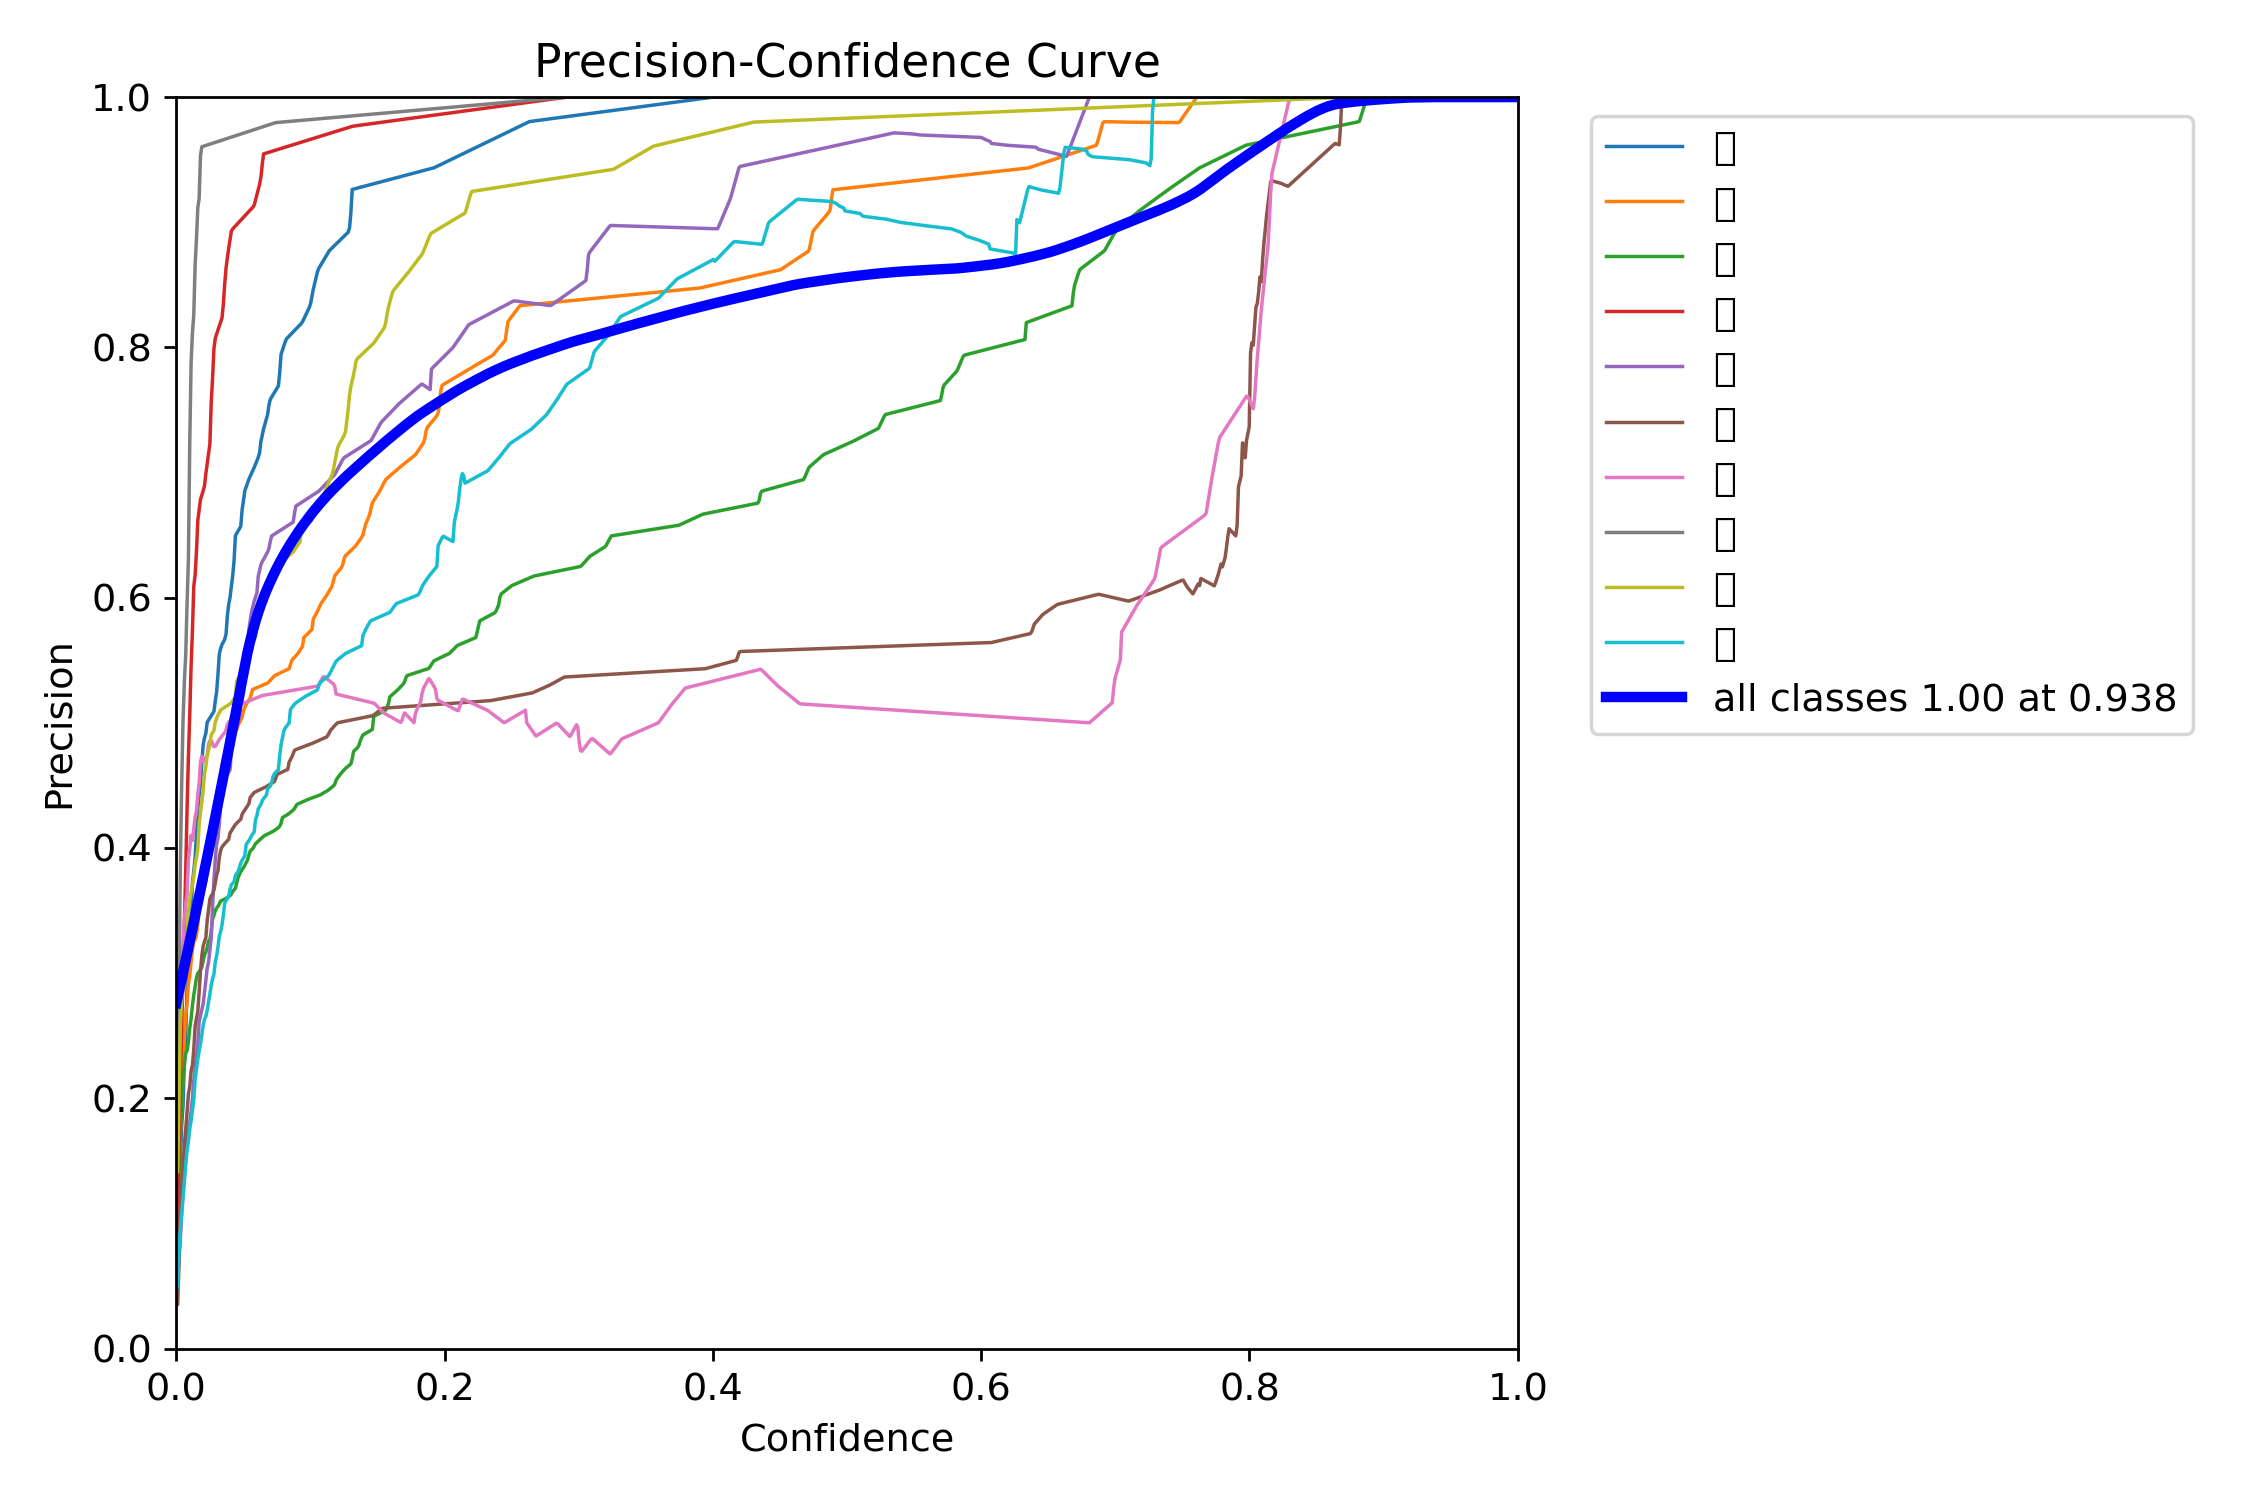

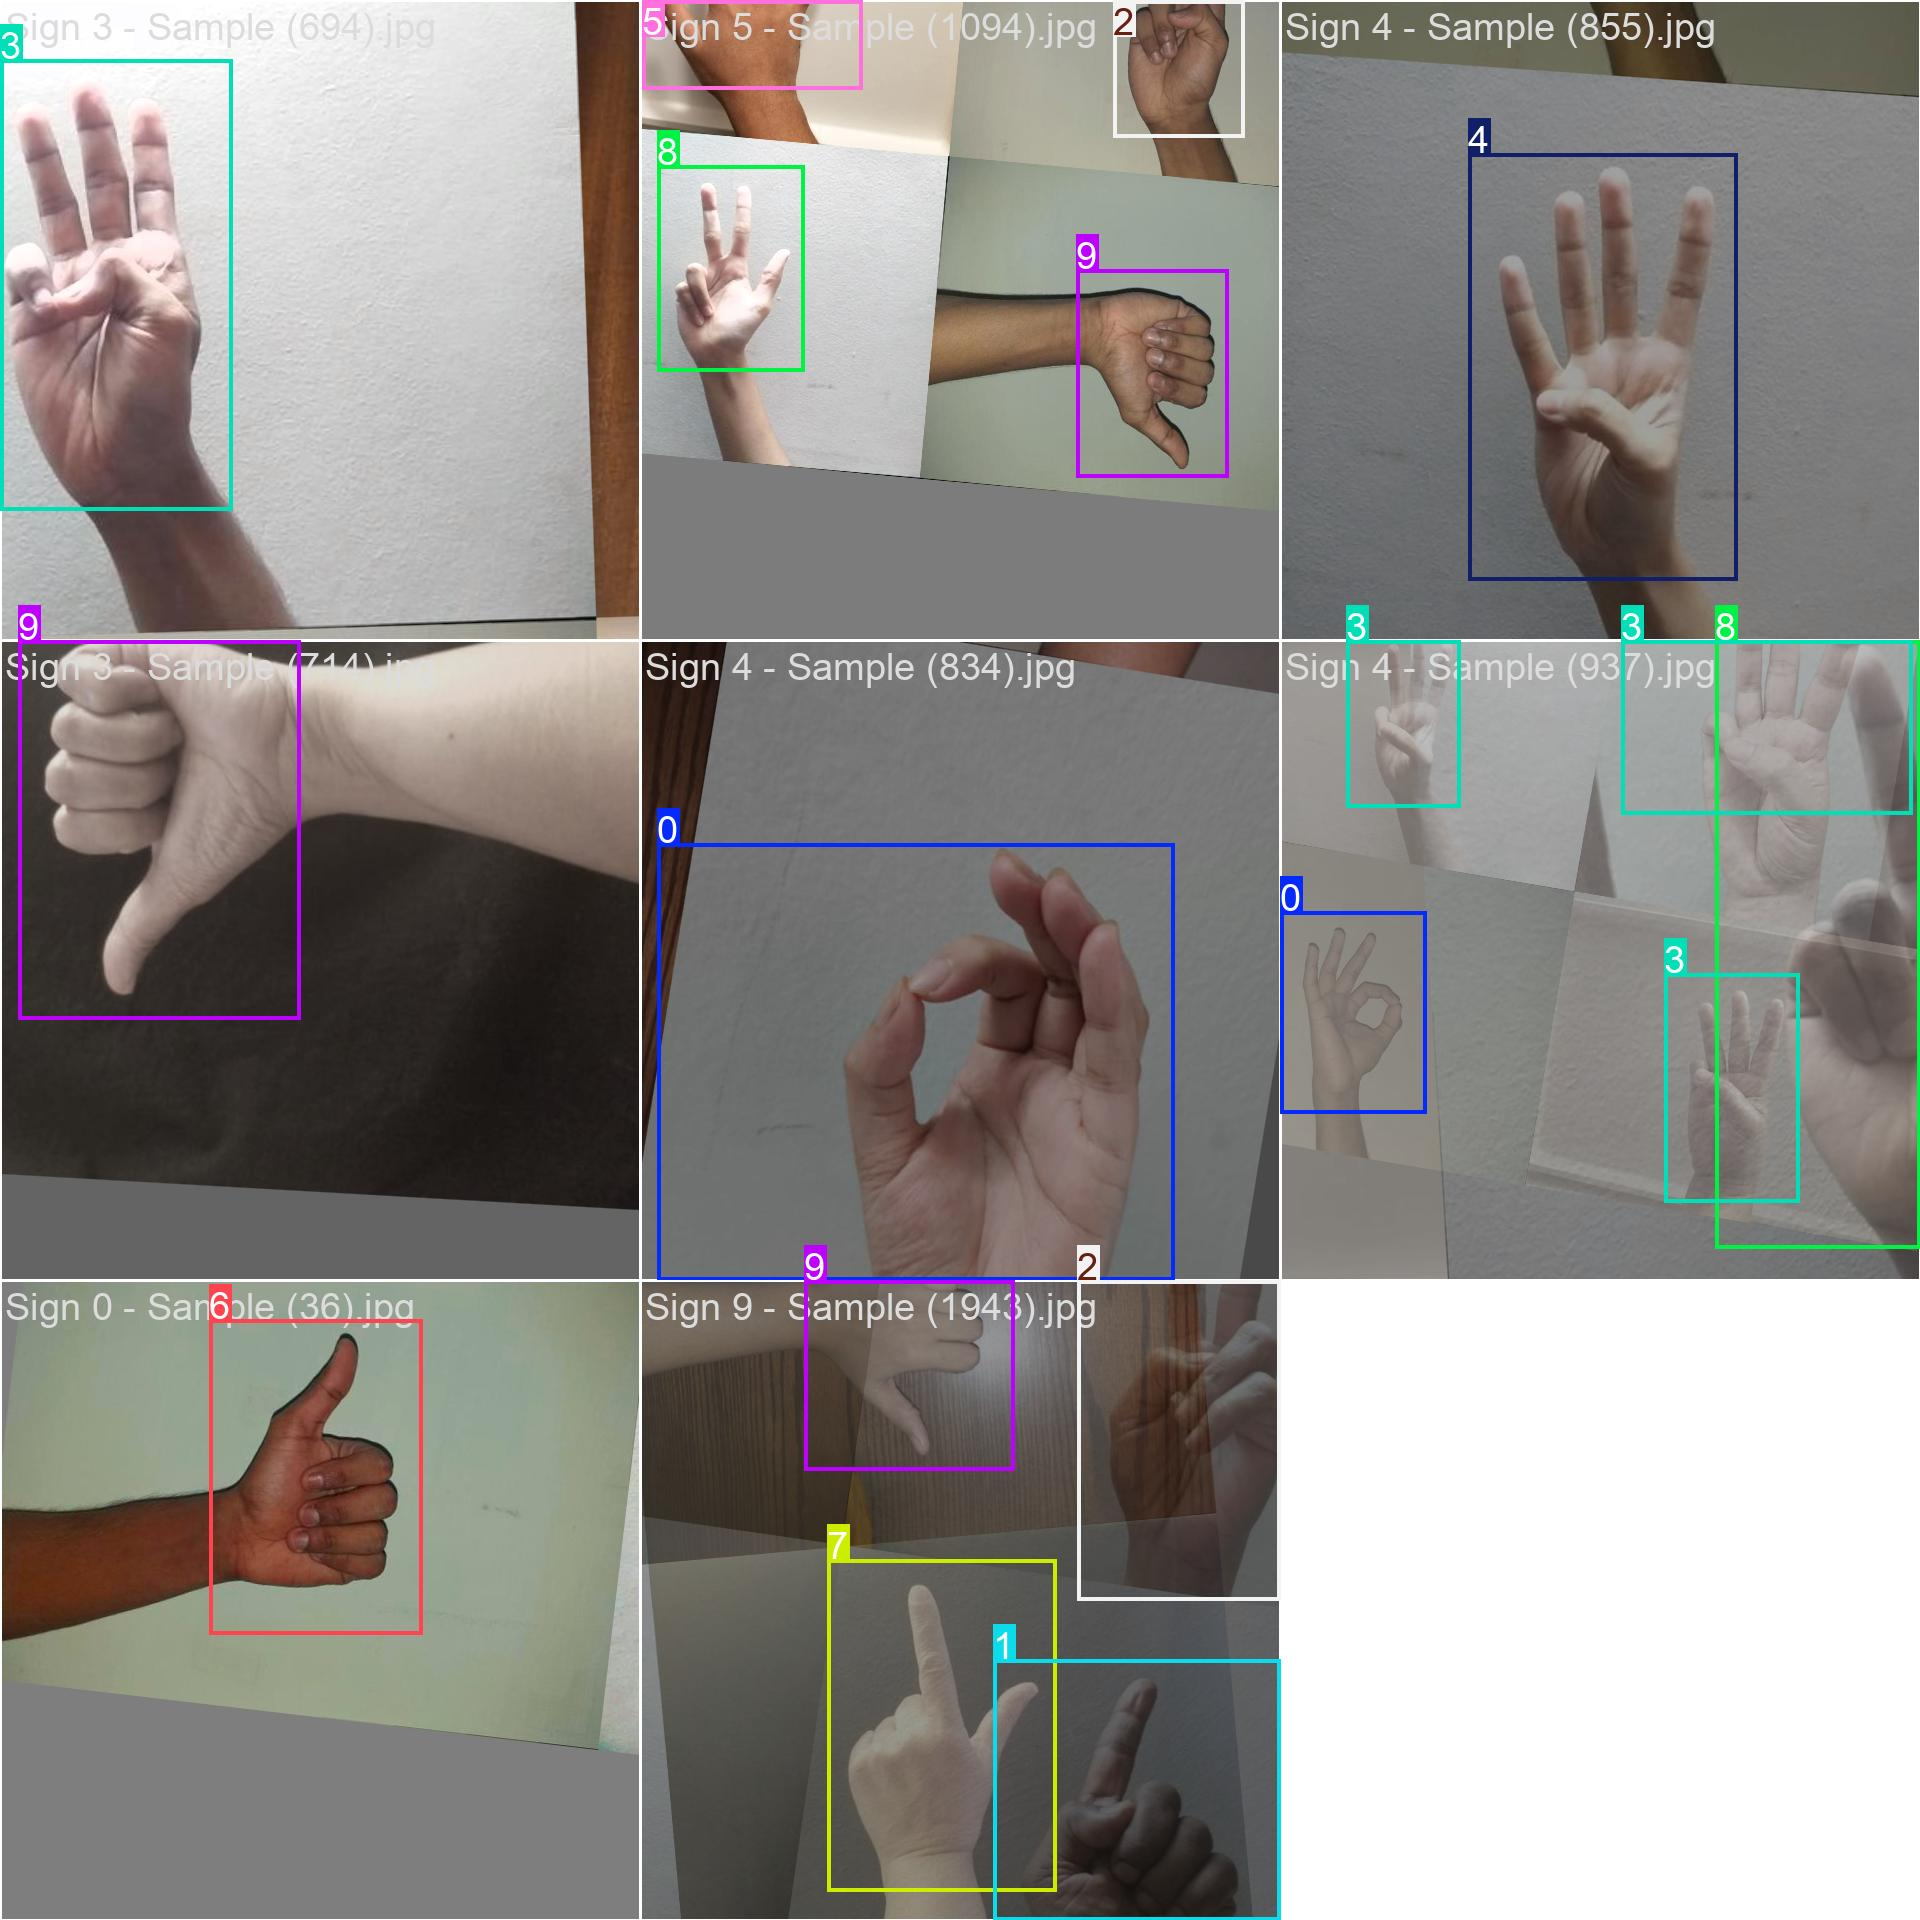

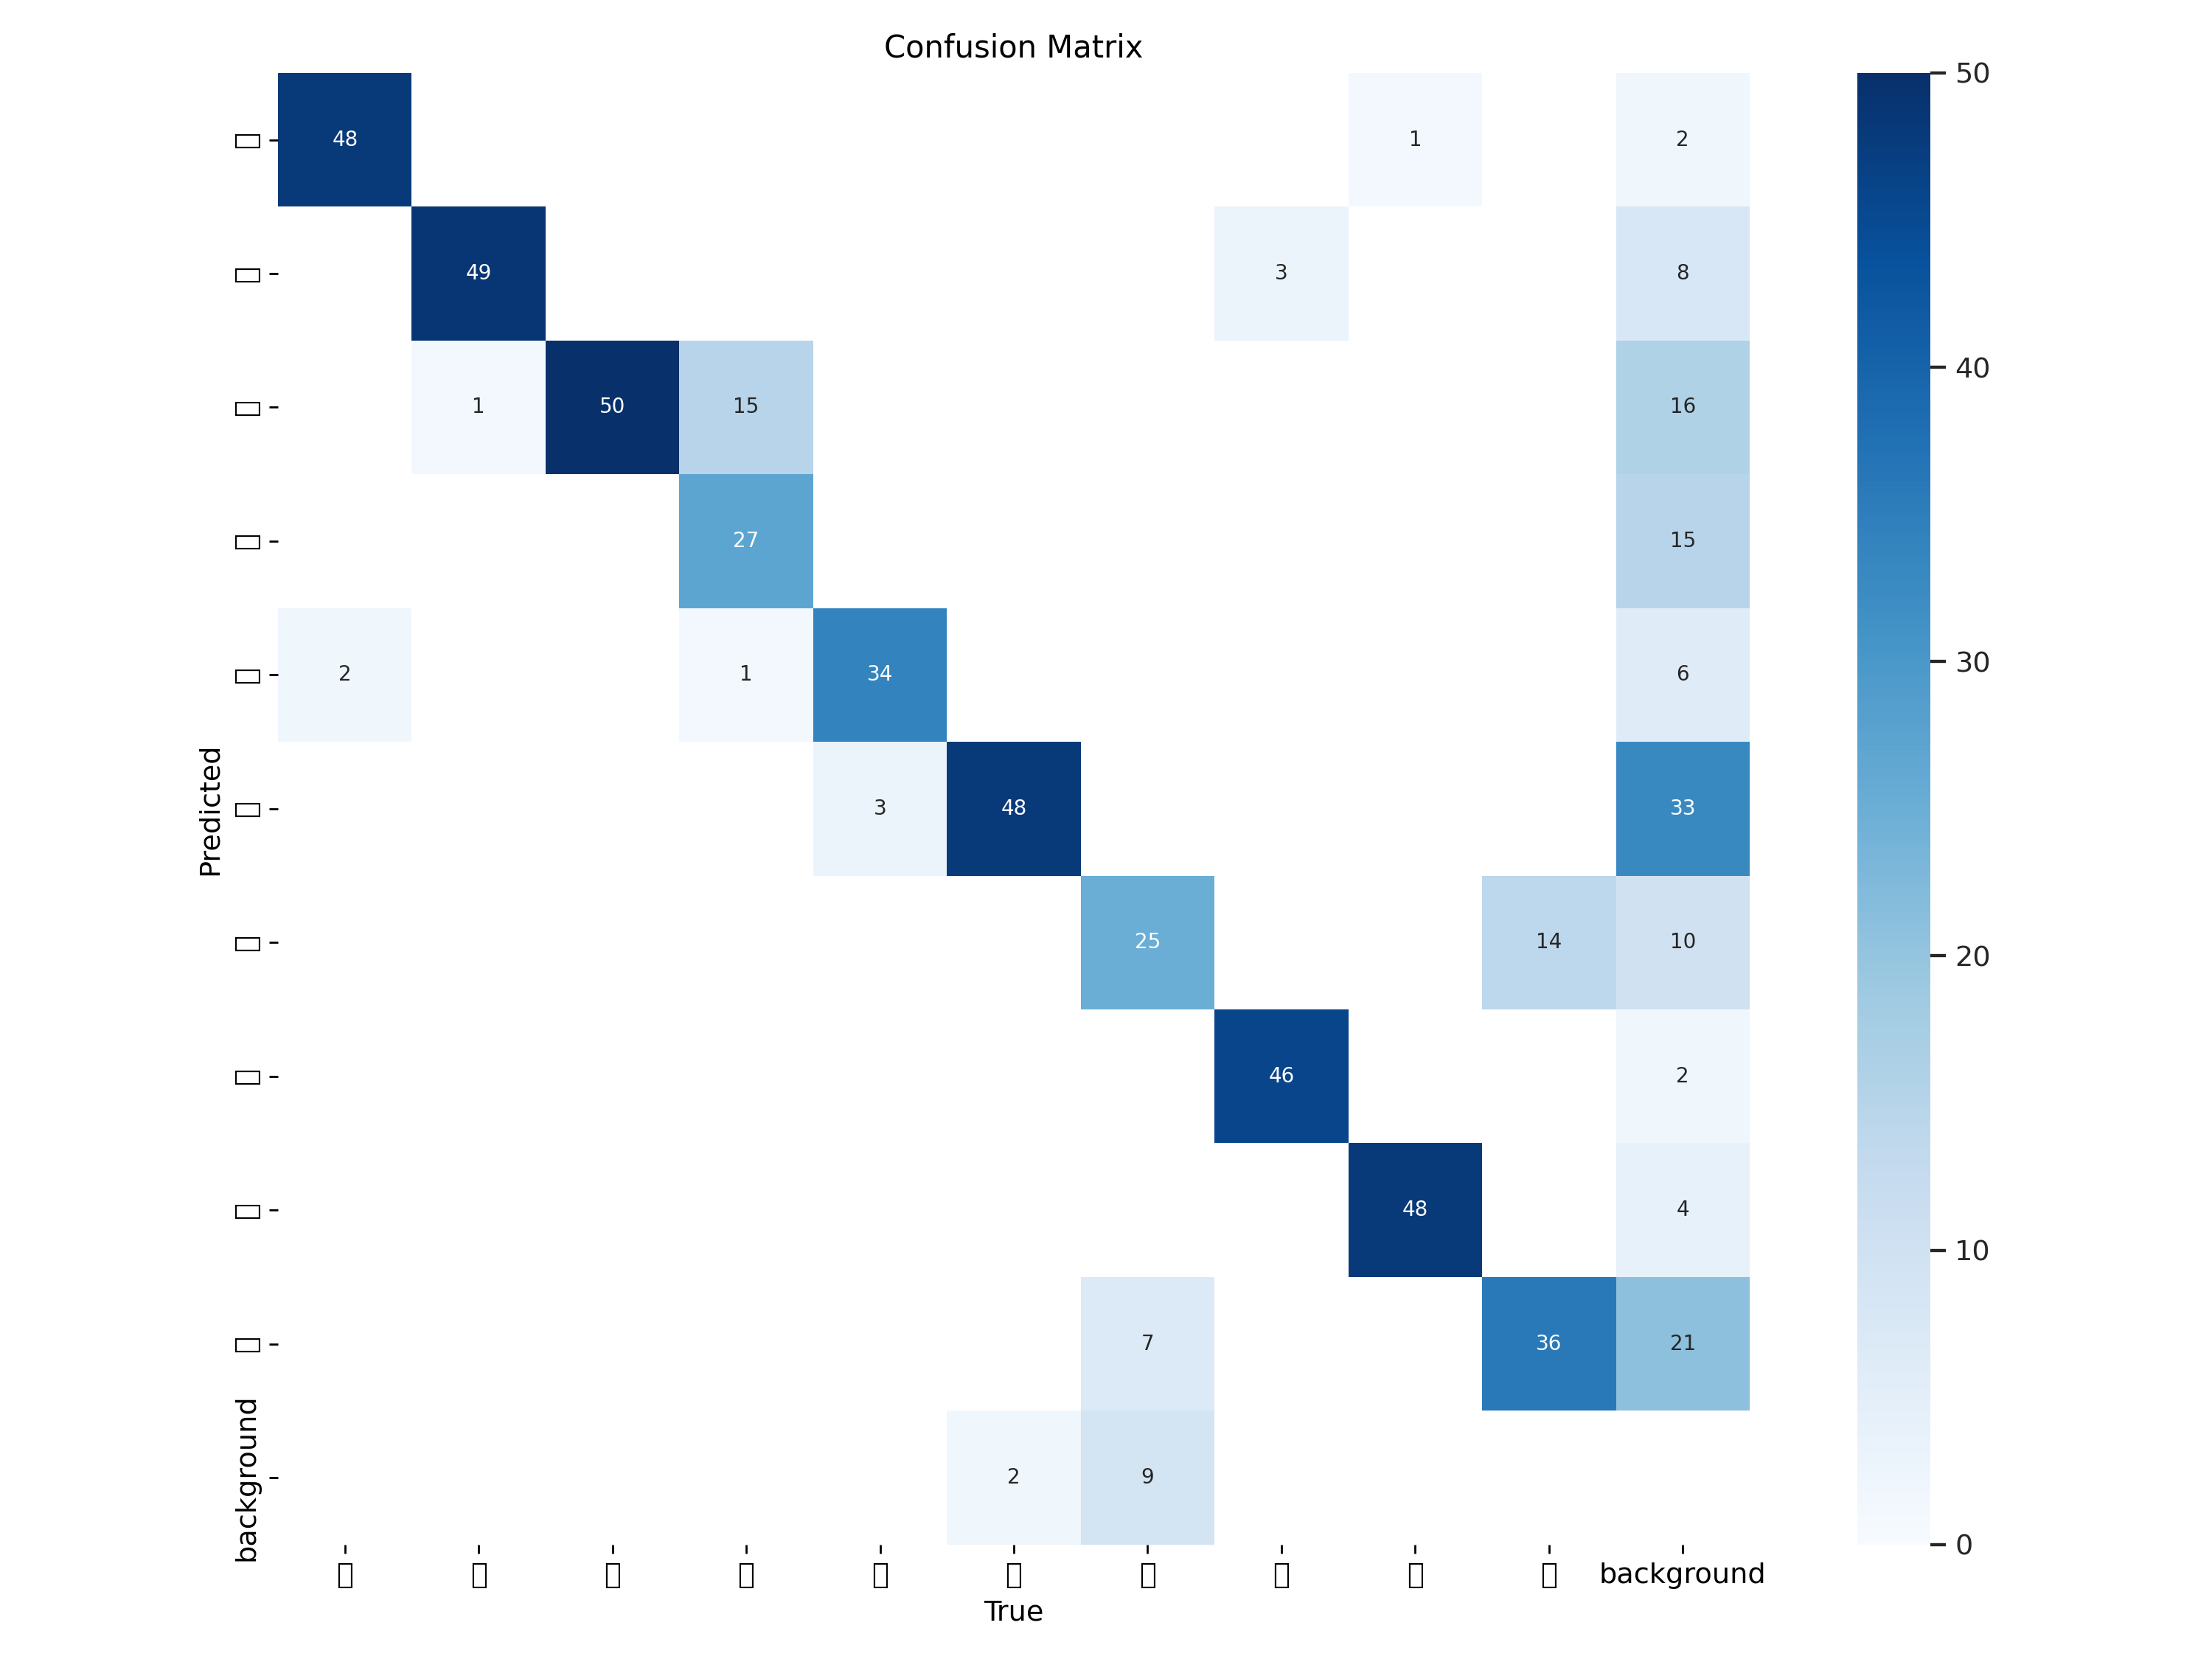

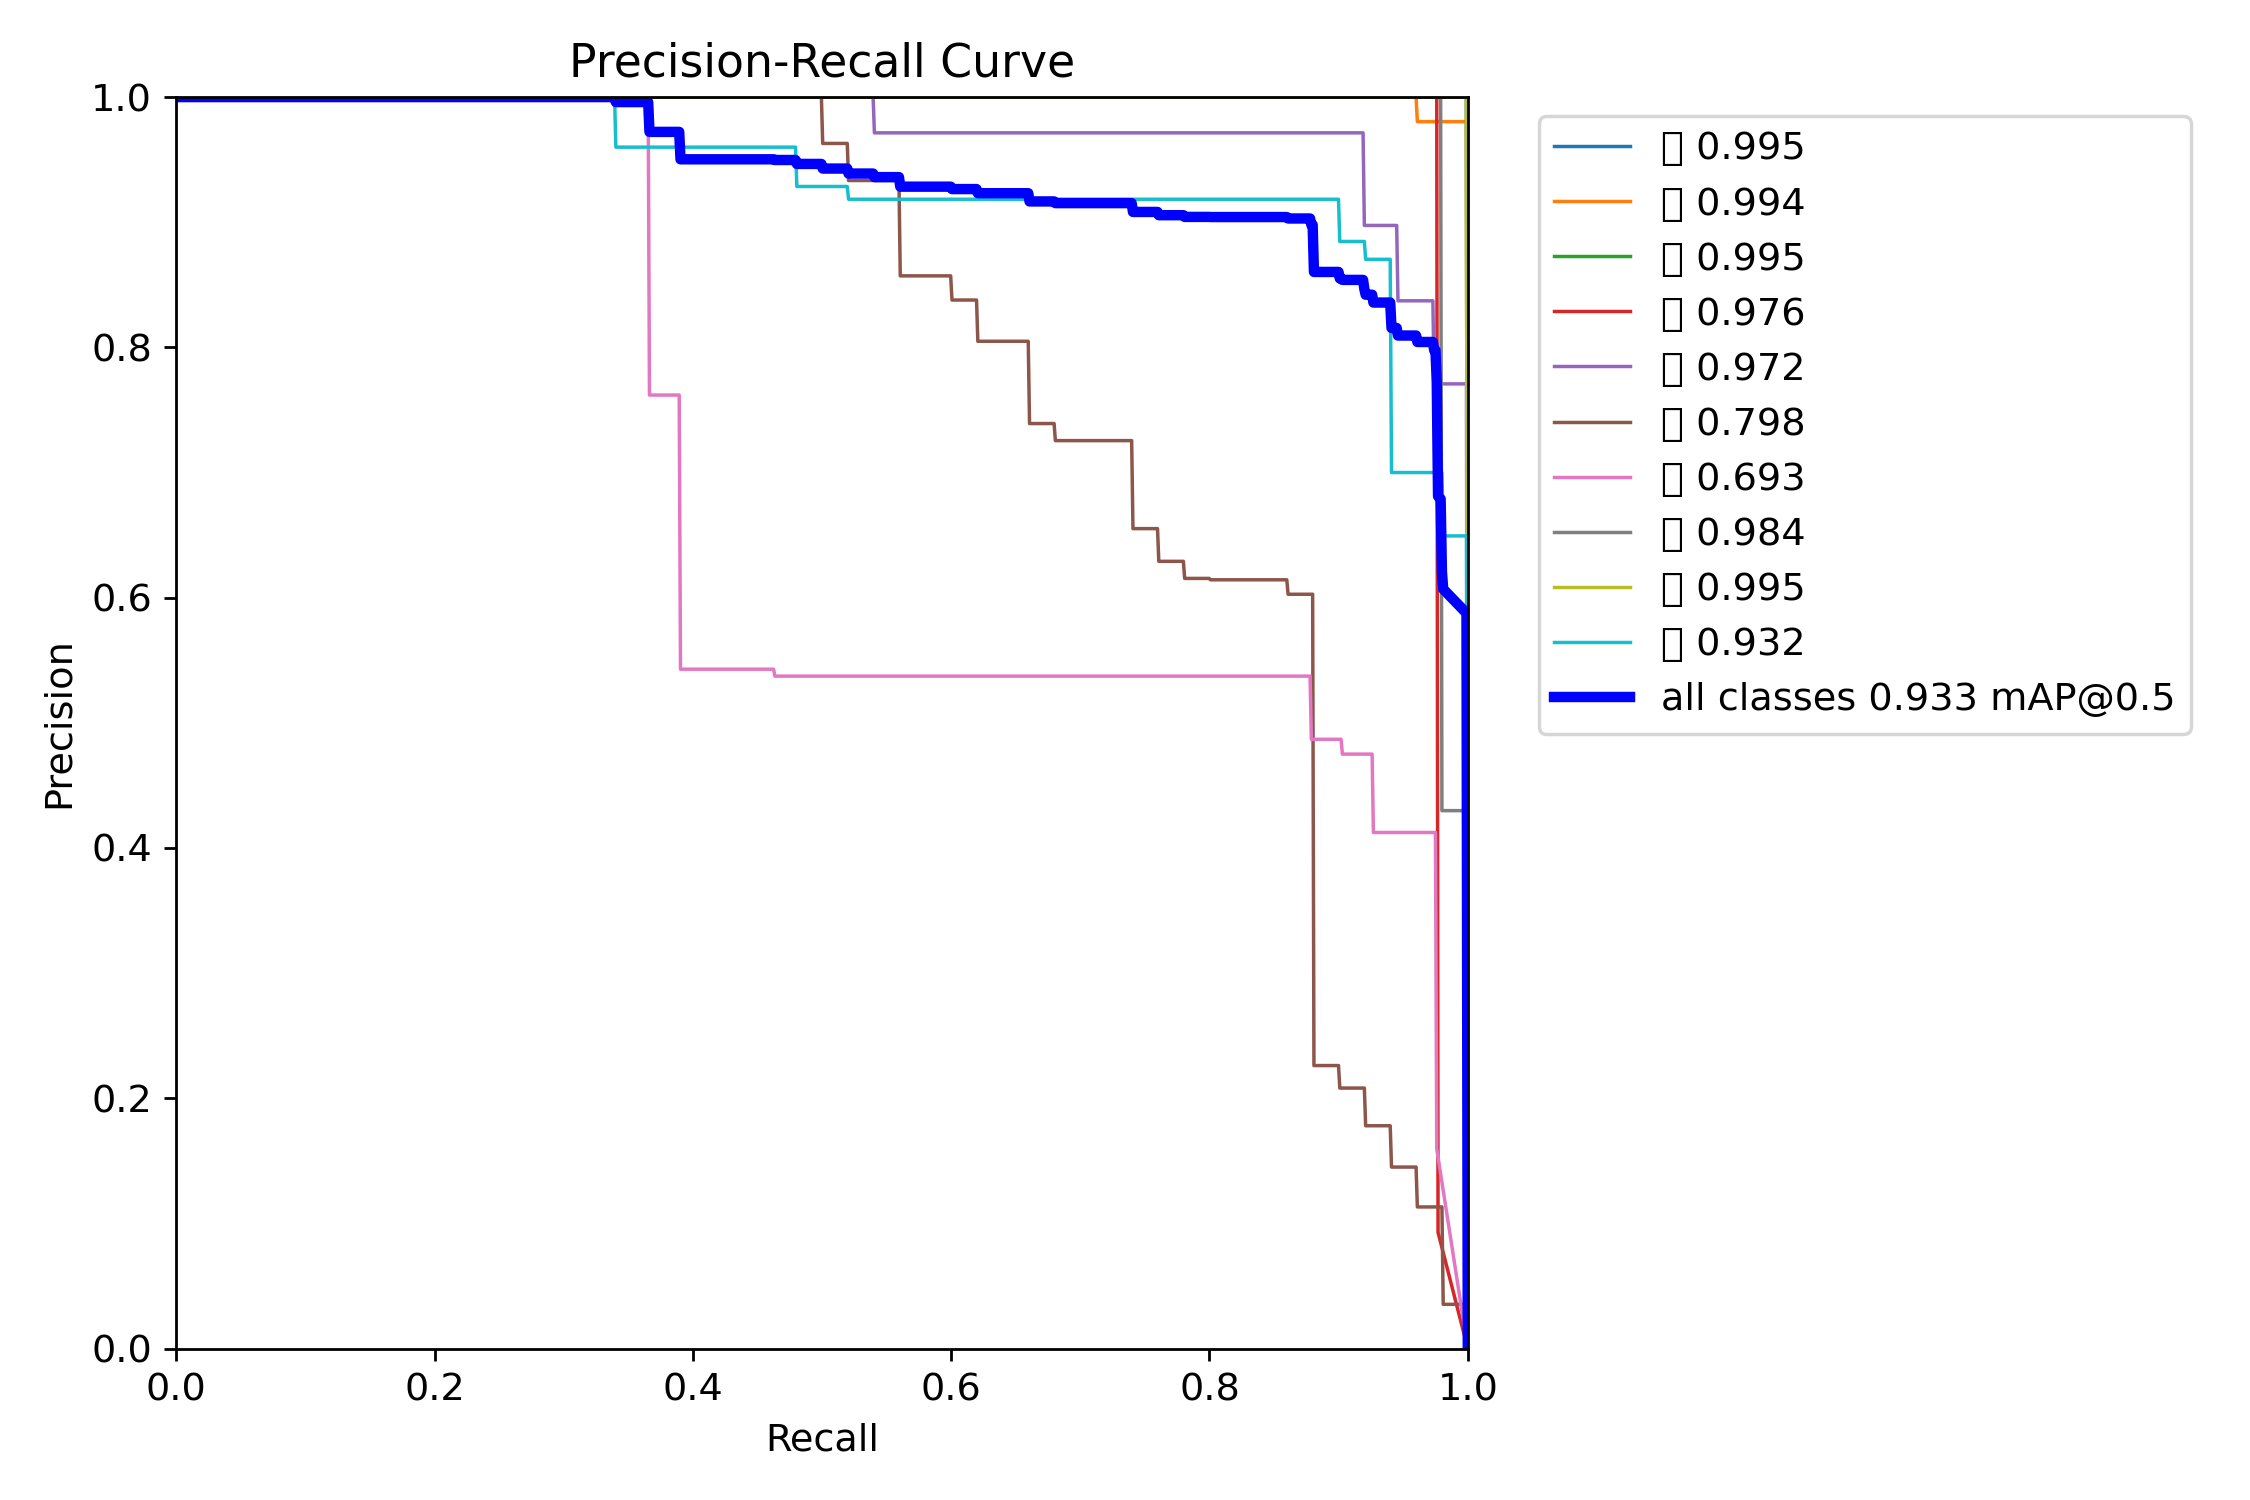

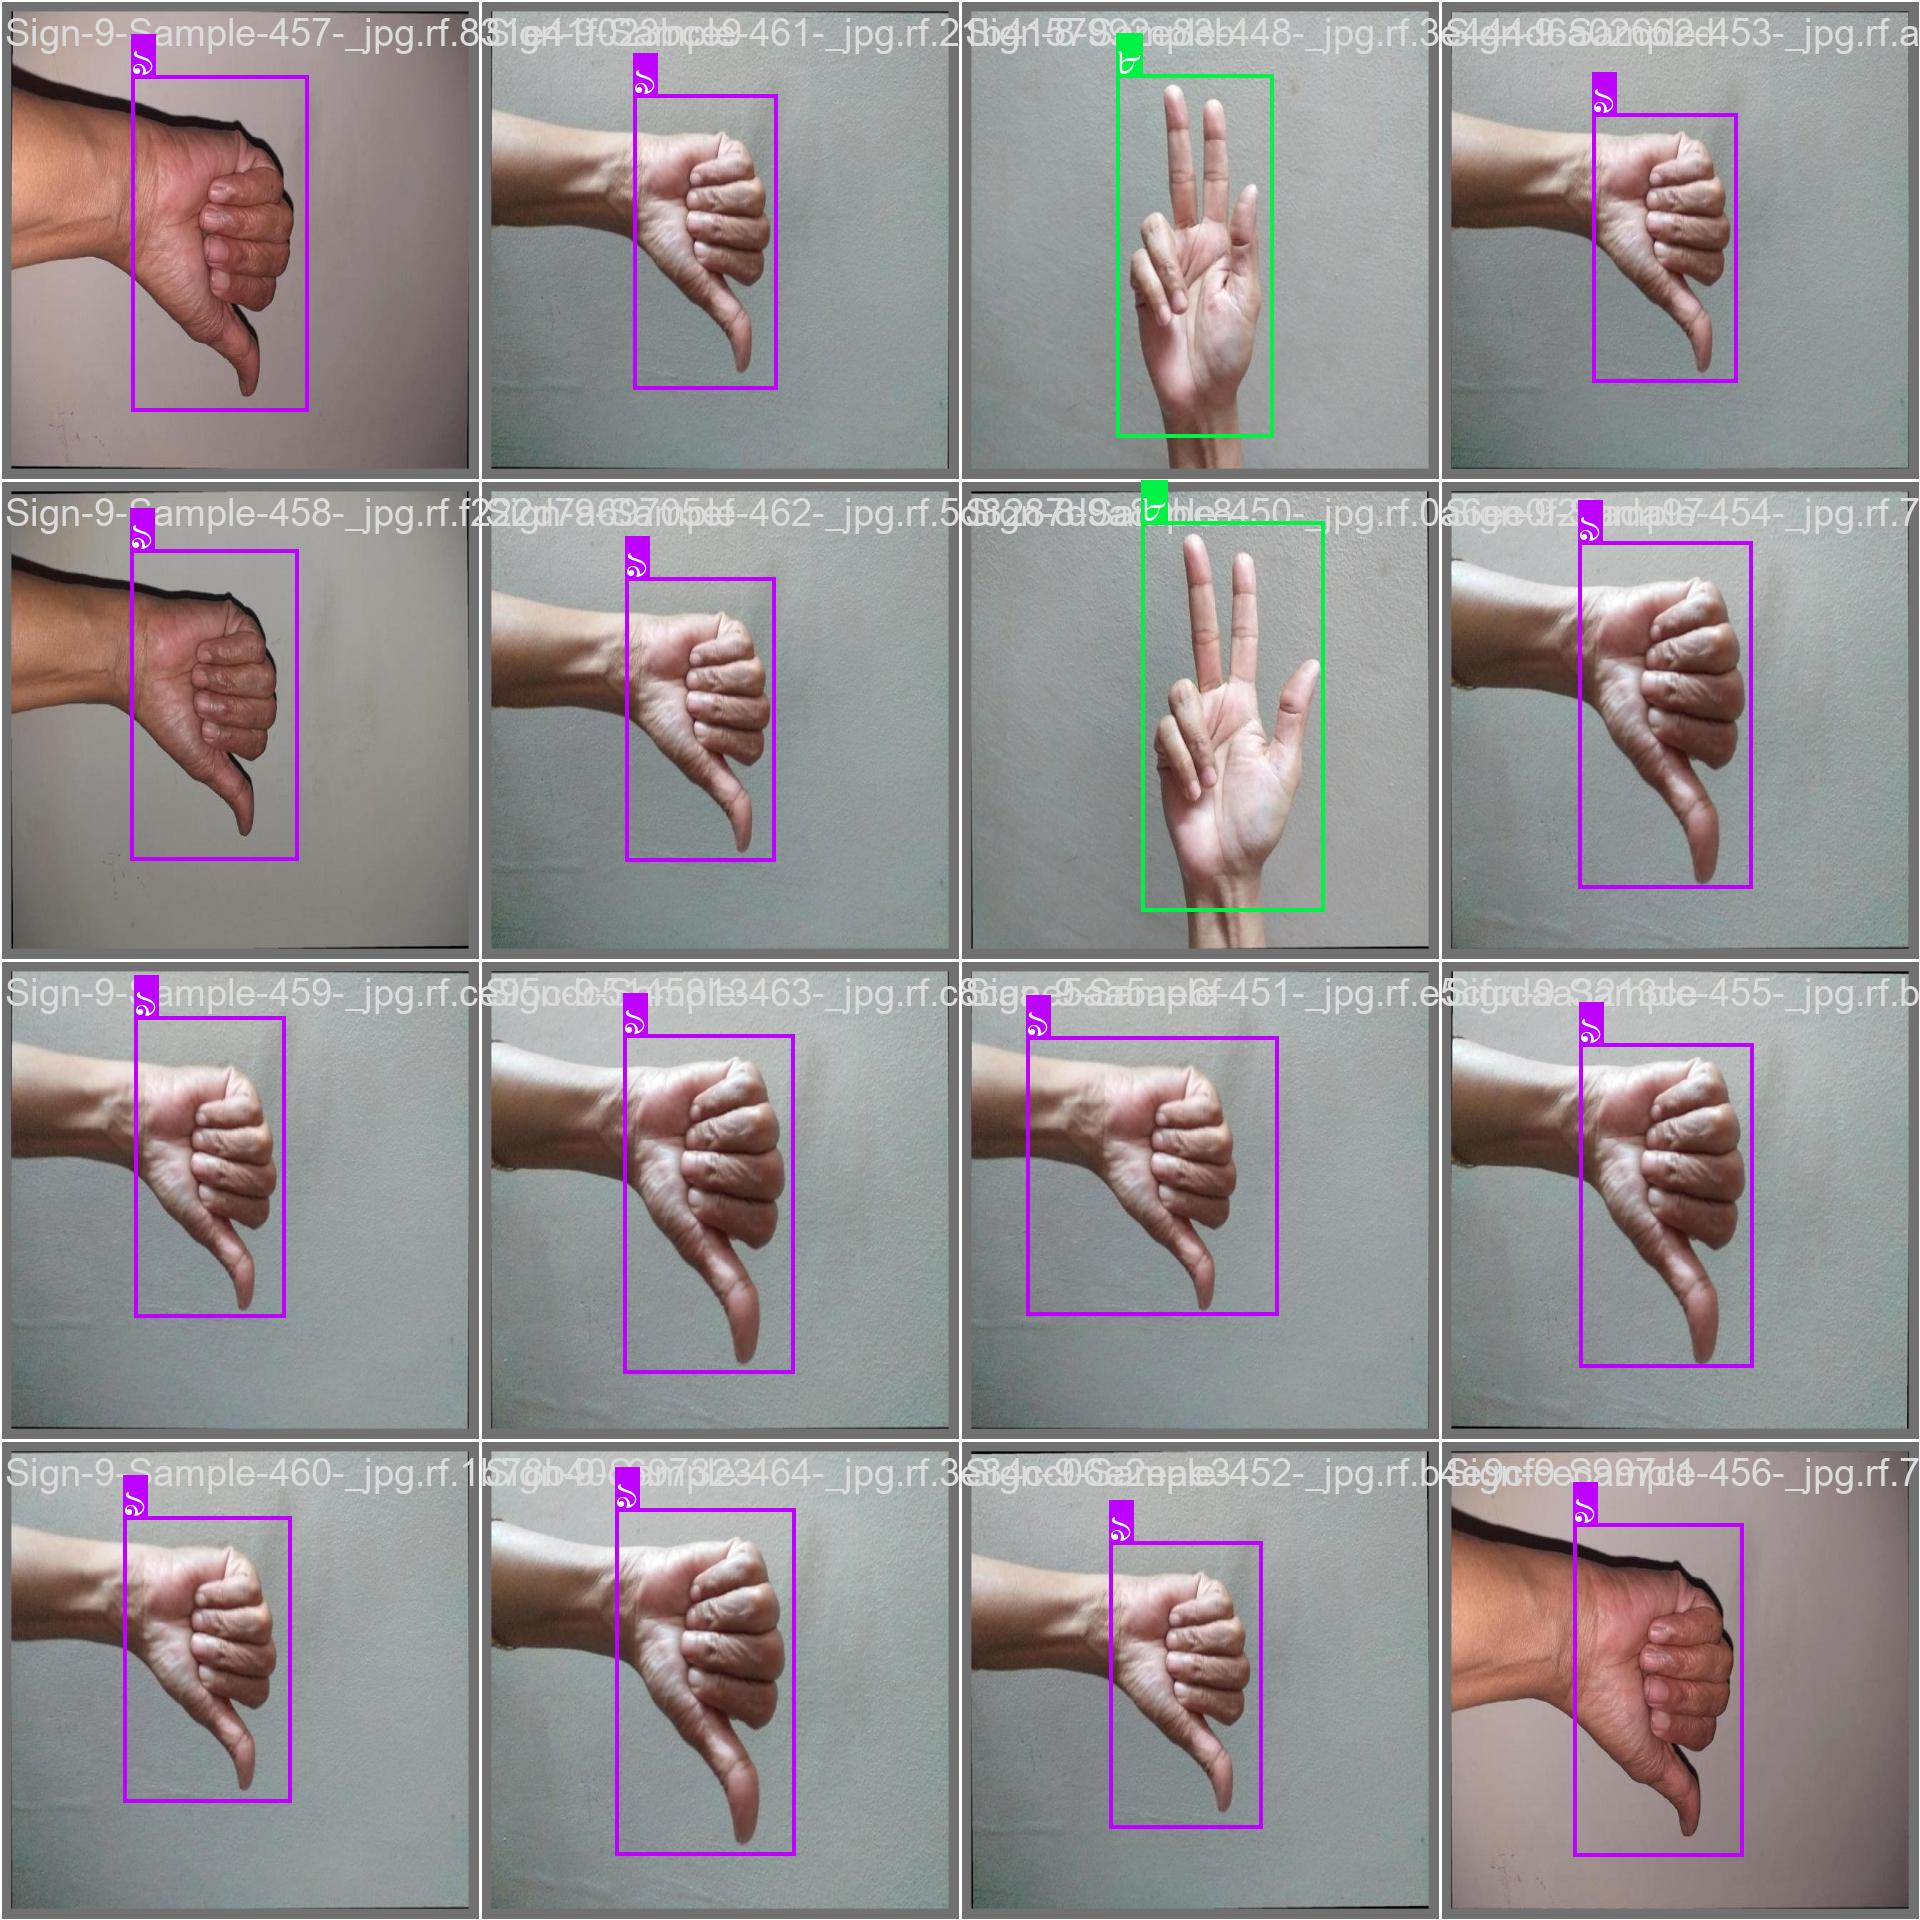

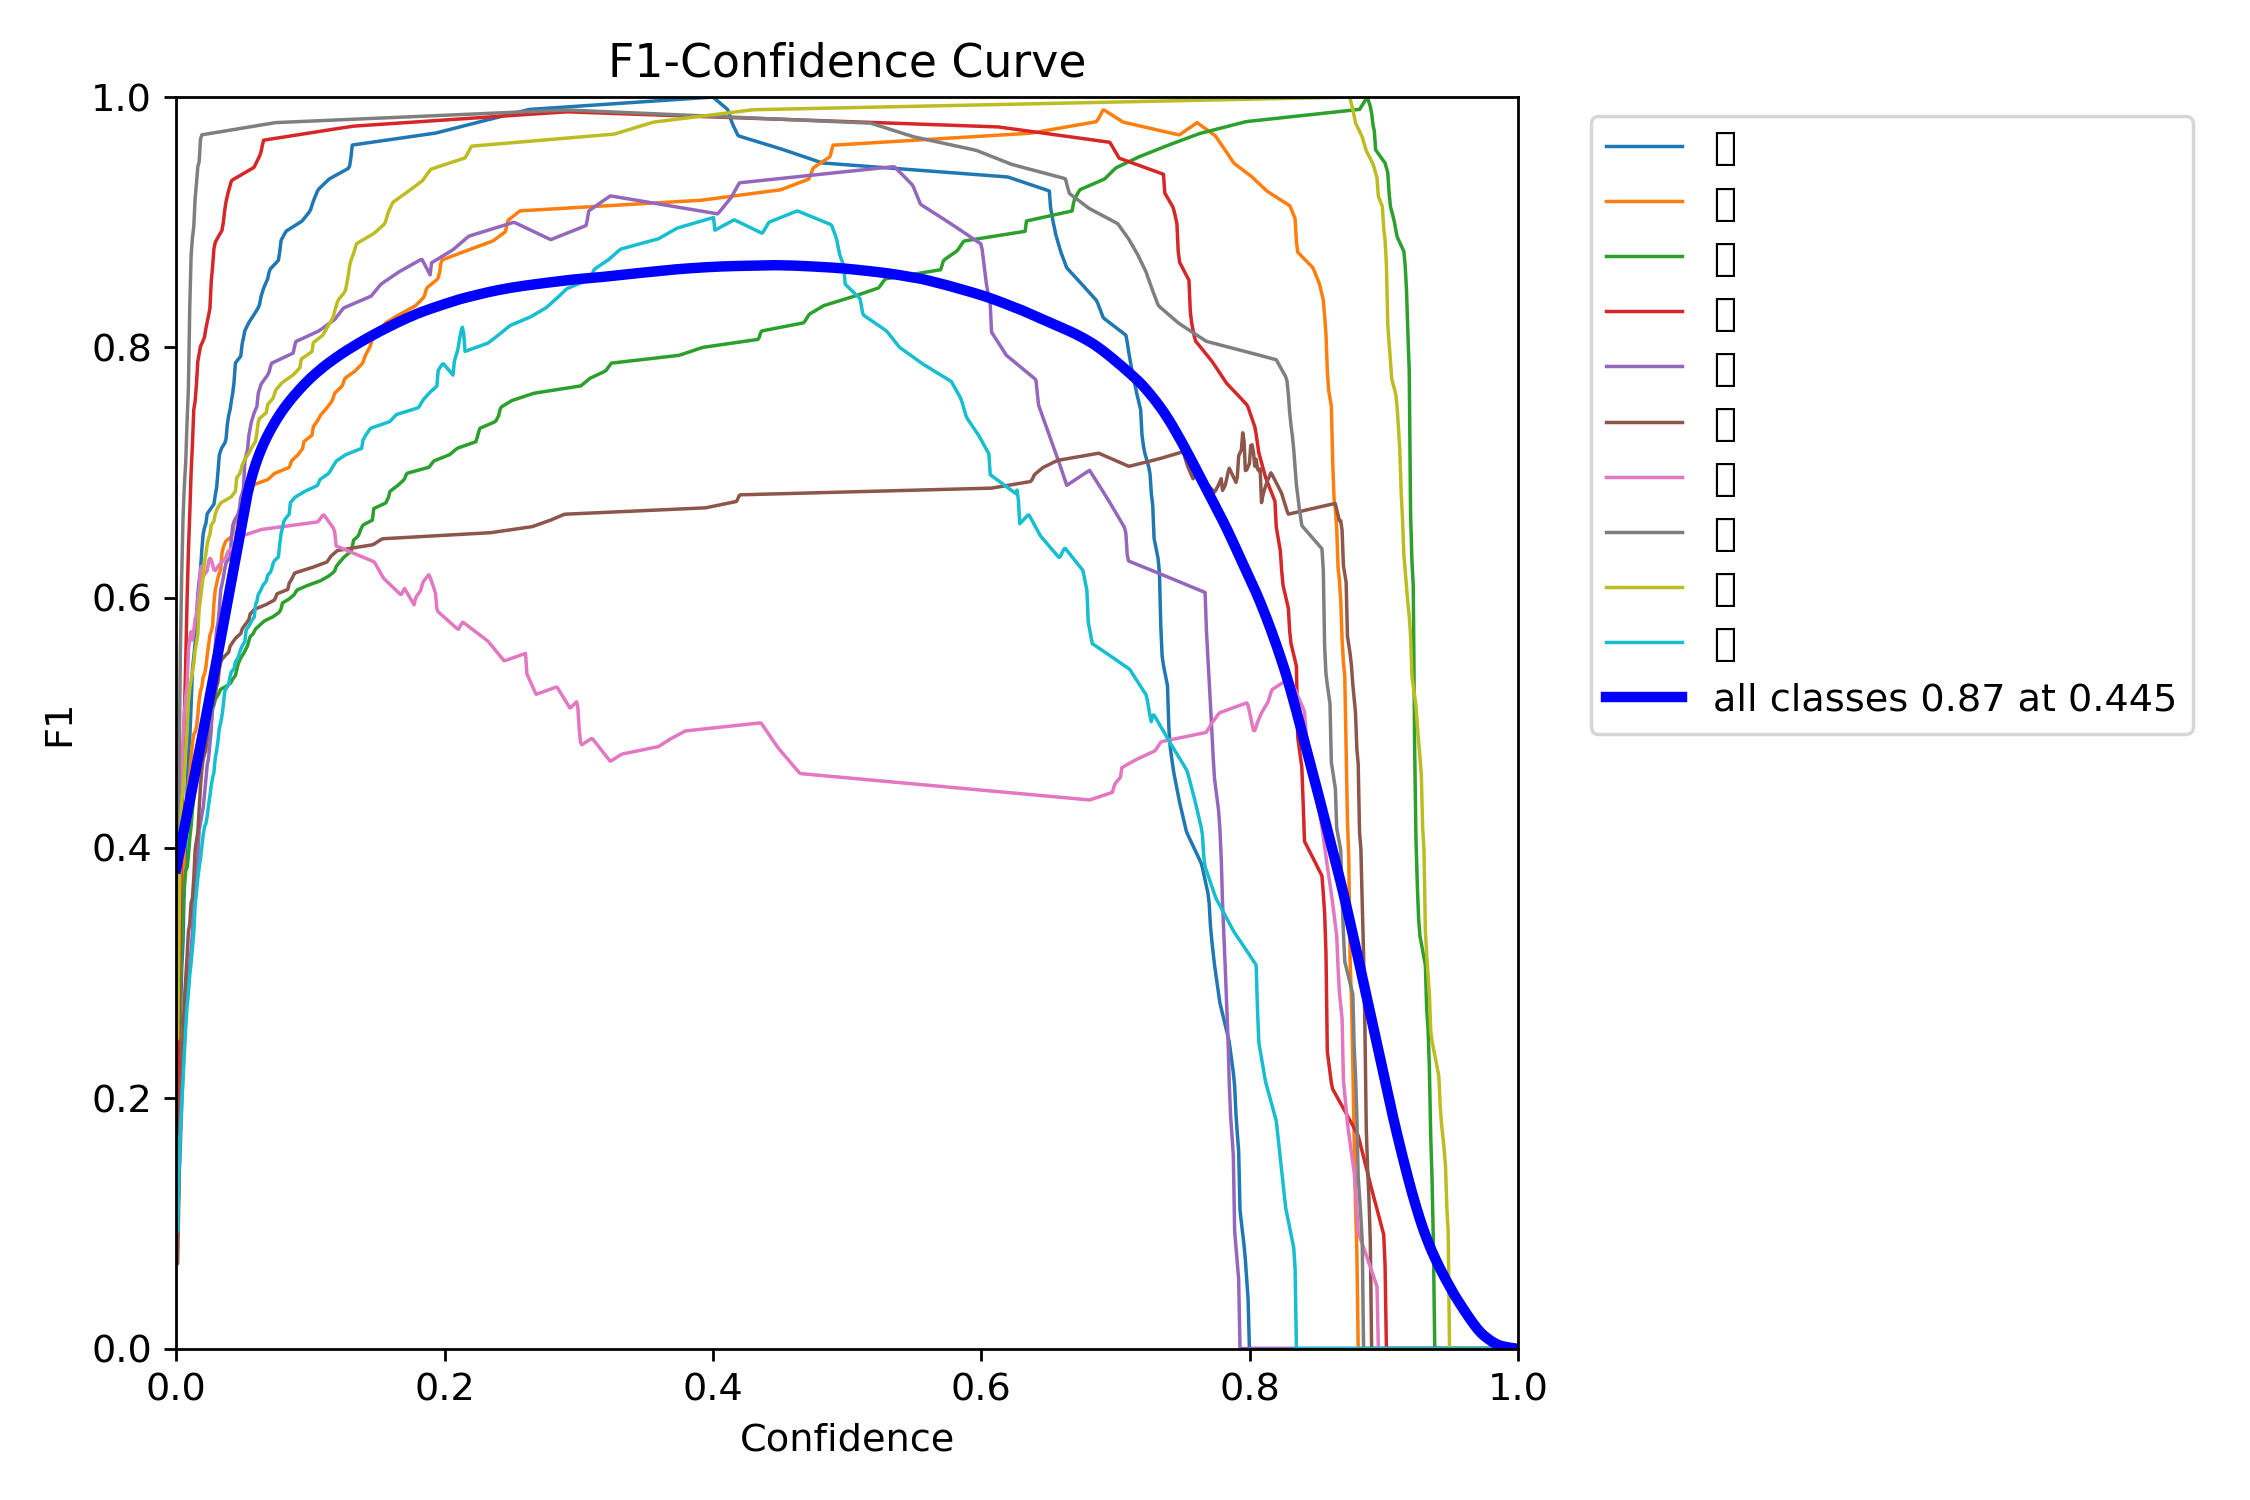

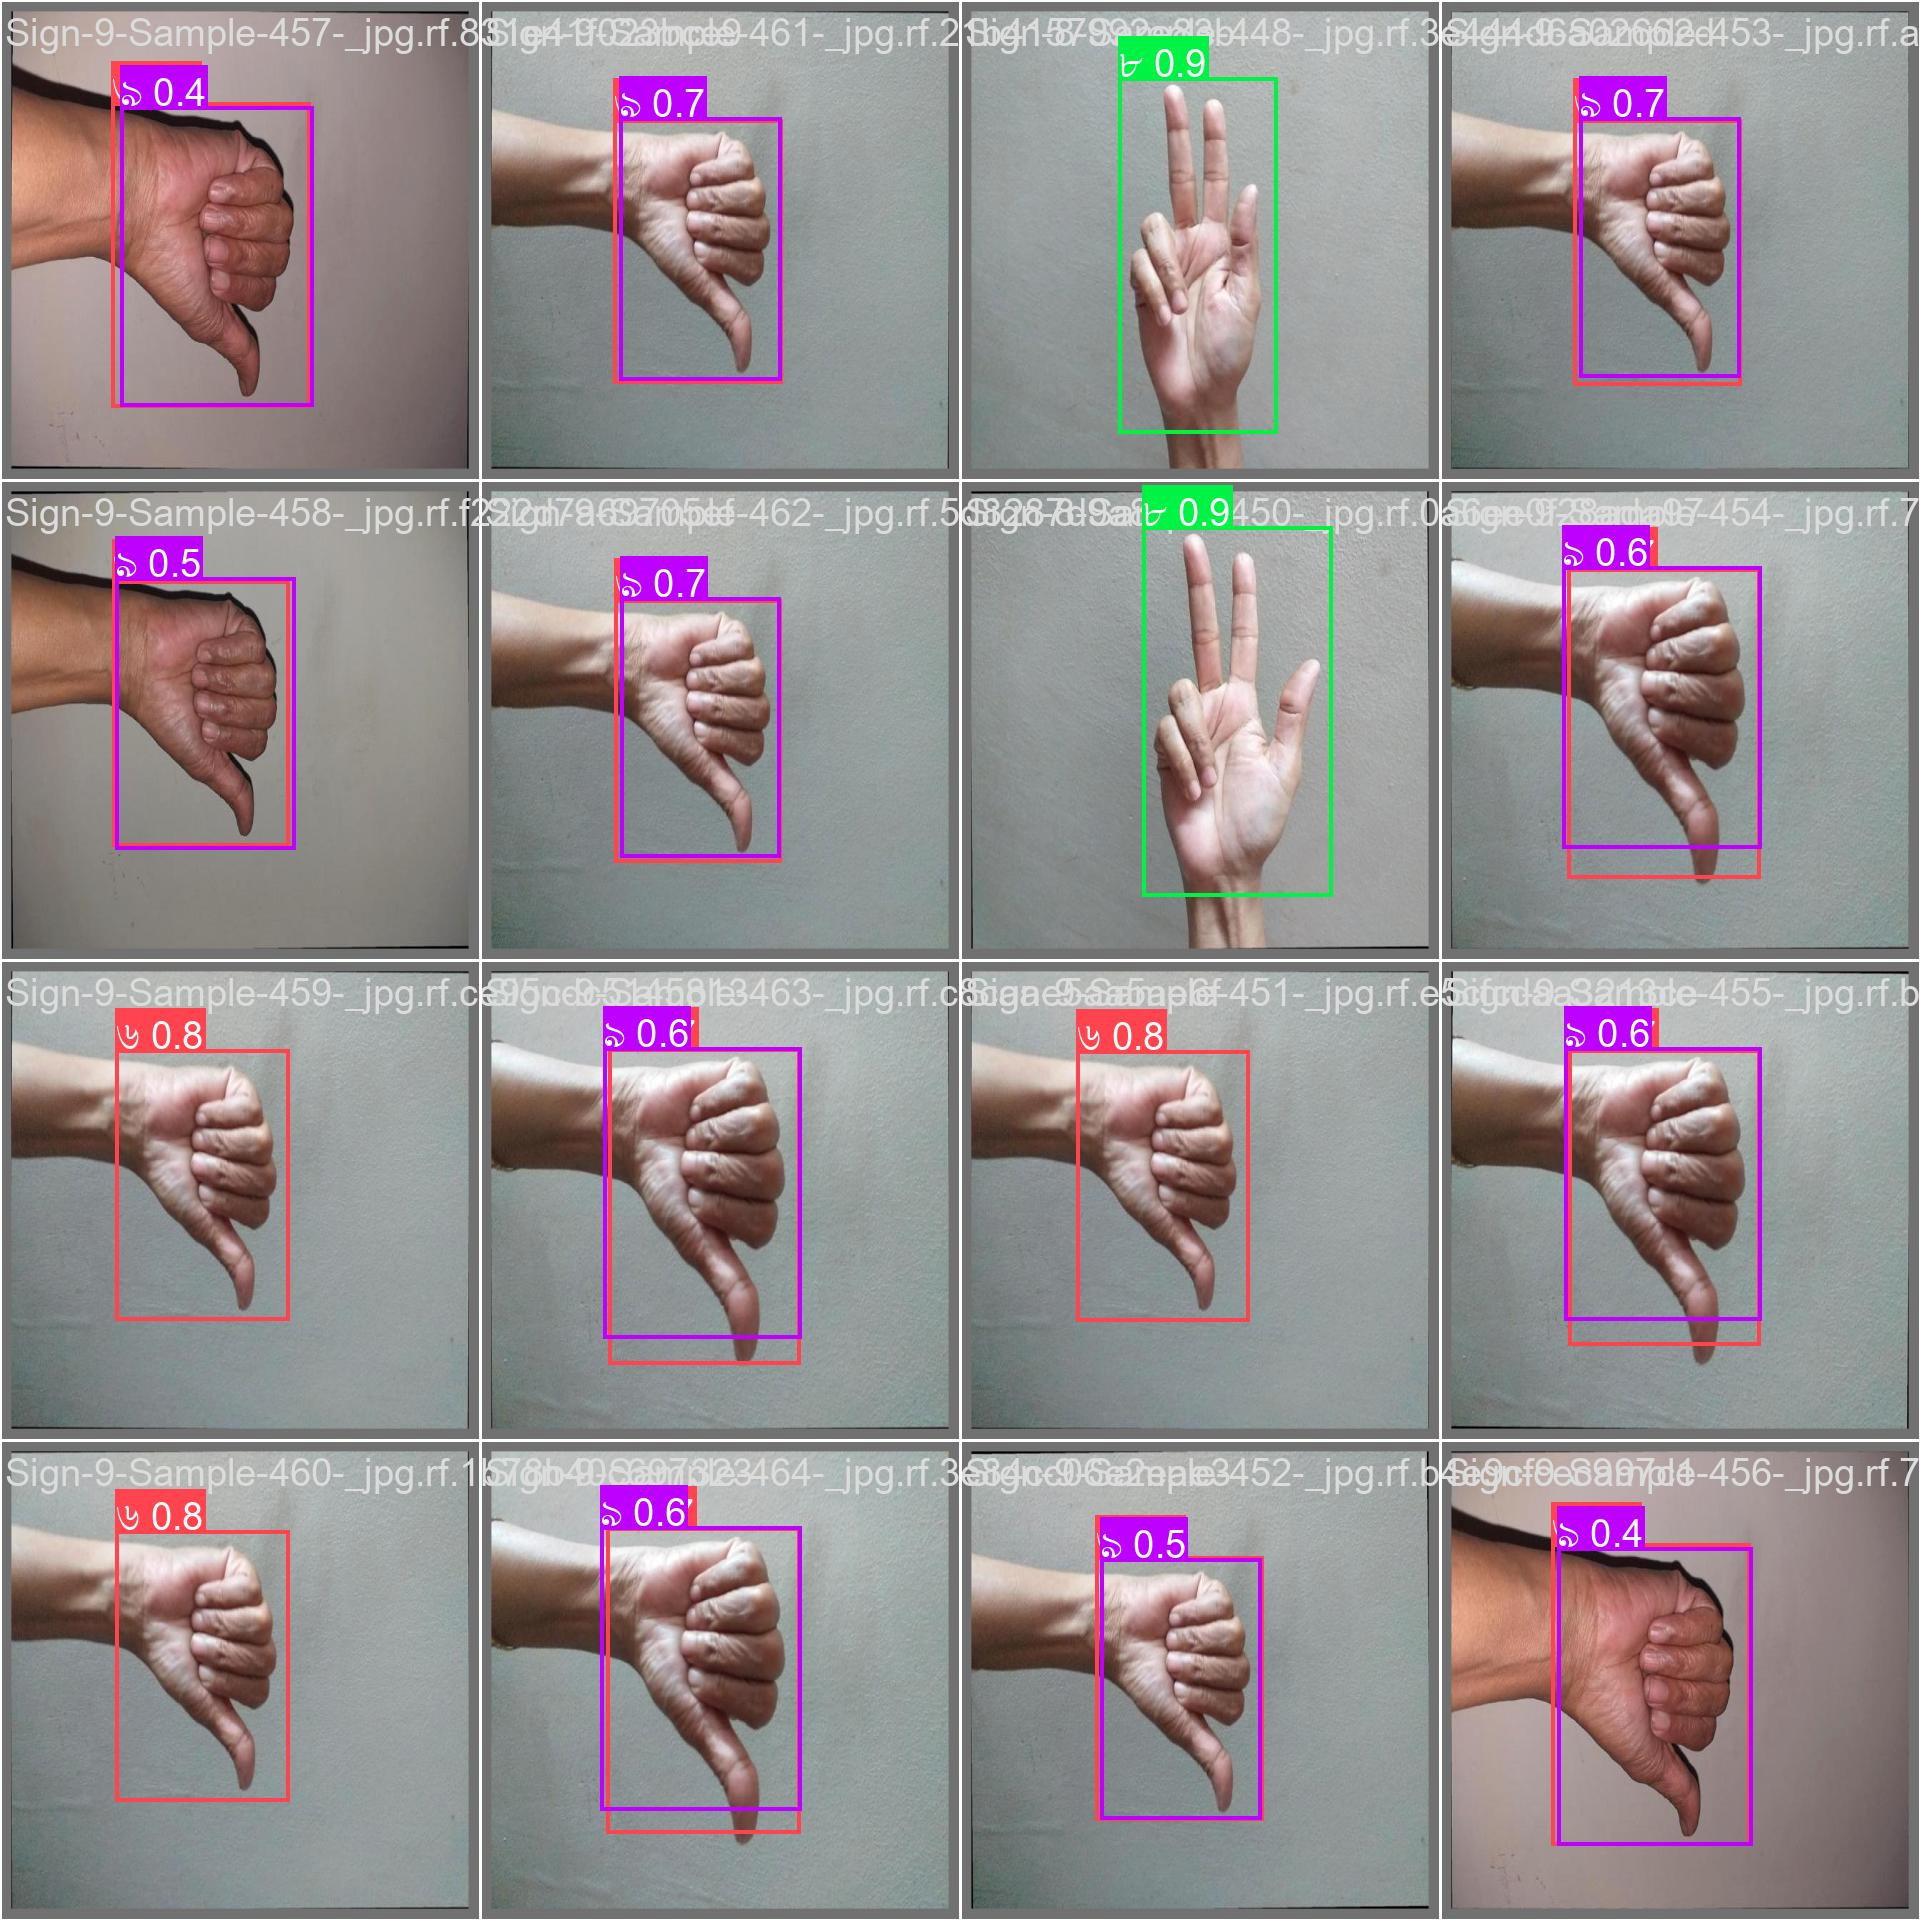

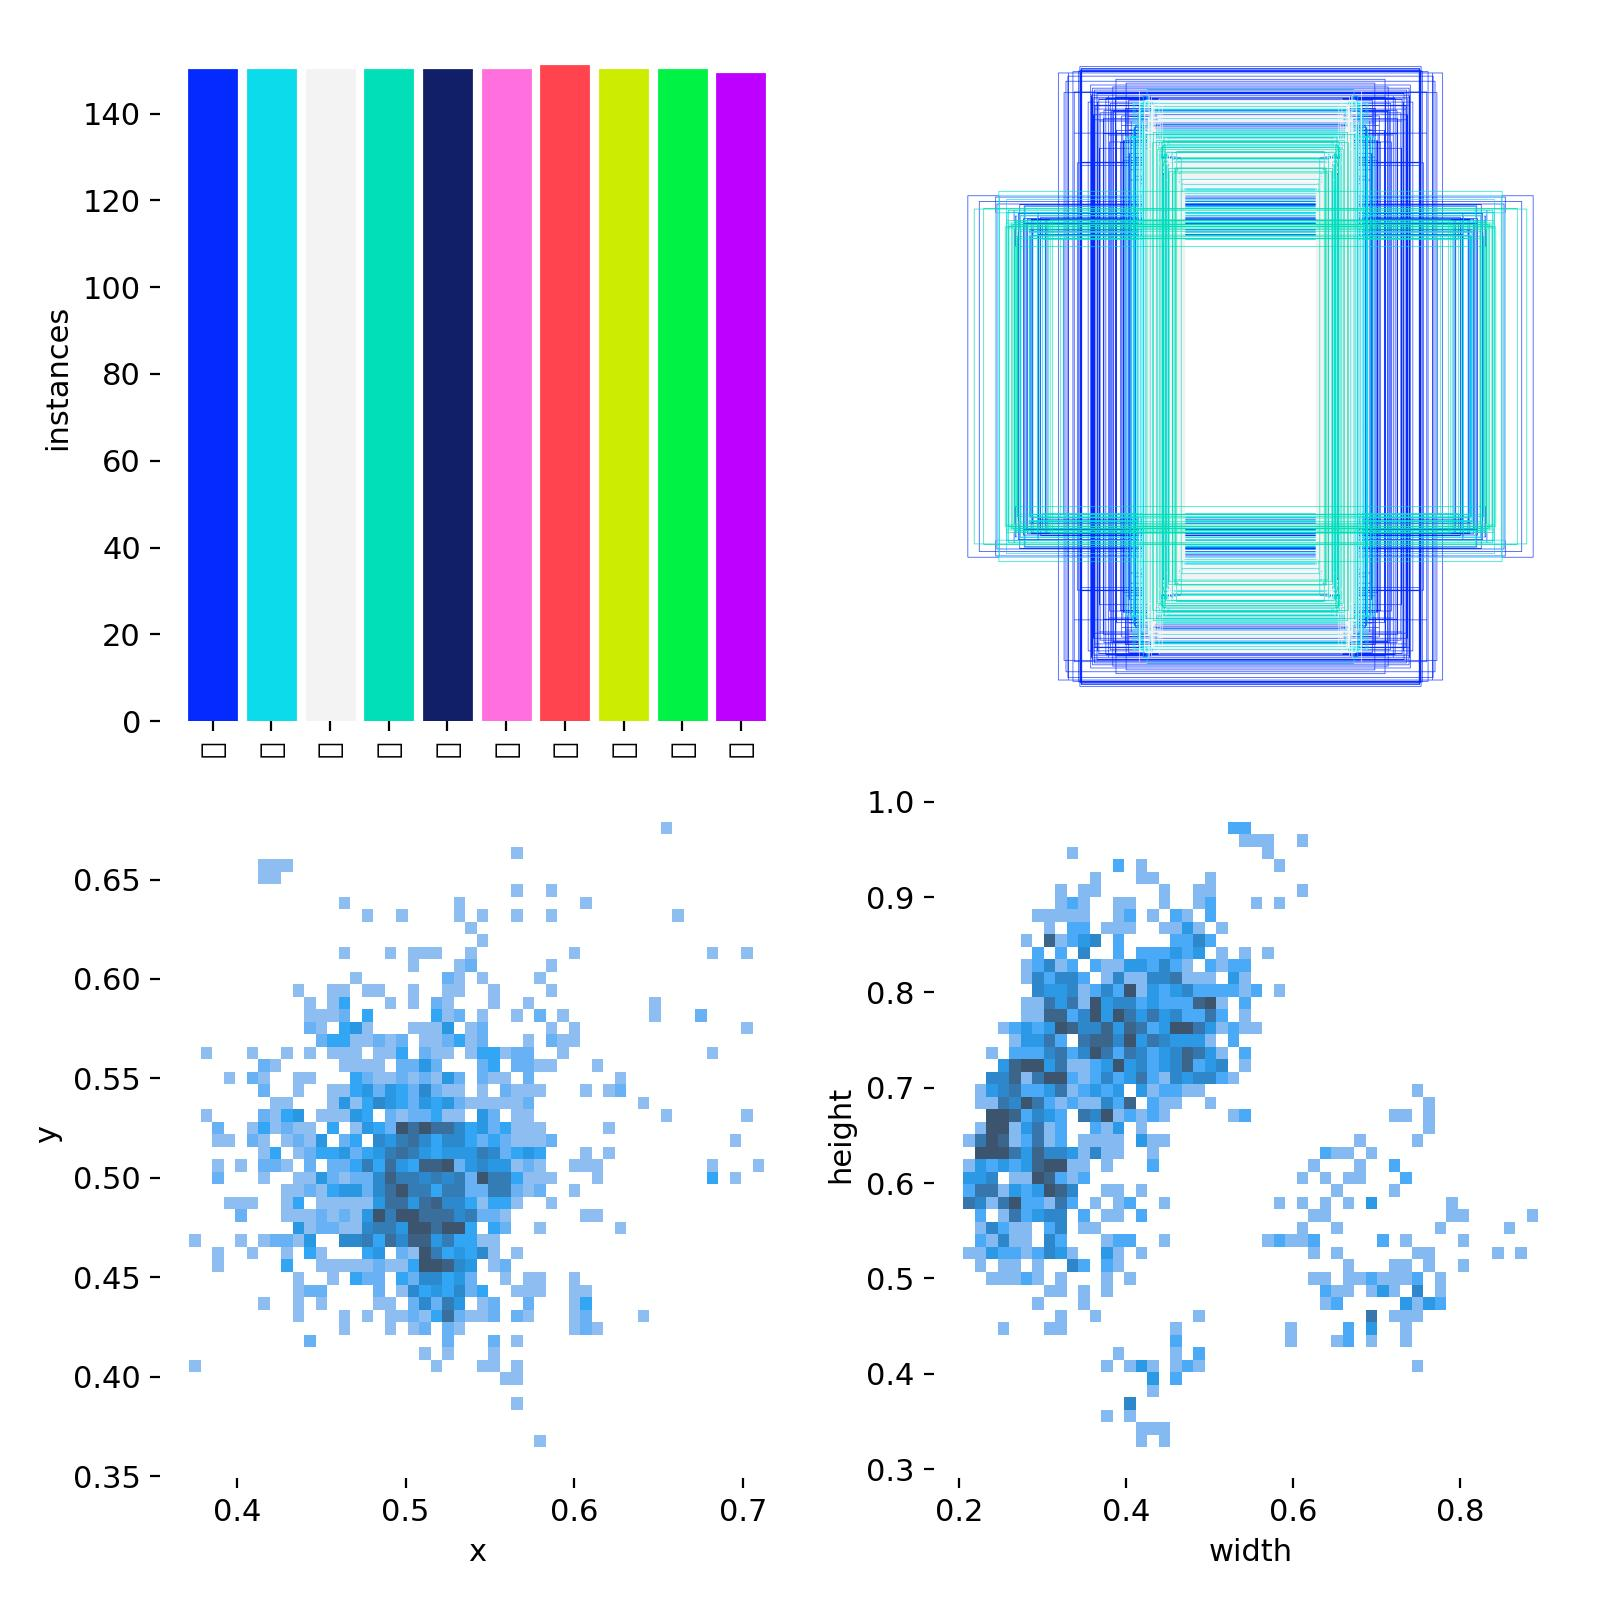

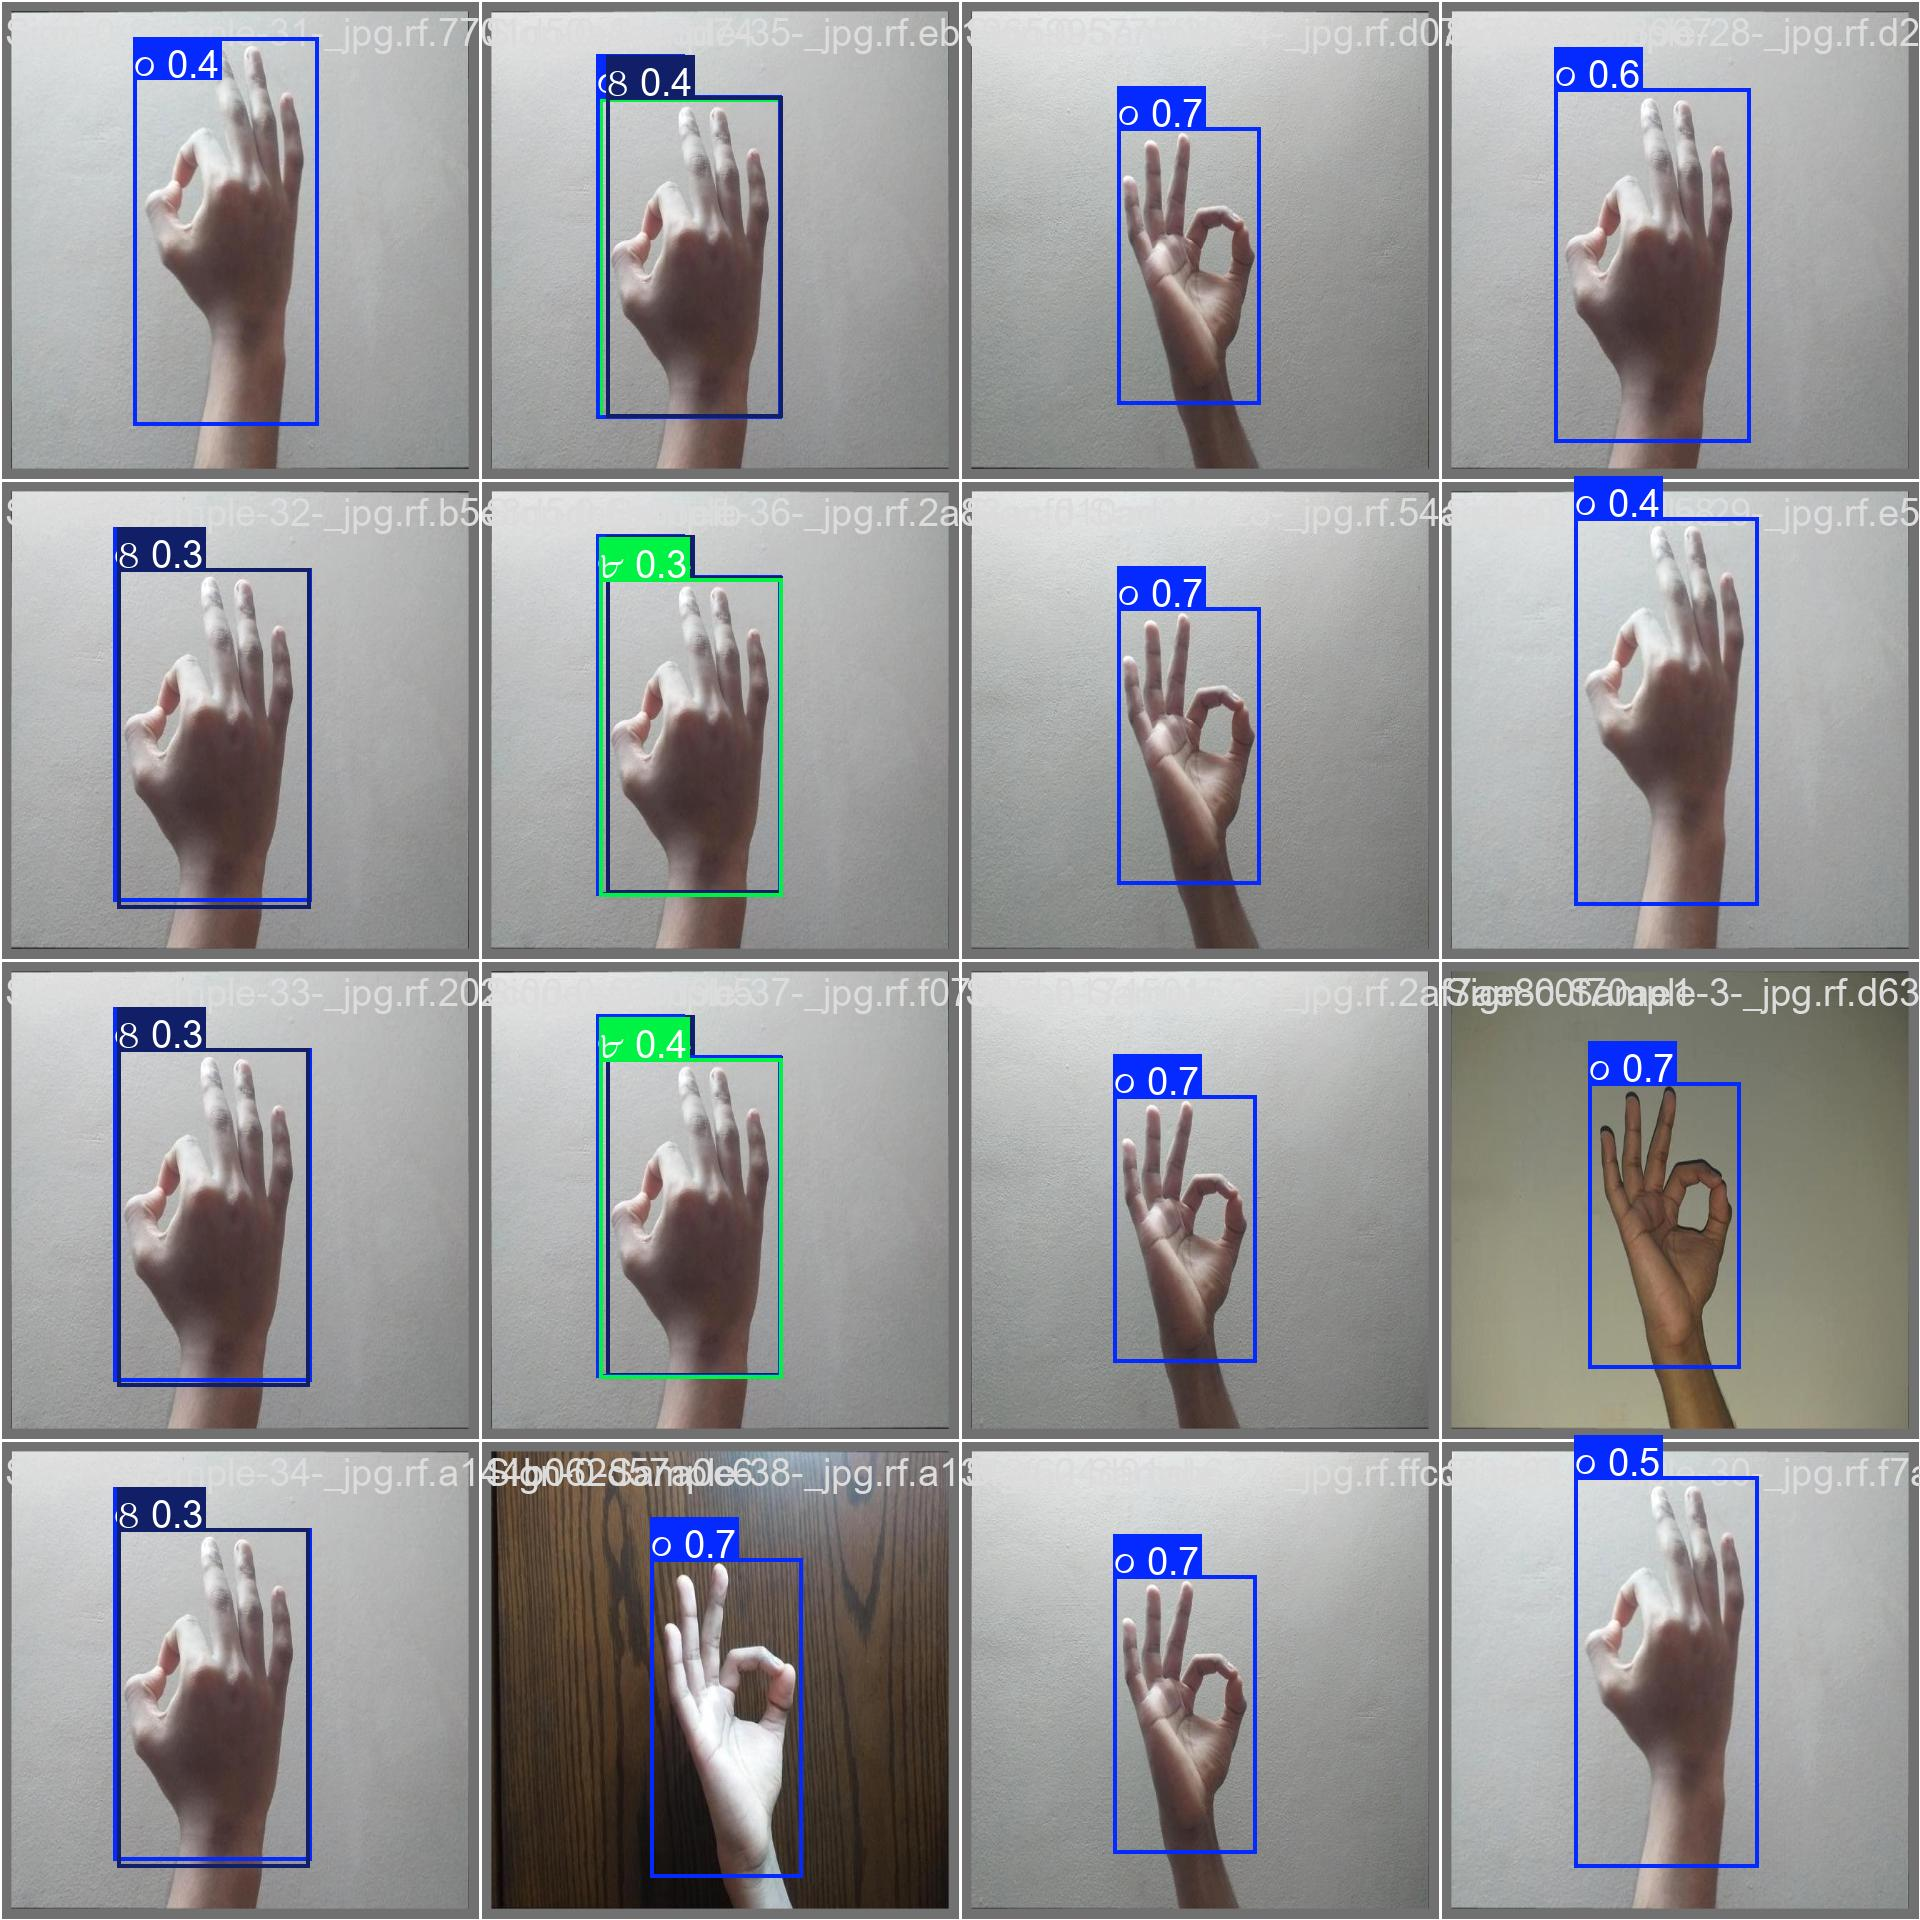

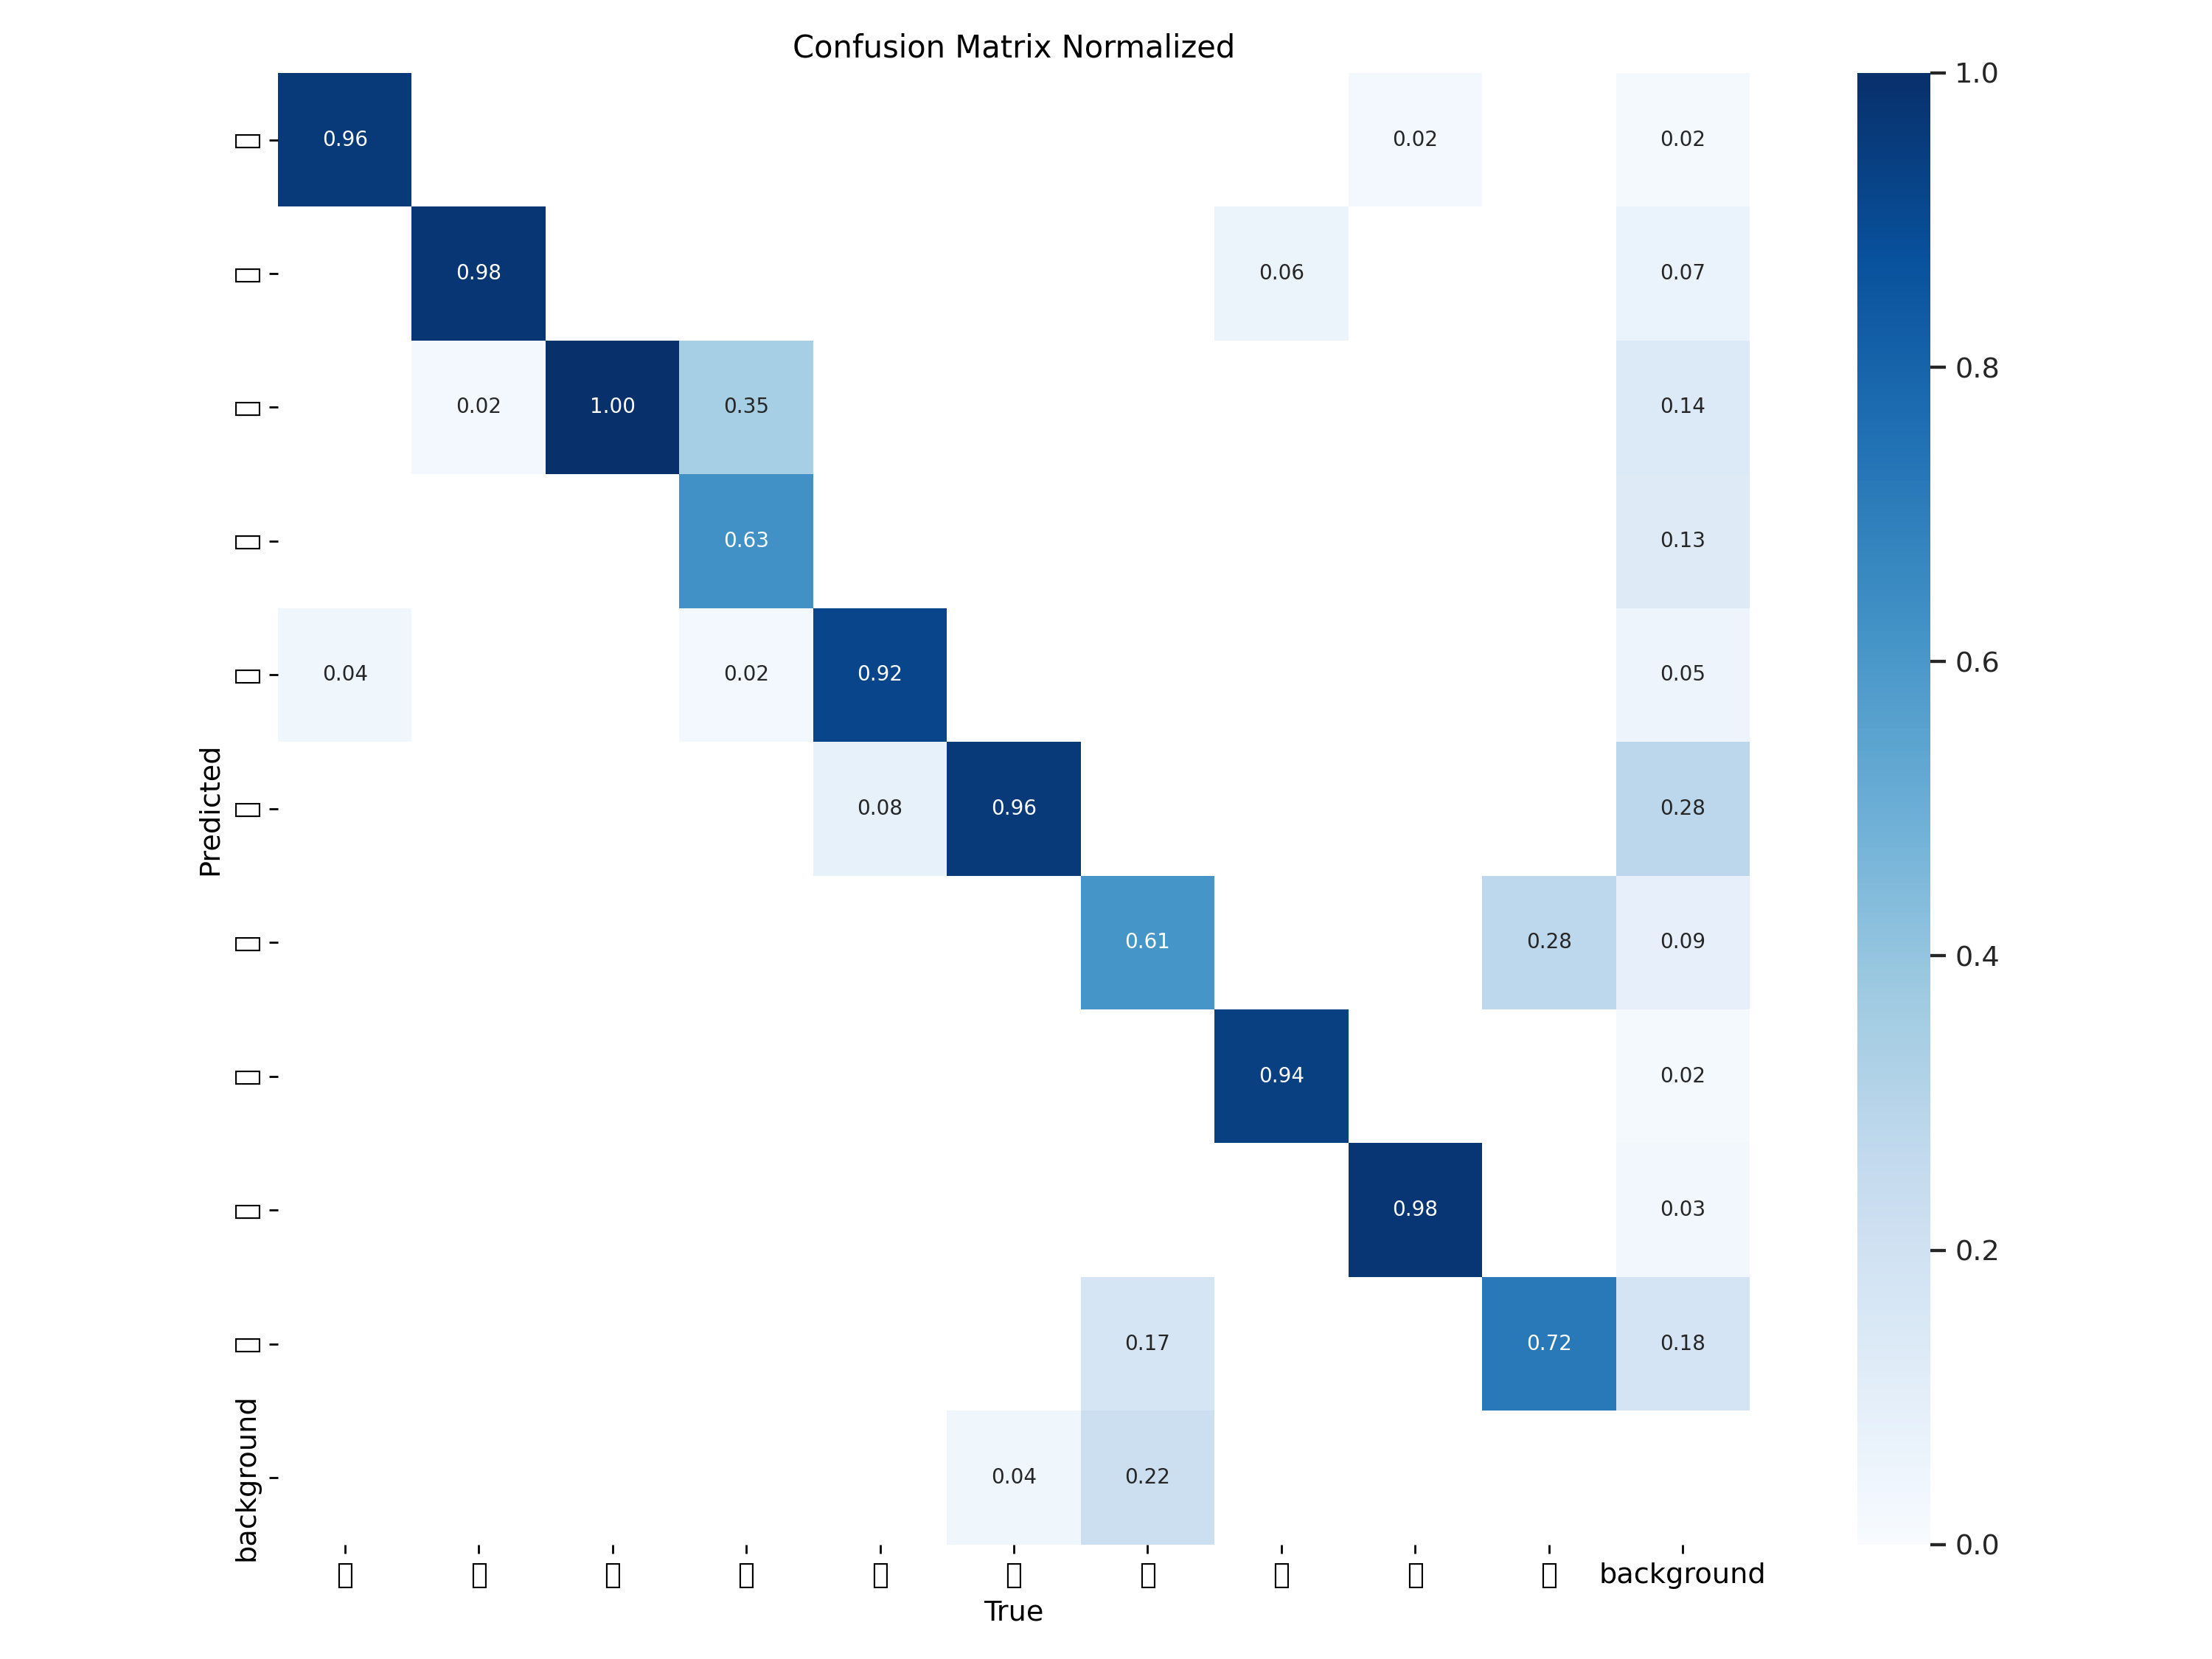

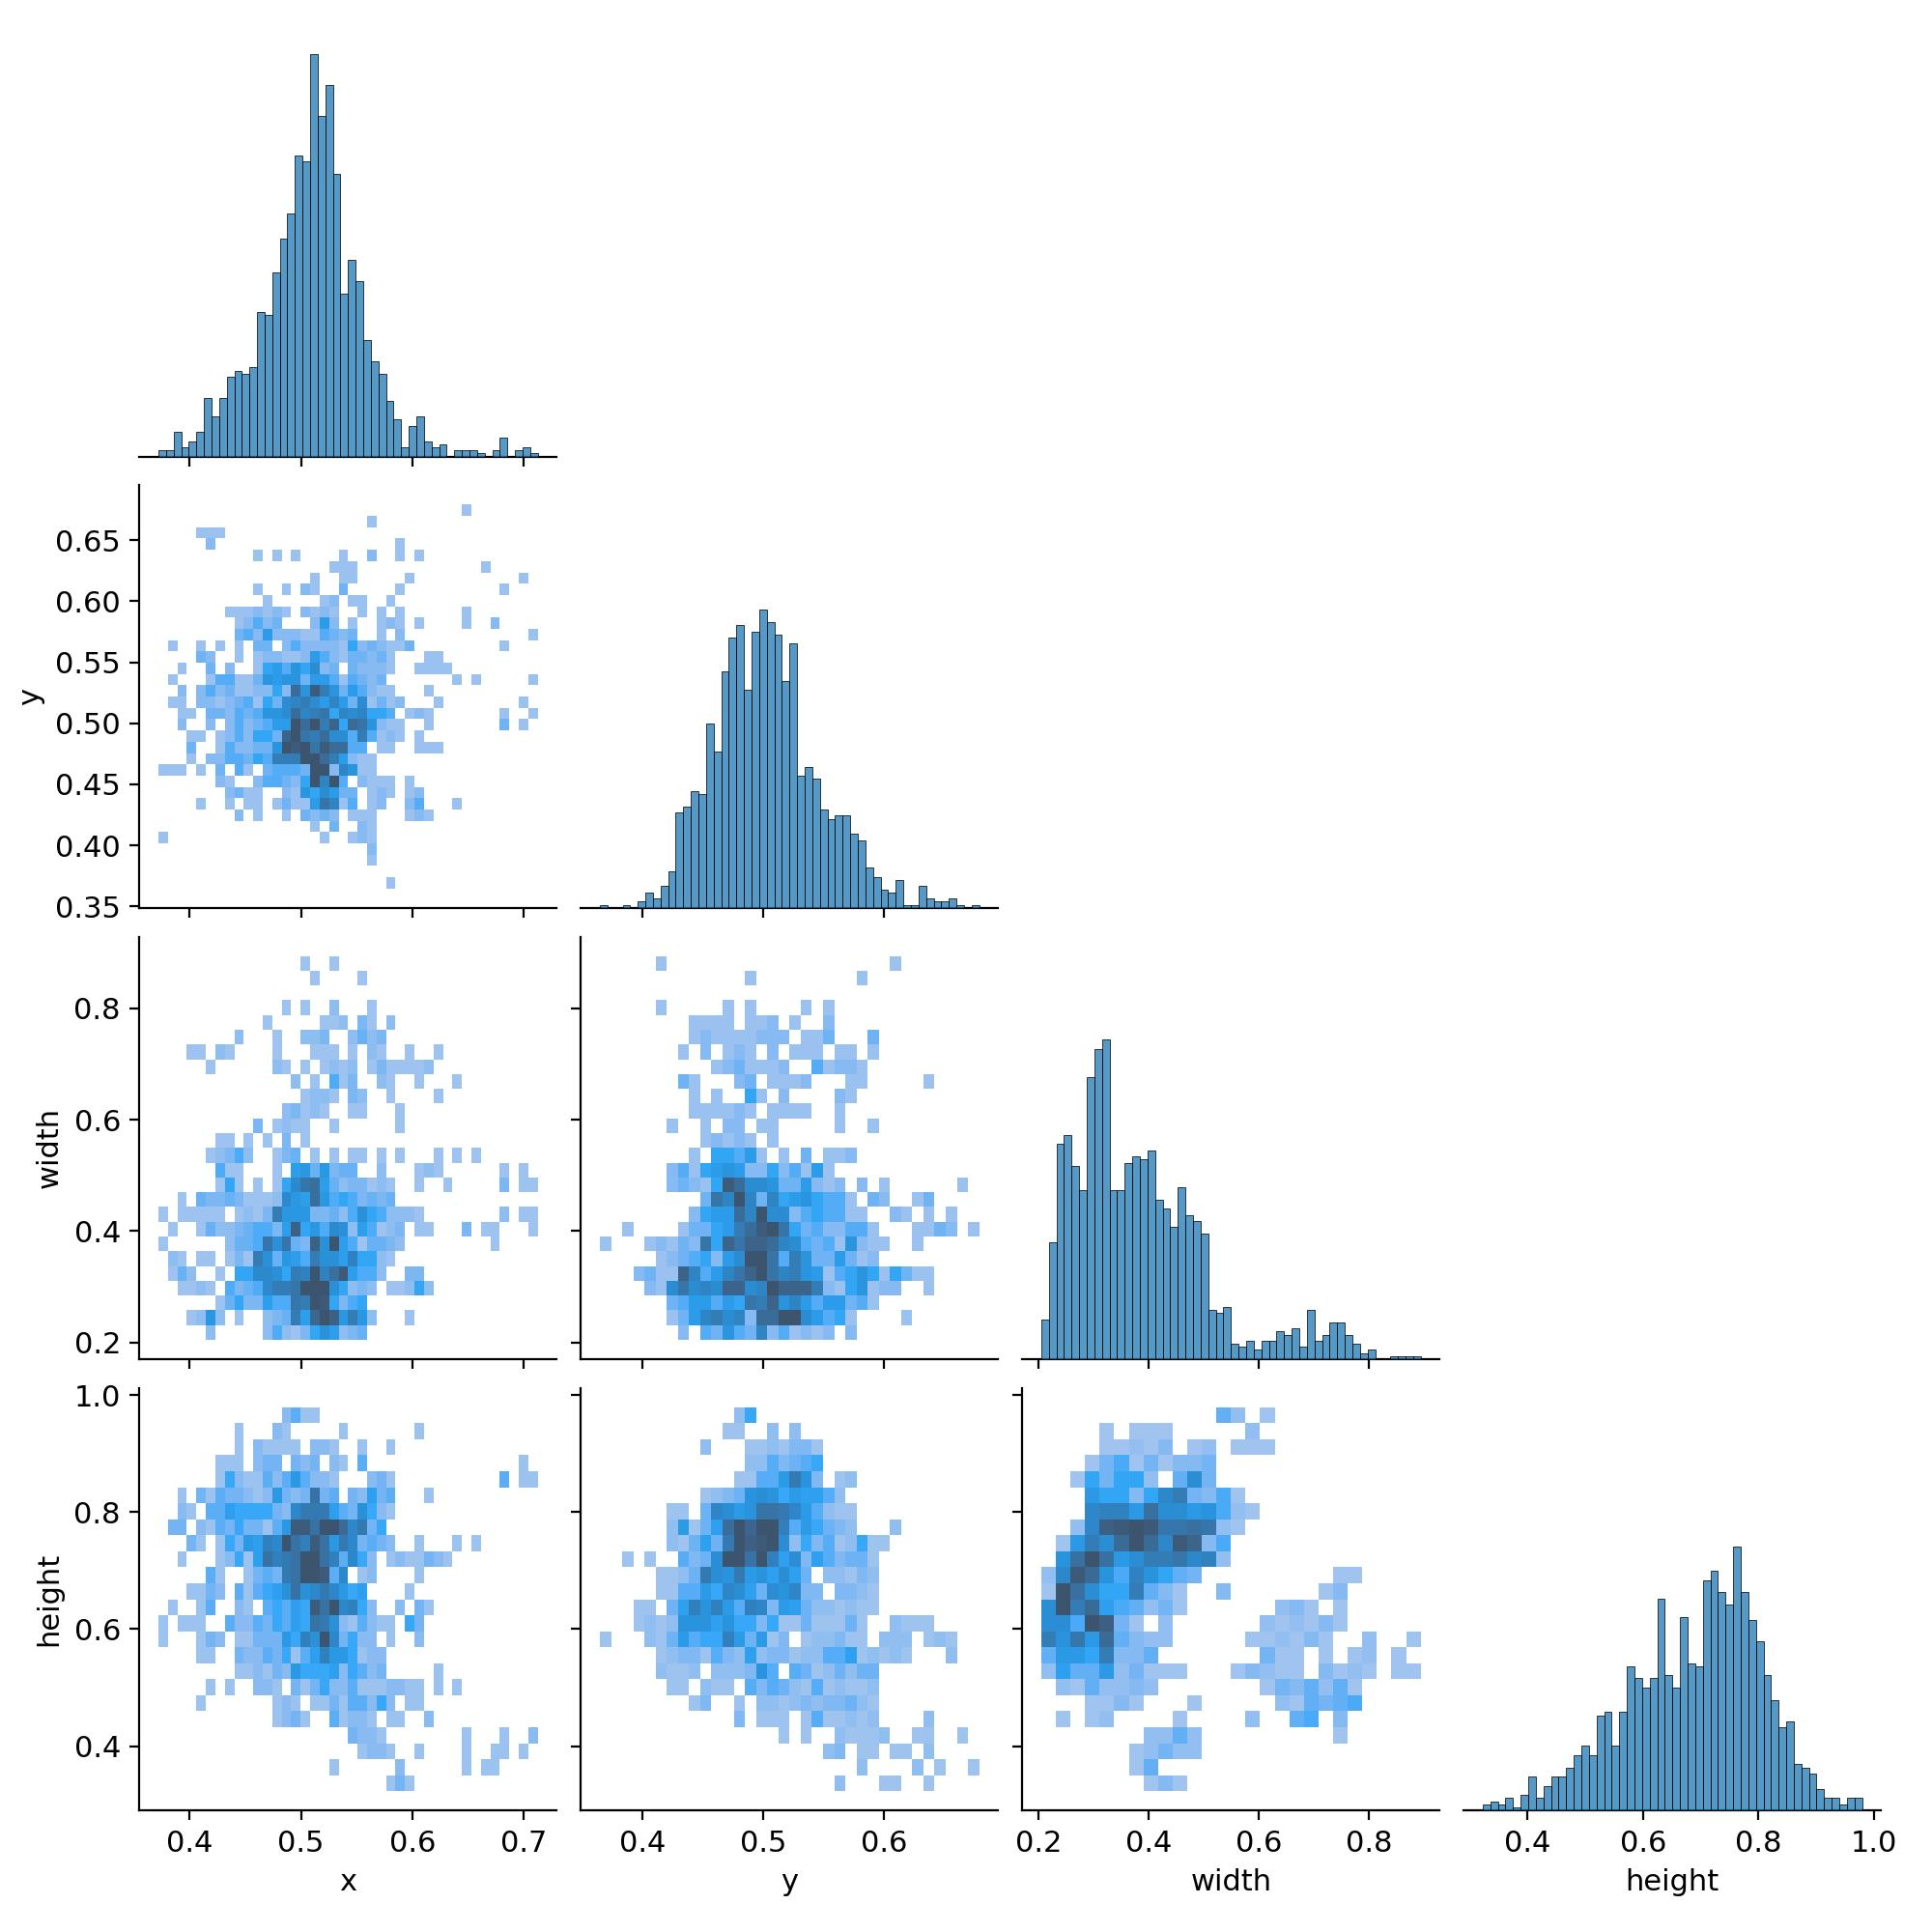

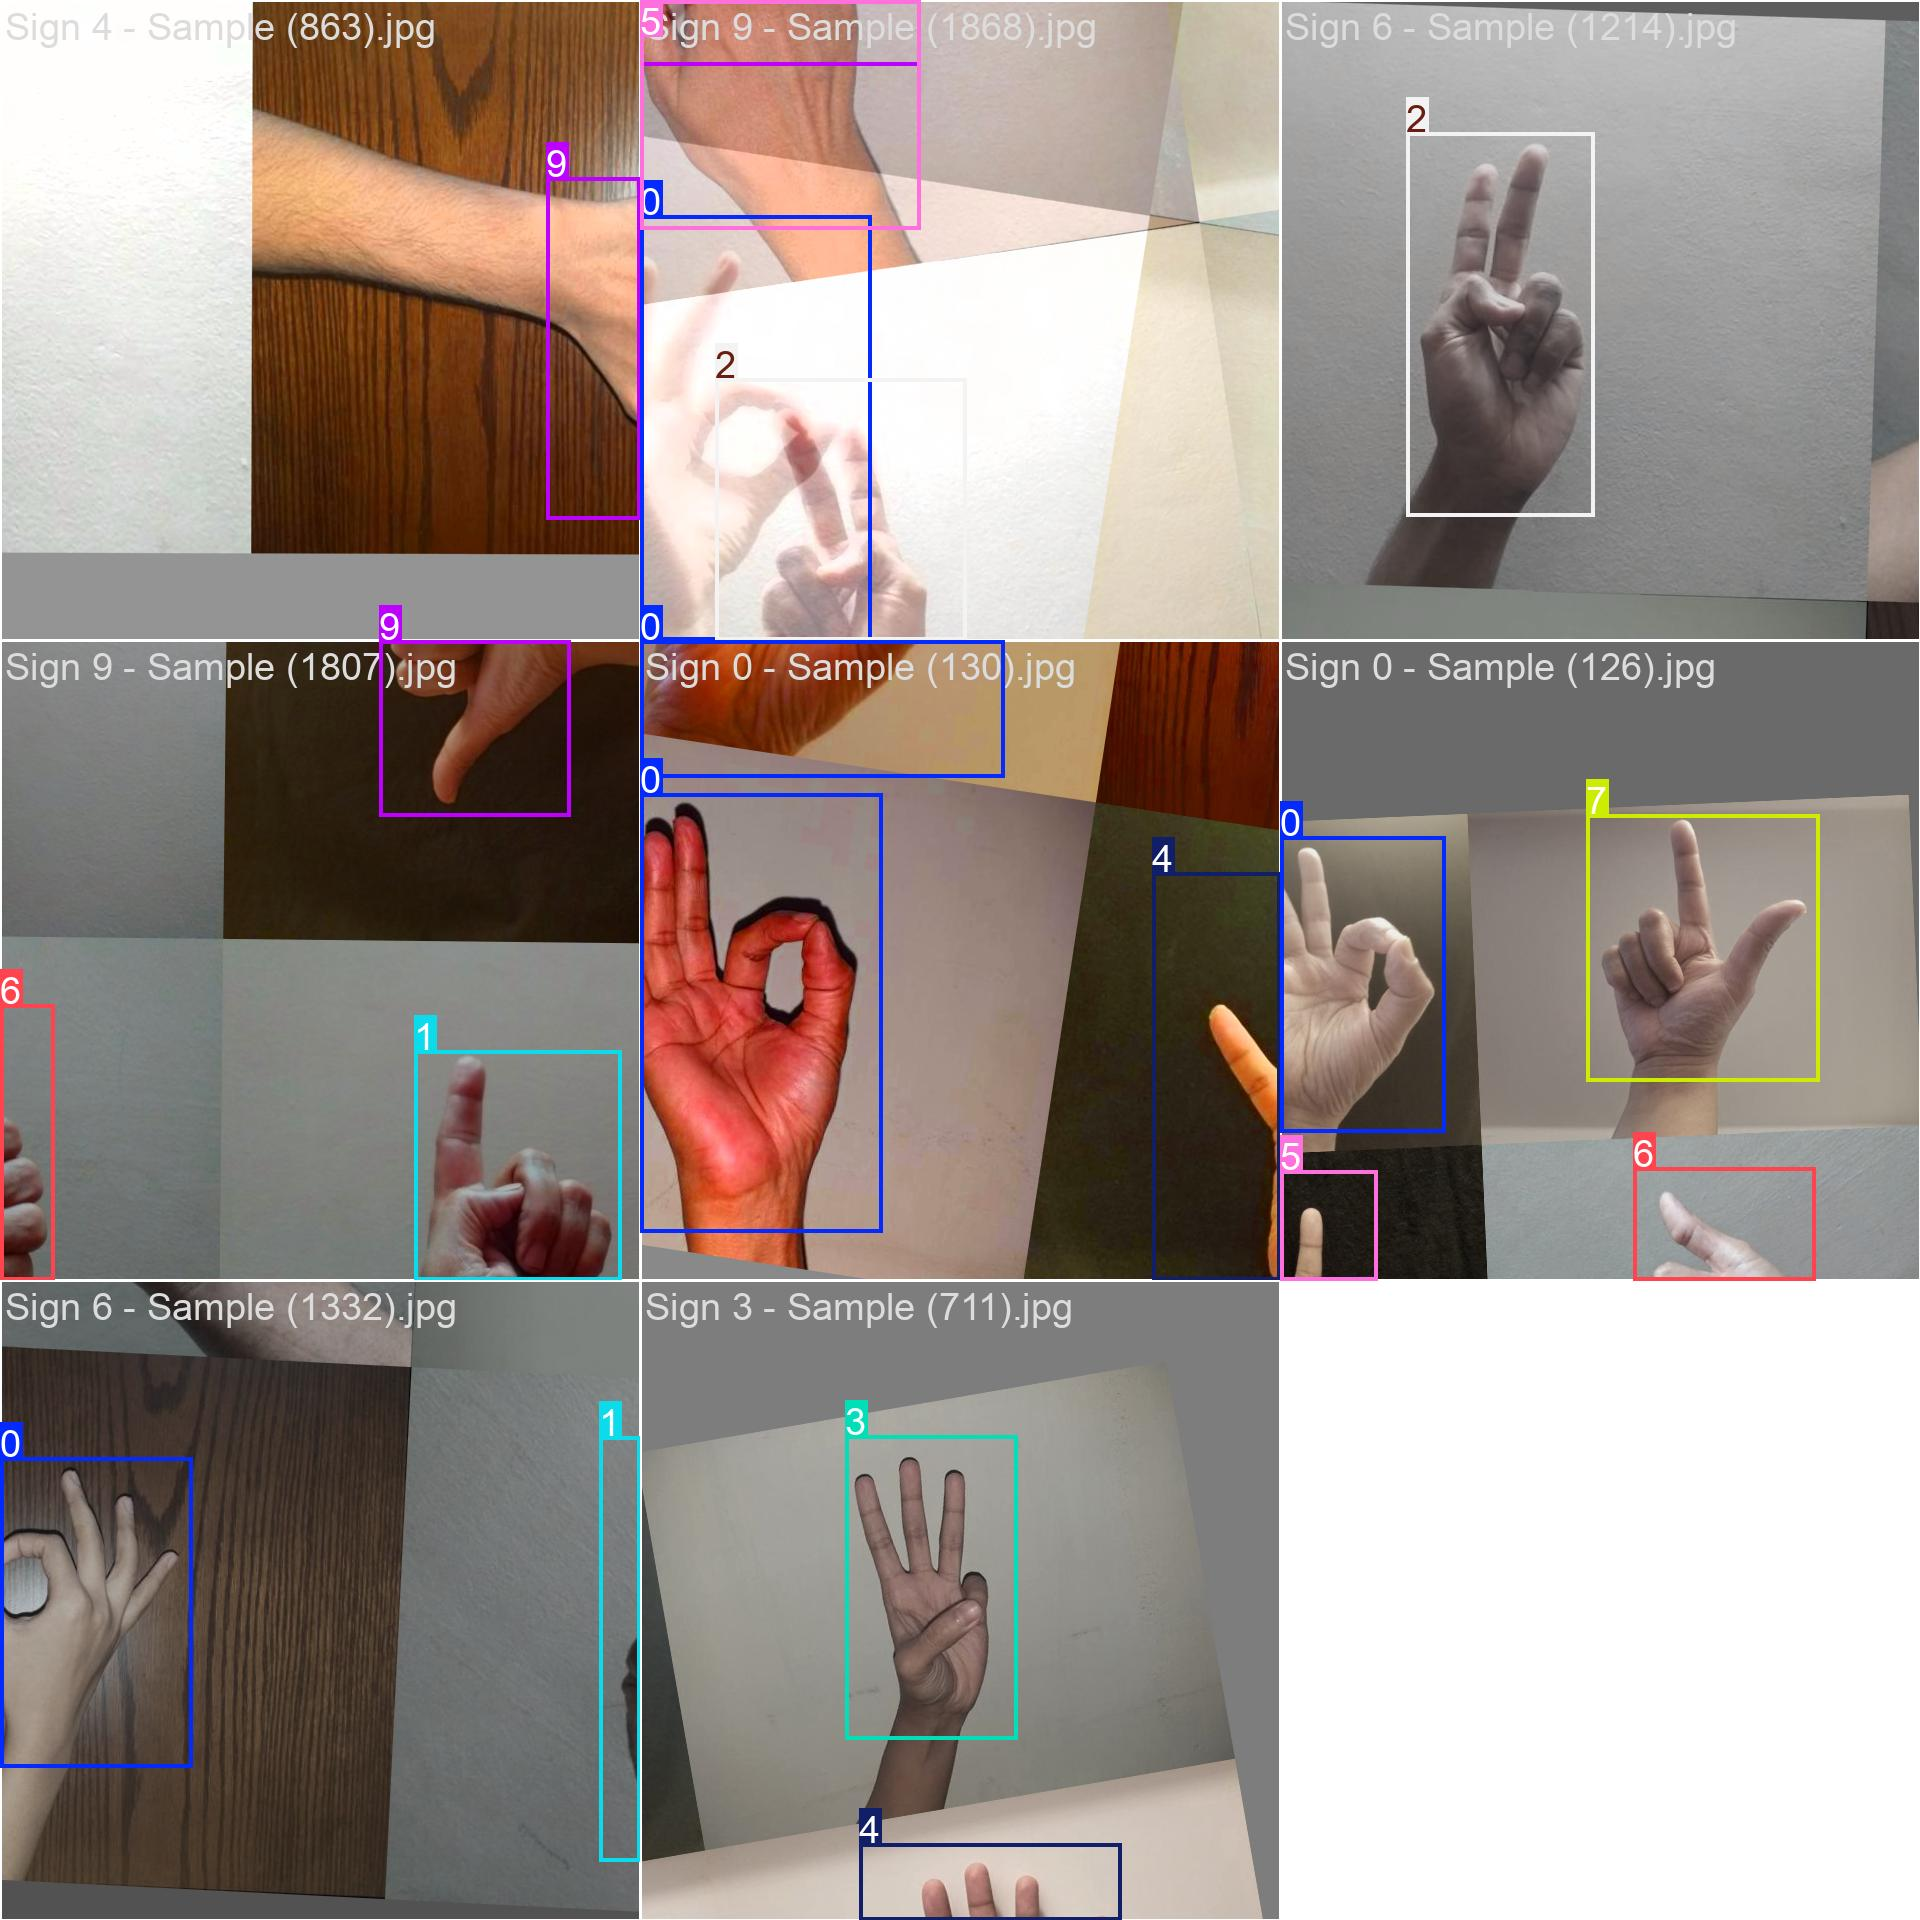

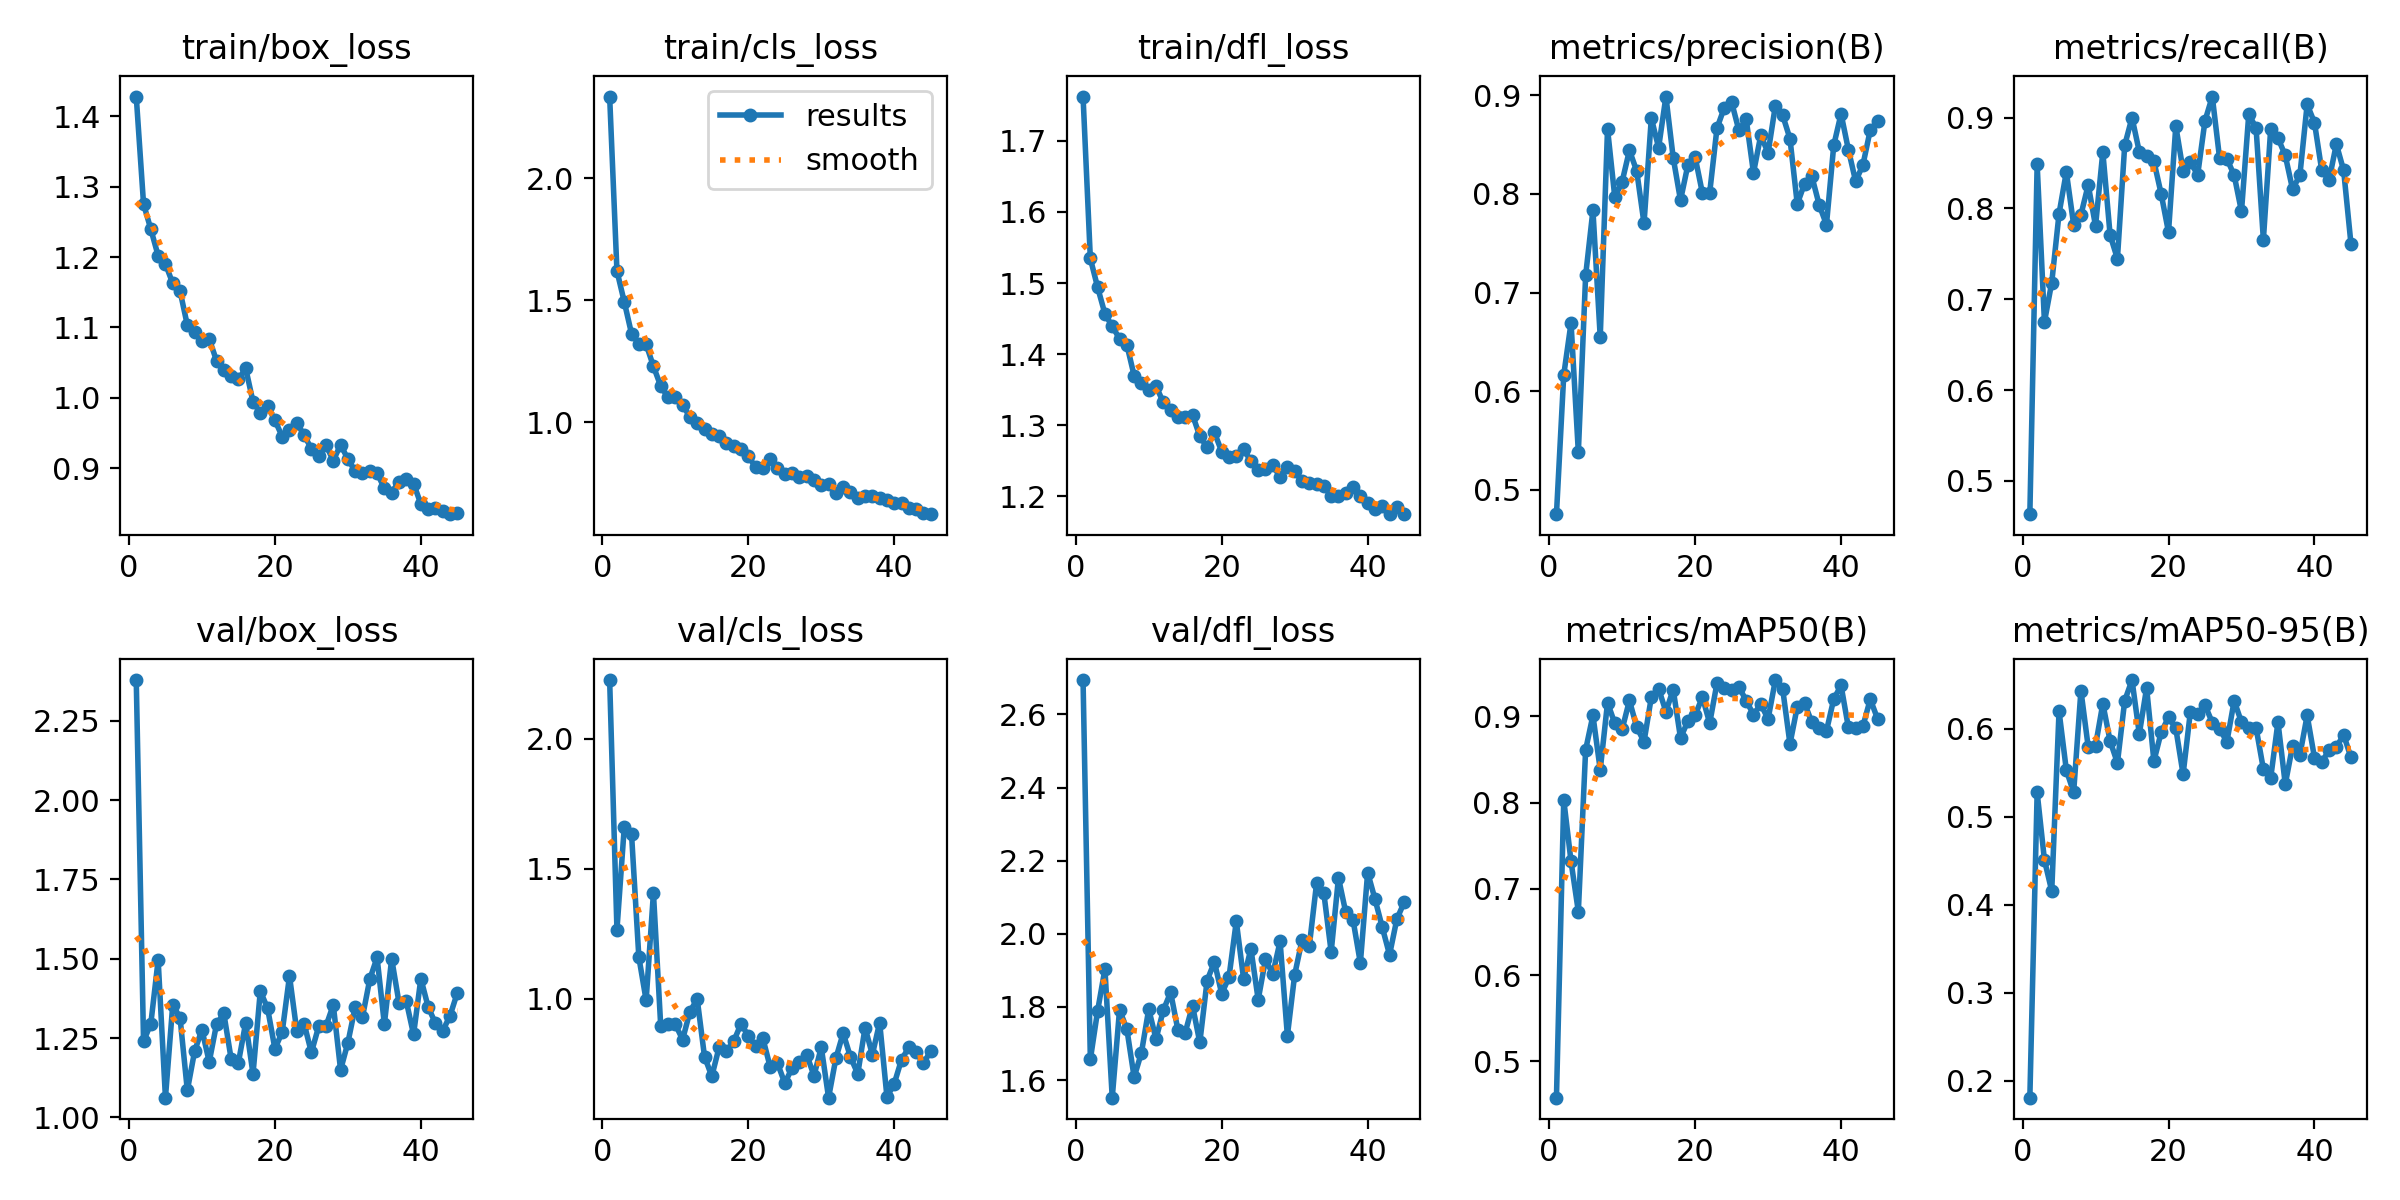

In [6]:
from IPython.display import Image, display
import os

path = '/kaggle/working/runs/detect/bengali_digit_training'
image = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

for i in range(len(image)):
    display(Image(filename=os.path.join(path, image[i])))

In [7]:
model = YOLO("/kaggle/working/runs/detect/bengali_digit_training/weights/best.pt")

# Run validation and get results
results = model.val()

# Overall metrics
print("Overall Model Performance:")
print(f"mAP50: {results.box.map50 * 100:.2f}%")
print(f"mAP50-95: {results.box.map * 100:.2f}%")
print(f"Overall Precision: {results.box.mp * 100:.2f}%")
print(f"Overall Recall: {results.box.mr * 100:.2f}%")

Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 72.8±21.9 MB/s, size: 28.7 KB)


val: Scanning /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid/labels... 468 images, 0 backgrounds, 0 corrupt: 100%|██████████| 468/468 [00:00<00:00, 1072.28it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]


                   all        468        469      0.849      0.905      0.936      0.656
                     ০         50         50          1      0.925      0.995      0.715
                     ১         50         50       0.86          1      0.994      0.651
                     ২         50         50      0.687          1      0.995      0.676
                     ৩         43         43          1      0.966      0.976      0.698
                     ৪         37         37       0.95      0.919      0.972      0.663
                     ৫         50         50      0.568       0.92      0.822      0.484
                     ৬         40         41      0.539      0.457      0.693      0.396
                     ৭         49         49          1      0.966      0.984      0.791
                     ৮         49         49      0.981          1      0.995      0.826
                     ৯         50         50      0.901        0.9      0.932      0.657


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.8ms preprocess, 13.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2
Overall Model Performance:
mAP50: 93.58%
mAP50-95: 65.58%
Overall Precision: 84.86%
Overall Recall: 90.53%


In [8]:
class_accuracy = {}
for i, class_name in enumerate(model.names.values()):
    precision, recall, map50, map5095 = results.box.class_result(i)
    class_accuracy[class_name] = {
        'Precision': precision * 100,
        'Recall': recall * 100,
        'mAP50': map50 * 100,
        'mAP50-95': map5095 * 100
    }

print("\nPer-class Performance:")
for class_name, metrics in class_accuracy.items():
    print(f"\n{class_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}%")


Per-class Performance:

০:
Precision: 100.00%
Recall: 92.52%
mAP50: 99.50%
mAP50-95: 71.55%

১:
Precision: 86.02%
Recall: 100.00%
mAP50: 99.42%
mAP50-95: 65.11%

২:
Precision: 68.70%
Recall: 100.00%
mAP50: 99.50%
mAP50-95: 67.58%

৩:
Precision: 100.00%
Recall: 96.57%
mAP50: 97.62%
mAP50-95: 69.83%

৪:
Precision: 95.03%
Recall: 91.89%
mAP50: 97.19%
mAP50-95: 66.35%

৫:
Precision: 56.84%
Recall: 92.00%
mAP50: 82.17%
mAP50-95: 48.41%

৬:
Precision: 53.92%
Recall: 45.68%
mAP50: 69.27%
mAP50-95: 39.55%

৭:
Precision: 100.00%
Recall: 96.59%
mAP50: 98.37%
mAP50-95: 79.11%

৮:
Precision: 98.06%
Recall: 100.00%
mAP50: 99.50%
mAP50-95: 82.62%

৯:
Precision: 90.06%
Recall: 90.00%
mAP50: 93.24%
mAP50-95: 65.68%



image 1/1 /kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/images/Sign 0 - Sample (15).jpg: 480x640 1 ০, 48.6ms
Speed: 1.4ms preprocess, 48.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


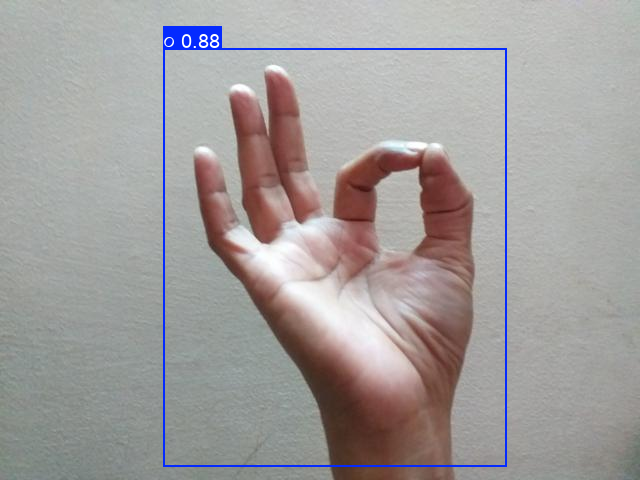

In [9]:
model = YOLO("/kaggle/working/runs/detect/bengali_digit_training/weights/best.pt")

results = model.predict("/kaggle/input/numerical-one-hand-sign/Data Sign lanuage/train/images/Sign 0 - Sample (15).jpg")

results[0].show()

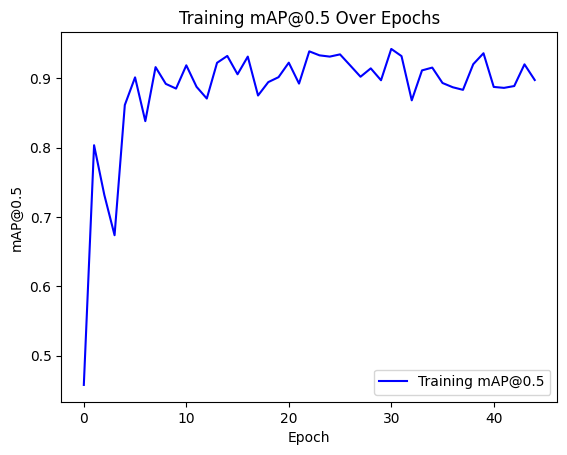

Final Training mAP@0.5: 0.8973


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

results_csv = '/kaggle/working/runs/detect/bengali_digit_training/results.csv'
df = pd.read_csv(results_csv)
df.columns = df.columns.str.strip()

# Plot training mAP@0.5
plt.plot(df['metrics/mAP50(B)'], label='Training mAP@0.5', color='blue')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('Training mAP@0.5 Over Epochs')
plt.legend()
plt.savefig('/kaggle/working/mAP_training_only.png')
plt.show()

# Final value
final_train_map = df['metrics/mAP50(B)'].iloc[-1]
print(f"Final Training mAP@0.5: {final_train_map:.4f}")


In [11]:
df_val = pd.read_csv('/kaggle/working/validation_metrics.csv')
print(df_val.columns.tolist())
print(df_val.head())


['mAP50', 'mAP50-95', 'Precision', 'Recall']
      mAP50  mAP50-95                                          Precision  \
0  0.904764  0.669659  [          1      0.9434     0.72464          ...   

                                              Recall  
0  [       0.88           1           1     0.953...  


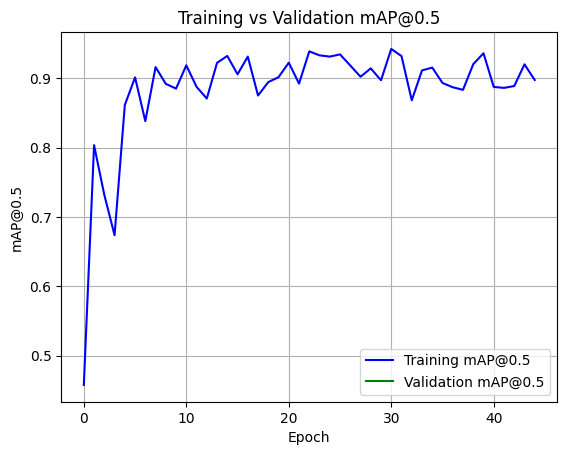

Final Training mAP@0.5: 0.8973
Final Validation mAP@0.5: 0.9048
Gap (Training - Validation): -0.0074


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training metrics
train_df = pd.read_csv('/kaggle/working/runs/detect/bengali_digit_training/results.csv')
train_df.columns = train_df.columns.str.strip()

# Load validation metrics
val_df = pd.read_csv('/kaggle/working/validation_metrics.csv')

# Extract mAP@0.5 values
train_map = train_df['metrics/mAP50(B)']
val_map = val_df['mAP50']

# Plot both
plt.plot(train_map, label='Training mAP@0.5', color='blue')
plt.plot(val_map, label='Validation mAP@0.5', color='green')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('Training vs Validation mAP@0.5')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/mAP_comparison.png')
plt.show()

# Print final metrics
print(f"Final Training mAP@0.5: {train_map.iloc[-1]:.4f}")
print(f"Final Validation mAP@0.5: {val_map.iloc[-1]:.4f}")
print(f"Gap (Training - Validation): {train_map.iloc[-1] - val_map.iloc[-1]:.4f}")


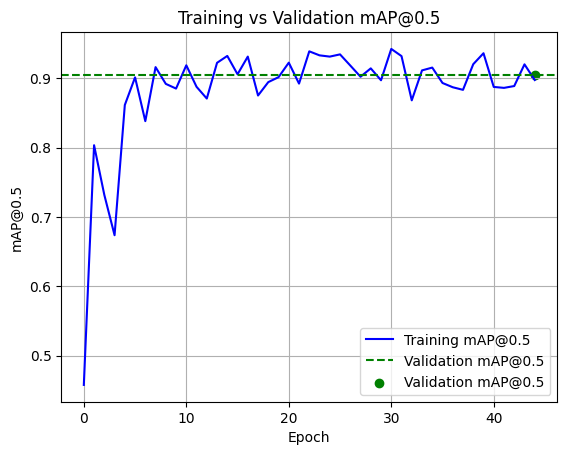

In [13]:
# Plot training mAP over epochs
plt.plot(train_map, label='Training mAP@0.5', color='blue')

# Plot single-point validation mAP as a horizontal line or point
plt.axhline(y=val_map.iloc[0], color='green', linestyle='--', label='Validation mAP@0.5')
# Or plot a single dot at the last epoch
plt.scatter(x=len(train_map)-1, y=val_map.iloc[0], color='green', label='Validation mAP@0.5')

plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('Training vs Validation mAP@0.5')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/mAP_comparison.png')
plt.show()


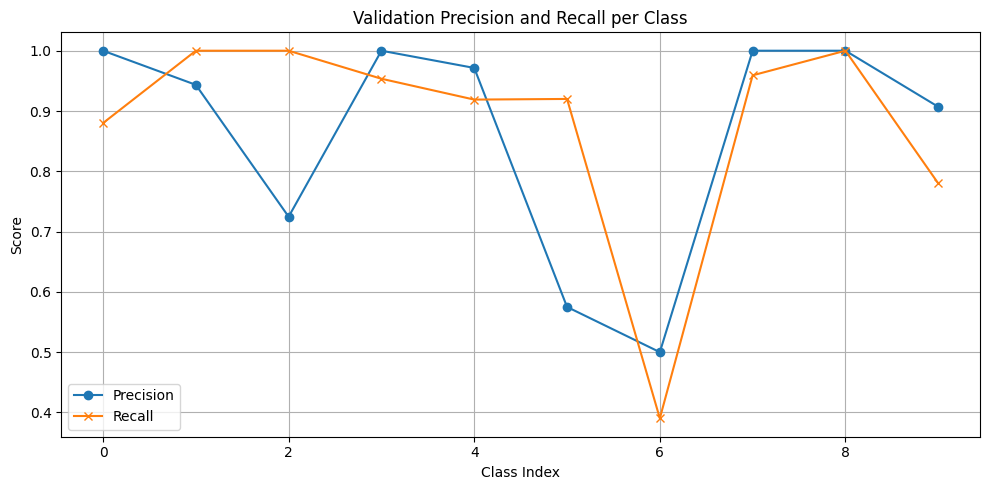

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load your CSV
df = pd.read_csv('/kaggle/working/validation_metrics.csv')

# Helper: fix malformed list string (insert commas between numbers)
def fix_list_string(s):
    # Insert comma between two numbers that have whitespace in between
    return re.sub(r'(?<=\d)\s+(?=\d)', ', ', s.strip())

# Fix and convert to lists
precision_raw = fix_list_string(df['Precision'].iloc[0])
recall_raw = fix_list_string(df['Recall'].iloc[0])

# Safely evaluate the fixed strings
precision_list = eval(precision_raw)
recall_list = eval(recall_raw)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(precision_list, label='Precision', marker='o')
plt.plot(recall_list, label='Recall', marker='x')
plt.title('Validation Precision and Recall per Class')
plt.xlabel('Class Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/kaggle/working/validation_precision_recall.png')
plt.show()


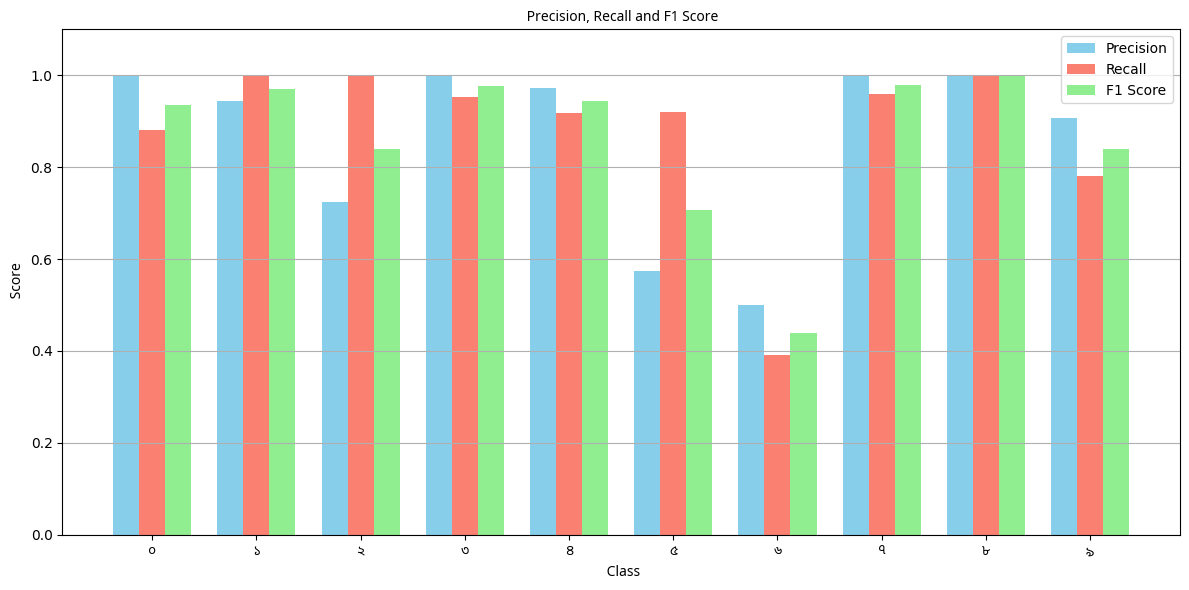

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.font_manager as fm

# Path to your Bangla font
font_path = '/kaggle/input/font-bangla/bangla font/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=font_path)

# Bengali digit labels
class_labels = ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']

# Load your CSV
df = pd.read_csv('/kaggle/working/validation_metrics.csv')

# Fix list strings if they are space-separated
def fix_list_string(s):
    return re.sub(r'(?<=\d)\s+(?=\d)', ', ', s.strip())

precision_list = eval(fix_list_string(df['Precision'].iloc[0]))
recall_list = eval(fix_list_string(df['Recall'].iloc[0]))

# Calculate F1 score
f1_scores = [2 * (p * r) / (p + r) if (p + r) else 0 for p, r in zip(precision_list, recall_list)]

# Plot settings
x = np.arange(len(class_labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision_list, width, label='Precision', color='skyblue')
plt.bar(x, recall_list, width, label='Recall', color='salmon')
plt.bar(x + width, f1_scores, width, label='F1 Score', color='lightgreen')

# Apply Bengali font to X-axis
plt.xticks(x, class_labels, fontproperties=bengali_font)

# Apply Bengali font to other text
plt.xlabel(' Class', fontproperties=bengali_font)
plt.ylabel(' Score', fontproperties=bengali_font)
plt.title(' Precision, Recall and F1 Score', fontproperties=bengali_font)

plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/kaggle/working/validation_metrics_barchart_bangla_font.png')
plt.show()


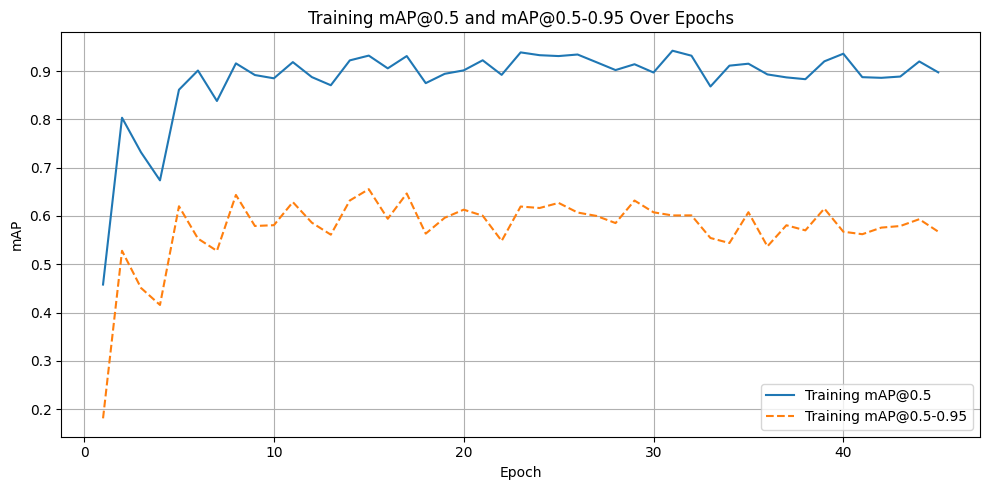

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load results.csv and validation_metrics.csv (you've already uploaded them)
results_df = pd.read_csv("/kaggle/working/runs/detect/bengali_digit_training/results.csv")
val_df = pd.read_csv("/kaggle/working/validation_metrics.csv")

# Extracting epoch-wise metrics
epochs = results_df['epoch']
train_map = results_df['metrics/mAP50(B)']
val_map = results_df['metrics/mAP50-95(B)']  # This is mAP50-95(B), assume similar format

# Plot Training vs Validation mAP@0.5 over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_map, label='Training mAP@0.5')
plt.plot(epochs, results_df['metrics/mAP50-95(B)'], label='Training mAP@0.5-0.95', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Training mAP@0.5 and mAP@0.5-0.95 Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


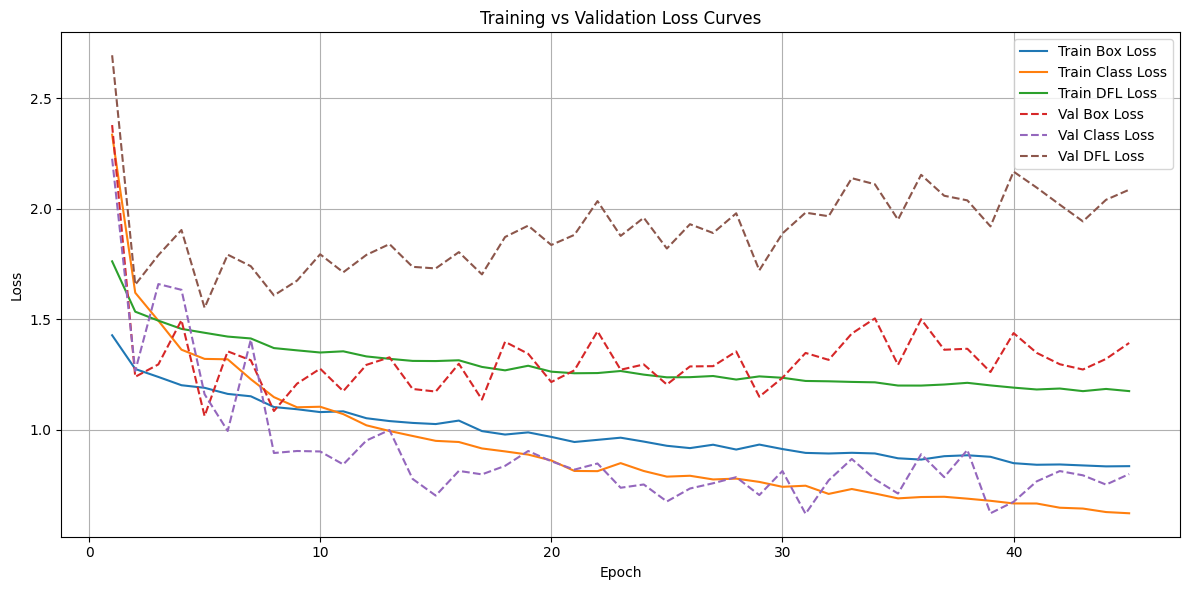

In [17]:
plt.figure(figsize=(12, 6))

# Training losses
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss')
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss')

# Validation losses
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='Val DFL Loss', linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


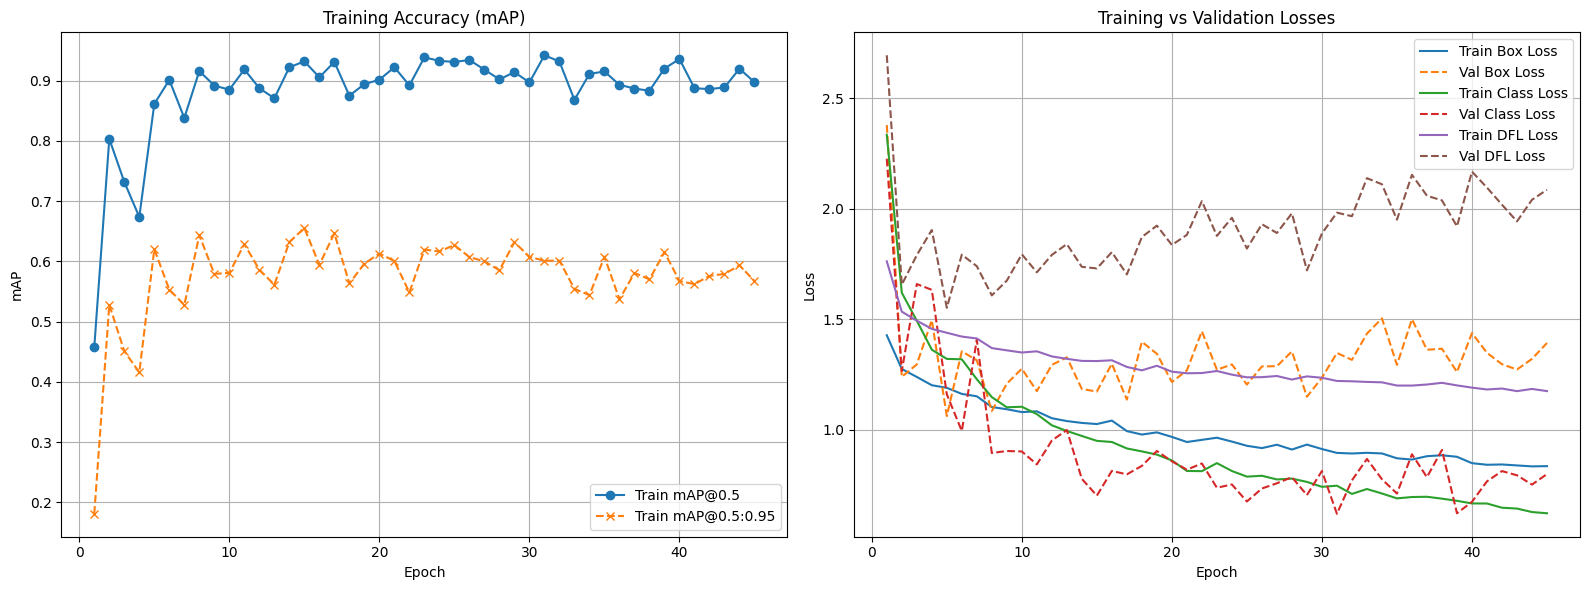

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
results_df = pd.read_csv("/kaggle/working/runs/detect/bengali_digit_training/results.csv")

# Extract data
epochs = results_df['epoch']
train_map50 = results_df['metrics/mAP50(B)']
train_map50_95 = results_df['metrics/mAP50-95(B)']
train_box_loss = results_df['train/box_loss']
val_box_loss = results_df['val/box_loss']
train_cls_loss = results_df['train/cls_loss']
val_cls_loss = results_df['val/cls_loss']
train_dfl_loss = results_df['train/dfl_loss']
val_dfl_loss = results_df['val/dfl_loss']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot mAP curves
axs[0].plot(epochs, train_map50, label='Train mAP@0.5', marker='o')
axs[0].plot(epochs, train_map50_95, label='Train mAP@0.5:0.95', linestyle='--', marker='x')
axs[0].set_title('Training Accuracy (mAP)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('mAP')
axs[0].legend()
axs[0].grid(True)

# Plot losses
axs[1].plot(epochs, train_box_loss, label='Train Box Loss')
axs[1].plot(epochs, val_box_loss, label='Val Box Loss', linestyle='--')
axs[1].plot(epochs, train_cls_loss, label='Train Class Loss')
axs[1].plot(epochs, val_cls_loss, label='Val Class Loss', linestyle='--')
axs[1].plot(epochs, train_dfl_loss, label='Train DFL Loss')
axs[1].plot(epochs, val_dfl_loss, label='Val DFL Loss', linestyle='--')
axs[1].set_title('Training vs Validation Losses')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
